# Graded Assignment 4.1: CNNs Vs. Transformers

- Done by: A Alkaff Ahamed
- Grade: Pending
- 5 May 2025


## Learning Outcome Addressed
- Gain expertise in Transformer architectures, attention mechanisms and state-of-the-art models such as BERT and GPT, focusing on their design, customisation and application.

Time to test your skills on the topics covered in this week. We recommend you try going through the [Python documentation](https://www.python.org/about/help/). if you have any issues. You may find some useful reference links in the Week 4: Video Transcripts and Additional Readings Page. You can also discuss your experience with your peers using the Week 4: Q&A Discussion Board.

> **Note:** This assignment involves training models within the Google Colab environment. The time required for the training to be completed will vary depending on the GPUs/hardware resources used within Google Colab for this assignment. We strongly recommend planning for **at least 6 hours of training time** for this assignment if using the default GPU/hardware resource within Google Colab.


## Assignment Instructions:

Develop and compare CNN and Transformer models for image classification to understand the strengths, weaknesses, and appropriate applications of each architecture. This assignment will help you build practical experience with modern deep learning architectures and their implementation.

Create a Python notebook to implement, train, and evaluate these two neural network architectures utilising the CIFAR-10 dataset.

Refer to the code from the following link and modify it as required before integrating it within your Jupyter Notebook to import the CIFAR-10 dataset - [https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/image_classification_with_vision_transformer.ipynb](https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/image_classification_with_vision_transformer.ipynb)

### Dataset

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck


### Tasks:

#### Task 1: Utilise Libraries/Dataset

- Import the necessary libraries (TensorFlow/Keras, NumPy, Matplotlib, etc.)
- Load and explore the CIFAR-10 dataset

#### Task 2: Generate at least two EDA visualisations

- Generate at least two EDA visualisations (class distribution and sample images)

#### Task 3: Analyse data quality

- Check for missing values or outliers and data quality issues

#### Task 4: Construct a CNN model

- Construct a CNN model with appropriate layers (convolutional, pooling, fully connected)

#### Task 5: Train the CNN model using the CIFAR-10 dataset

- Train the model using the training dataset with an appropriate number of training epochs

#### Task 6: Display model architecture and training progress

- Display the model architecture and training progress (take a screenshot of the progress for each epoch)

#### Task 7: Construct a ViT model

- Implement a Vision Transformer (ViT) model with attention mechanisms

#### Task 8: Train the ViT model using the CIFAR-10 dataset

- Train the ViT model using the training dataset with an appropriate number of training epochs.
> **Note:** This step may require several hours to complete using the default GPUs/hardware resources within Google Colab.

#### Task 9: Display model architecture and training progress

- Display the model architecture and training progress (take a screenshot of the progress for each epoch

#### Task 10: Compare training and validation results for each model:

- Discuss the difference in performance, training efficiency and learning dynamics or learning patterns of each model


**Estimated time:** 90-120 minutes (Excluding model training time)

**Additional Tips:**

- Experiment with hyperparameters to optimise each model
- For the CNN model, consider using vanilla architectures
- For the Transformer model, it is important to implement proper patch extraction and position embeddings. Use the following resource as reference - [https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/image_classification_with_vision_transformer.ipynb](https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/image_classification_with_vision_transformer.ipynb)

**Submission Instructions:**

- Select the Start Assignment button at the top right of this page.
- Upload your answers in the form of a Word or PDF file.
- Upload the Python file (.ipynb) you used to complete this assignment.
- Select the Submit Assignment button to submit your responses.

*This is a graded and counts towards programme completion. You may attempt this assignment only once.*


## 📌 Task 1: Utilise Libraries/Dataset

- Import the necessary libraries (TensorFlow/Keras, NumPy, Matplotlib, etc.)
- Load and explore the CIFAR-10 dataset


In [297]:
# Import Statements

import os
import time
import jax
import jax.numpy as jnp
from jax.scipy.ndimage import map_coordinates

os.environ["KERAS_BACKEND"] = "jax"  # @param ["tensorflow", "jax", "torch"]

import keras
from keras import models, optimizers, losses, metrics, layers
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from keras import ops
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
# Check for GPU

devices = jax.devices()

print("Available JAX Devices:")
for i, device in enumerate(devices):
    print(f"Device {i}: {device}")
    try: 
        import cupy
        print(cupy.cuda.runtime.getDeviceProperties(0)['name'].decode('utf-8').strip())
    except Exception as e:
        print(e)


Available JAX Devices:
Device 0: cuda:0
NVIDIA GeForce RTX 3050 Laptop GPU


In [5]:
# Load Dataset

num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3) - y_train shape: (50000,)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000,)


In [6]:
x_train[0, 0, 0]

array([59, 62, 63], dtype=uint8)

In [7]:
y_train

array([6, 9, 9, ..., 9, 1, 1], shape=(50000,), dtype=uint8)

In [8]:
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(50000, 10))

In [9]:
# Prepare Data 
x_train, x_test = x_train/255.0, x_test/255.0
x_train[0, 0, 0]

array([0.23137255, 0.24313725, 0.24705882])

## 📌 Task 2: Generate at least three EDA visualisations

- Generate at least two EDA visualisations (class distribution and sample images)
  - Class Distribution - Bar Chart
  - Sample Images - Image Plot


In [10]:
class_counts = np.bincount(y_train)
class_counts

class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

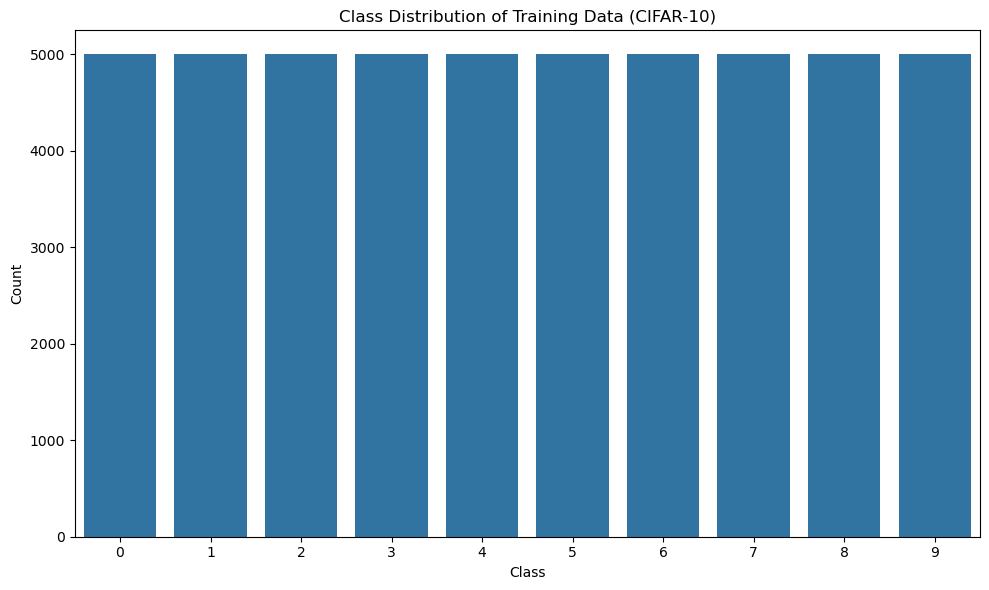

In [11]:
# Class distribution - Bar Chart
# ------------------------------

plt.figure(figsize=(10,6))
sns.barplot(x=range(len(class_counts)), y=class_counts)

plt.title("Class Distribution of Training Data (CIFAR-10)")
plt.xlabel("Class")
plt.ylabel("Count")
#plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)

plt.tight_layout()
plt.savefig("task_1a_class_dist_training_set.png")
plt.show()

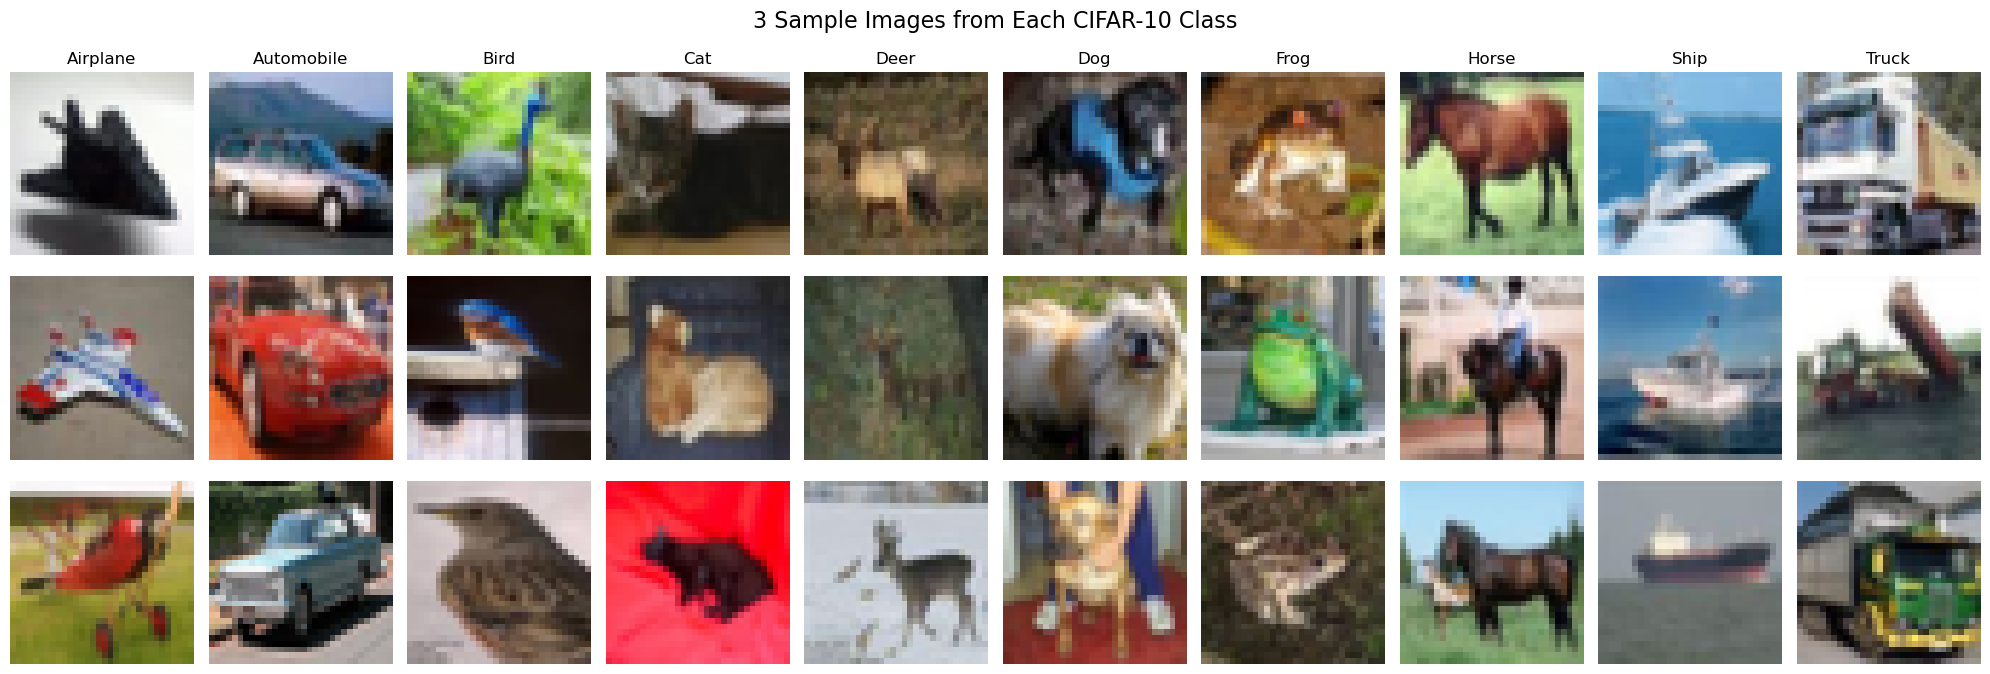

In [12]:
plt.figure(figsize=(20, 7))

# Loop over each class (0 to 9)
for class_idx in range(10):
    # Get indices of all images in that class
    class_images = x_train[y_train == class_idx]
    
    # Plot 3 images from this class
    for img_num in range(3):
        plt_idx = img_num * 10 + class_idx + 1  # +1 since subplot index starts at 1
        plt.subplot(3, 10, plt_idx)
        plt.imshow(class_images[img_num])
        if img_num == 0:
            plt.title(class_names[class_idx])
        plt.axis('off')

plt.suptitle("3 Sample Images from Each CIFAR-10 Class", fontsize=16)
plt.tight_layout()
plt.savefig("task_1b_sample_images.png")
plt.show()


### 📊 EDA Summary for CIFAR-10: Balanced Dataset with Representative Samples

- Contains **10 distinct classes**, each representing a different object category (e.g., airplane, cat, truck)
- Each class has **exactly 5,000 training images** ensuring a **balanced dataset**
- This class balance is beneficial during training, as it prevents the model from being biased toward any particular class
- We visualized **3 representative images per class** allowing us to:
  - Confirm the diversity of image appearances within each class
  - Validate that the class labels match the visual content
- These initial observations help ensure the dataset is **clean**, **well-distributed**, and suitable for deep learning model training


## 📌 Task 3: Analyse data quality

- Check for missing values or outliers and data quality issues


In [13]:
# Missing Values
print("Missing pixel values in x_train:", np.isnan(x_train).sum())
print("Missing labels in y_train:", np.isnan(y_train).sum())


Missing pixel values in x_train: 0
Missing labels in y_train: 0


In [14]:
# Pixel value out of range
print("Pixel min value:", x_train.min(), " | max value:", x_train.max())

Pixel min value: 0.0  | max value: 1.0


In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 📊 Data Quality Summary

- No missing values were found in the image data (`x_train`) or labels (`y_train`)
- Pixel values are within the expected RGB range of 0 to 1
- All labels fall within the expected class index range (0–9)
- The dataset appears clean and well-structured with no anomalies or outliers


## 📌 Task 4: Construct a CNN model

- Construct a CNN model with appropriate layers (convolutional, pooling, fully connected)


### 🧠 CNN Block Design Summary: Depth vs. Frequency of Pooling

#### 🔹 Why Use 2×Conv-BN Before Pooling?
- Stacking two Conv-BN layers before each MaxPooling layer allows the model to **extract richer, more expressive features** before spatial resolution is reduced.
- This approach:
  - Preserves spatial detail longer.
  - Is inspired by architectures like **VGG** and **ResNet**.
  - Helps the network learn **hierarchical representations** more effectively than Conv → Pool patterns.

#### ✅ Benefits of Conv → BN → Conv → BN → Pool:
- Better feature extraction at original resolution.
- More stable training due to BatchNorm after each Conv.
- Avoids early information loss from aggressive downsampling.

---

### 📐 Choosing the Right Depth for Different Image Sizes

| Image Size       | Recommended Conv Layers per Block | Notes |
|------------------|-----------------------------------|-------|
| **32×32 (CIFAR)**    | 2 Conv layers per block          | Balanced performance and speed |
| **128×128**       | 2–3 Conv layers per block        | Allows richer feature extraction |
| **512×512**       | 3–4 Conv layers per block        | Delays pooling to preserve detail |
| **1080×1080**     | 4–5 Conv layers or strided convs | Gradual downsampling preferred |

#### 🔧 Additional Tips for High-Res Inputs:
- Use **strided convolutions** instead of pooling for smoother spatial reduction.
- Consider **Global Average Pooling** over Flatten for fewer parameters.
- Adopt **skip connections** (e.g., ResNet, UNet) to preserve fine-grained information.

---

### 📝 TL;DR
> ✅ For small images (like CIFAR-10), 2×Conv-BN per block is a sweet spot.  
> ✅ For larger images (512×512+), increase the number of Conv-BN layers per block and downsample gradually to avoid early loss of spatial detail.


In [16]:
# Select a sample input image (reshape for batch dimension)
sample_image = x_train[0:1]  # shape: (1, 32, 32, 3)

# ---- Single Conv Block ----
single_block = keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D()
])

# ---- Double Conv Block ----
double_block = keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D()
])

# ---- Triple Conv Block ----
triple_block = keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D()
])

# Get feature maps
single_features = single_block(sample_image)
double_features = double_block(sample_image)
triple_features = triple_block(sample_image)

print("Single Conv Output Shape:", single_features.shape)
print("Double Conv Output Shape:", double_features.shape)
print("Triple Conv Output Shape:", triple_features.shape)


Single Conv Output Shape: (1, 16, 16, 32)
Double Conv Output Shape: (1, 16, 16, 32)
Triple Conv Output Shape: (1, 16, 16, 32)


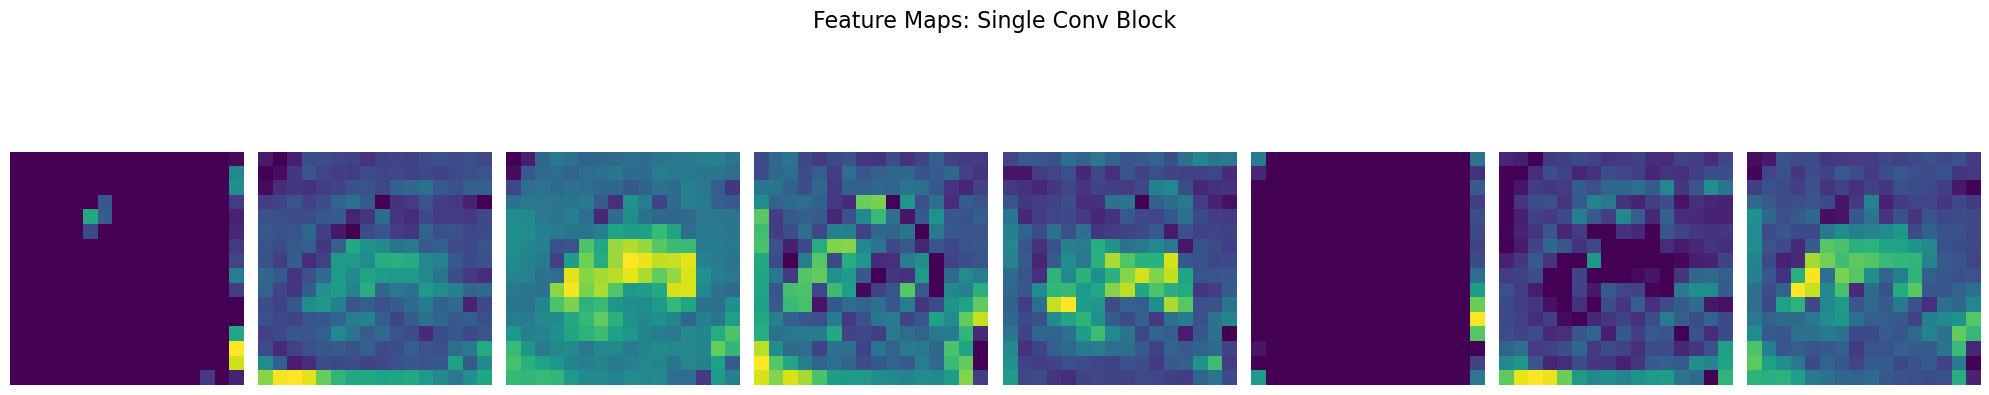

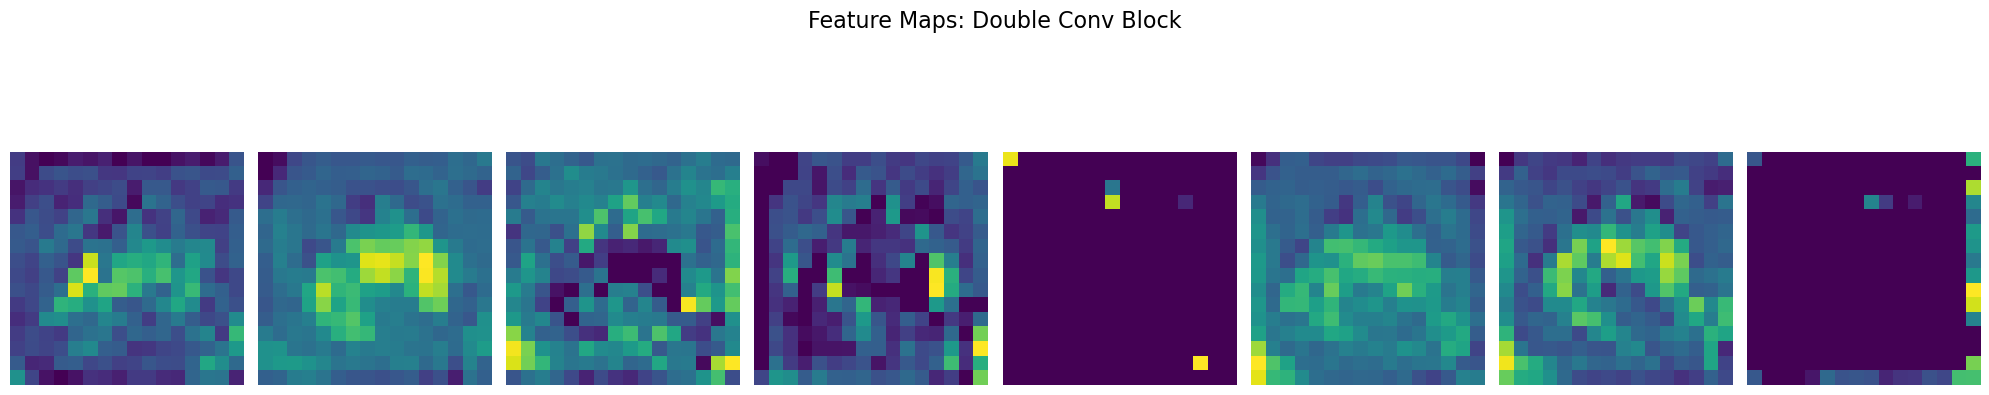

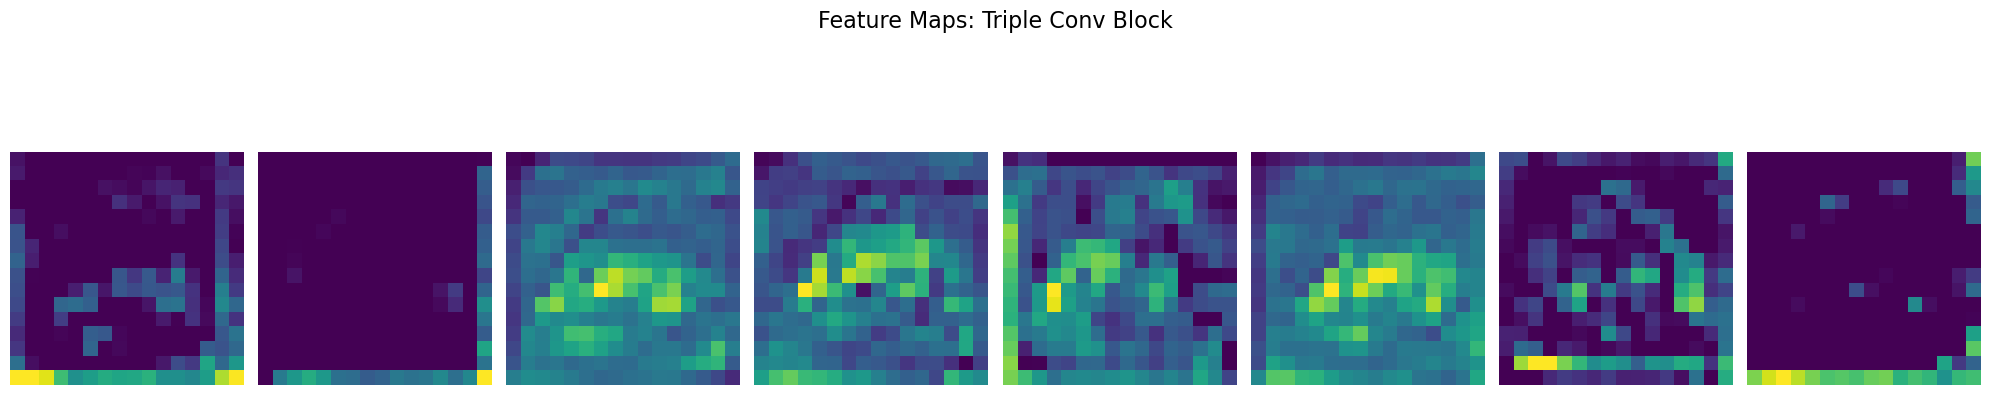

In [17]:
def plot_feature_maps(feature_map, title):
    fig, axes = plt.subplots(1, 8, figsize=(20, 5))
    for i in range(8):
        axes[i].imshow(feature_map[0, :, :, i], cmap='viridis')
        axes[i].axis('off')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_feature_maps(single_features, "Feature Maps: Single Conv Block")
plot_feature_maps(double_features, "Feature Maps: Double Conv Block")
plot_feature_maps(triple_features, "Feature Maps: Triple Conv Block")


### 🧱 Final CNN Architecture

- **3 convolutional blocks**, each structured as:
  - `Conv2D` → `BatchNormalization` → `Conv2D` → `BatchNormalization` → `MaxPooling2D`
  - (Optional) `Dropout(0.2)` after each block to reduce overfitting
  - Filter sizes increase in each block: **32 → 64 → 128**
  - Double set of `Conv2D` to capture more granular features

- **Fully connected classification head**:
  - `Flatten` layer to convert feature maps into a 1D vector
    - Produces **2048 units**: 4 × 4 × 128 channels
  - (Optional) `Dropout(0.2)`
  - `Dense(1024, activation='relu')`: calculated as half of the flattened size (2048 ÷ 2)
  - (Optional) `Dropout(0.2)`
  - `Dense(10, activation='softmax')` for CIFAR-10 output classes

This design draws from best practices in modern CNNs, such as stacking multiple convolutional layers before pooling and applying batch normalization for stable training.


In [19]:
num_classes = 10
input_shape = (32, 32, 3)

model = models.Sequential([
    # CNN 1
    Conv2D(32, (3, 3), padding='same', 
           activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', 
           activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # CNN 2
    Conv2D(64, (3, 3), padding='same', 
           activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', 
           activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # CNN 3
    Conv2D(128, (3, 3), padding='same', 
           activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', 
           activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Flatten and Dense layers
    Flatten(),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [20]:
model.build(input_shape=(None, 32, 32, 3))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

## 📌 Task 5: Train the CNN model using the CIFAR-10 dataset

- Train the model using the training dataset with an appropriate number of training epochs


In [21]:
# Callbacks
# ---------

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Reduce LR on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Save best model
checkpoint = ModelCheckpoint(
    filepath='best_cnn_checkpoint.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)



In [22]:
# Custom callback to track epoch stats
# ------------------------------------

class EpochStats(Callback):
    def on_train_begin(self, logs=None):
        super().on_train_begin(logs)
        
        self.train_start_time = time.time()
        self.epoch_count = 0
        self.total_epoch_time = 0.0

    def on_epoch_begin(self, epoch, logs=None):
        super().on_epoch_begin(epoch, logs)
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        super().on_epoch_end(epoch, logs)
        
        epoch_duration = time.time() - self.epoch_start_time
        self.total_epoch_time += epoch_duration
        self.epoch_count += 1
        total_duration = time.time() - self.train_start_time

        print(f"Epoch {epoch + 1}: {epoch_duration:.2f} s | Total: {total_duration:.2f} s | ", end='')
        print(f"loss: {logs.get('loss'):.4f} accuracy: {logs.get('accuracy'):.4f} top_5: {logs.get('top_5_accuracy'):.4f} | ", end='')
        print(f"val_loss: {logs.get('val_loss'):.4f} val_accuracy: {logs.get('val_accuracy'):.4f} val_top_5: {logs.get('val_top_5_accuracy'):.4f}")

    def on_train_end(self, logs=None):
        super().on_train_end(logs)
        
        total_time = time.time() - self.train_start_time
        avg_epoch_time = self.total_epoch_time / self.epoch_count if self.epoch_count > 0 else 0

        # Training Stats
        print("\n✅ Training Complete")
        print(f"Epochs trained       : {self.epoch_count}")
        print(f"Total training time  : {total_time:.2f} seconds")
        print(f"Avg epoch time       : {avg_epoch_time:.2f} seconds")

        # Final metrics (from last epoch logs)
        print(f"Final Train loss     : {logs.get('loss'):.4f}")
        print(f"Final Train accuracy : {logs.get('accuracy'):.4f}")
        print(f"Final Train top-5 acc: {logs.get('top_5_accuracy'):.4f}")
        print(f"Final Val loss       : {logs.get('val_loss'):.4f}")
        print(f"Final Val accuracy   : {logs.get('val_accuracy'):.4f}")
        print(f"Final Val top-5 acc  : {logs.get('val_top_5_accuracy'):.4f}")

epoch_stats = EpochStats()


In [23]:
# Compile Model
# -------------

epoch = 100
batch_size = 128
lr = 1e-3

# Metrics
accuracy = metrics.CategoricalAccuracy(name='accuracy')
loss = losses.CategoricalCrossentropy(name='loss')
top5_acc = metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy')
optimizer = optimizers.Adam(learning_rate=lr)

# Compile Model
# Compile the model
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=[accuracy, top5_acc]
)


In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

In [25]:
# Train Model
# -----------

history = {}

history = model.fit(
    x_train, y_train_cat,
    validation_split=0.1,
    epochs=epoch,
    batch_size=batch_size,
    callbacks=[early_stop, reduce_lr, checkpoint, epoch_stats],
    #callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)


Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.2858 - loss: 3.0950 - top_5_accuracy: 0.7909  
Epoch 1: val_loss improved from inf to 3.34843, saving model to best_cnn_checkpoint.keras
Epoch 1: 63.64 s | Total: 63.65 s | loss: 2.3307 accuracy: 0.3609 top_5: 0.8607 | val_loss: 3.3484 val_accuracy: 0.1860 val_top_5: 0.5916
352/352 ━━━━━━━━━━━━━━━━━━━━ 64s 129ms/step - accuracy: 0.2860 - loss: 3.0928 - top_5_accuracy: 0.7911 - val_accuracy: 0.1860 - val_loss: 3.3484 - val_top_5_accuracy: 0.5916 - learning_rate: 0.0010
Epoch 2/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4855 - loss: 1.7711 - top_5_accuracy: 0.9273 
Epoch 2: val_loss improved from 3.34843 to 1.71778, saving model to best_cnn_checkpoint.keras
Epoch 2: 22.41 s | Total: 86.06 s | loss: 1.7137 accuracy: 0.5073 top_5: 0.9341 | val_loss: 1.7178 val_accuracy: 0.5140 val_top_5: 0.9380
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.4856 - loss: 1.7708 - top_5_accuracy: 0.9274 - val_accu

In [27]:
# Save to file
# ------------

history_df = pd.DataFrame(history.history)
history_df.head()

,accuracy,loss,top_5_accuracy,val_accuracy,val_loss,val_top_5_accuracy,learning_rate
0,0.360889,2.330678,0.860733,0.1860,3.348426,0.5916,0.001
1,0.507267,1.713713,0.934089,0.5140,1.717783,0.9380,0.001
2,0.579244,1.500725,0.952911,0.6002,1.444156,0.9630,0.001
3,0.628244,1.346139,0.966111,0.6892,1.165681,0.9802,0.001
4,0.663111,1.236295,0.970244,0.6760,1.168904,0.9810,0.001


In [28]:
history_df.to_csv("cnn_history.csv")

# For Loading
#history_df = pd.read_csv("cnn_history.csv") 
#print(history_df.columns)
#history_df.rename(columns={"Unnamed: 0": "epoch"}, inplace=True)

## 📌 Task 6: Design an Appropriate DCNN-based Architecture

- Display the model architecture and training progress (take a screenshot of the progress for each epoch)


In [25]:
# Model Architecture
# ------------------

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             

 Total params: 7,189,888 (27.43 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 4,792,662 (18.28 MB)

##### Training Log

```
# Training Progress
# -----------------

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.2858 - loss: 3.0950 - top_5_accuracy: 0.7909  
Epoch 1: val_loss improved from inf to 3.34843, saving model to best_cnn_checkpoint.keras
Epoch 1: 63.64 s | Total: 63.65 s | loss: 2.3307 accuracy: 0.3609 top_5: 0.8607 | val_loss: 3.3484 val_accuracy: 0.1860 val_top_5: 0.5916
352/352 ━━━━━━━━━━━━━━━━━━━━ 64s 129ms/step - accuracy: 0.2860 - loss: 3.0928 - top_5_accuracy: 0.7911 - val_accuracy: 0.1860 - val_loss: 3.3484 - val_top_5_accuracy: 0.5916 - learning_rate: 0.0010
Epoch 2/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4855 - loss: 1.7711 - top_5_accuracy: 0.9273 
Epoch 2: val_loss improved from 3.34843 to 1.71778, saving model to best_cnn_checkpoint.keras
Epoch 2: 22.41 s | Total: 86.06 s | loss: 1.7137 accuracy: 0.5073 top_5: 0.9341 | val_loss: 1.7178 val_accuracy: 0.5140 val_top_5: 0.9380
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.4856 - loss: 1.7708 - top_5_accuracy: 0.9274 - val_accuracy: 0.5140 - val_loss: 1.7178 - val_top_5_accuracy: 0.9380 - learning_rate: 0.0010
Epoch 3/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5676 - loss: 1.5382 - top_5_accuracy: 0.9506 
Epoch 3: val_loss improved from 1.71778 to 1.44416, saving model to best_cnn_checkpoint.keras
Epoch 3: 17.27 s | Total: 103.34 s | loss: 1.5007 accuracy: 0.5792 top_5: 0.9529 | val_loss: 1.4442 val_accuracy: 0.6002 val_top_5: 0.9630
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.5677 - loss: 1.5380 - top_5_accuracy: 0.9506 - val_accuracy: 0.6002 - val_loss: 1.4442 - val_top_5_accuracy: 0.9630 - learning_rate: 0.0010
Epoch 4/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6234 - loss: 1.3646 - top_5_accuracy: 0.9647 
Epoch 4: val_loss improved from 1.44416 to 1.16568, saving model to best_cnn_checkpoint.keras
Epoch 4: 18.37 s | Total: 121.72 s | loss: 1.3461 accuracy: 0.6282 top_5: 0.9661 | val_loss: 1.1657 val_accuracy: 0.6892 val_top_5: 0.9802
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.6235 - loss: 1.3645 - top_5_accuracy: 0.9647 - val_accuracy: 0.6892 - val_loss: 1.1657 - val_top_5_accuracy: 0.9802 - learning_rate: 0.0010
Epoch 5/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6618 - loss: 1.2488 - top_5_accuracy: 0.9695 
Epoch 5: val_loss did not improve from 1.16568
Epoch 5: 17.51 s | Total: 139.23 s | loss: 1.2363 accuracy: 0.6631 top_5: 0.9702 | val_loss: 1.1689 val_accuracy: 0.6760 val_top_5: 0.9810
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.6618 - loss: 1.2488 - top_5_accuracy: 0.9695 - val_accuracy: 0.6760 - val_loss: 1.1689 - val_top_5_accuracy: 0.9810 - learning_rate: 0.0010
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6855 - loss: 1.1589 - top_5_accuracy: 0.9768 
Epoch 6: val_loss improved from 1.16568 to 1.03728, saving model to best_cnn_checkpoint.keras
Epoch 6: 18.42 s | Total: 157.66 s | loss: 1.1505 accuracy: 0.6894 top_5: 0.9750 | val_loss: 1.0373 val_accuracy: 0.7348 val_top_5: 0.9786
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.6855 - loss: 1.1588 - top_5_accuracy: 0.9768 - val_accuracy: 0.7348 - val_loss: 1.0373 - val_top_5_accuracy: 0.9786 - learning_rate: 0.0010
Epoch 7/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7054 - loss: 1.0950 - top_5_accuracy: 0.9789 
Epoch 7: val_loss improved from 1.03728 to 0.93752, saving model to best_cnn_checkpoint.keras
Epoch 7: 18.53 s | Total: 176.21 s | loss: 1.0951 accuracy: 0.7070 top_5: 0.9782 | val_loss: 0.9375 val_accuracy: 0.7598 val_top_5: 0.9846
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.7055 - loss: 1.0950 - top_5_accuracy: 0.9789 - val_accuracy: 0.7598 - val_loss: 0.9375 - val_top_5_accuracy: 0.9846 - learning_rate: 0.0010
Epoch 8/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7167 - loss: 1.0517 - top_5_accuracy: 0.9800 
Epoch 8: val_loss improved from 0.93752 to 0.91965, saving model to best_cnn_checkpoint.keras
Epoch 8: 17.22 s | Total: 193.43 s | loss: 1.0451 accuracy: 0.7209 top_5: 0.9811 | val_loss: 0.9197 val_accuracy: 0.7748 val_top_5: 0.9886
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.7167 - loss: 1.0517 - top_5_accuracy: 0.9800 - val_accuracy: 0.7748 - val_loss: 0.9197 - val_top_5_accuracy: 0.9886 - learning_rate: 0.0010
Epoch 9/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7313 - loss: 1.0233 - top_5_accuracy: 0.9817 
Epoch 9: val_loss did not improve from 0.91965
Epoch 9: 18.86 s | Total: 212.31 s | loss: 1.0143 accuracy: 0.7348 top_5: 0.9812 | val_loss: 0.9301 val_accuracy: 0.7700 val_top_5: 0.9864
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.7313 - loss: 1.0232 - top_5_accuracy: 0.9817 - val_accuracy: 0.7700 - val_loss: 0.9301 - val_top_5_accuracy: 0.9864 - learning_rate: 0.0010
Epoch 10/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7502 - loss: 0.9756 - top_5_accuracy: 0.9834 
Epoch 10: val_loss did not improve from 0.91965
Epoch 10: 17.05 s | Total: 229.36 s | loss: 0.9940 accuracy: 0.7465 top_5: 0.9822 | val_loss: 0.9216 val_accuracy: 0.7760 val_top_5: 0.9850
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7502 - loss: 0.9757 - top_5_accuracy: 0.9834 - val_accuracy: 0.7760 - val_loss: 0.9216 - val_top_5_accuracy: 0.9850 - learning_rate: 0.0010
Epoch 11/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7601 - loss: 0.9575 - top_5_accuracy: 0.9843 
Epoch 11: val_loss did not improve from 0.91965
Epoch 11: 18.49 s | Total: 247.86 s | loss: 0.9691 accuracy: 0.7564 top_5: 0.9836 | val_loss: 0.9584 val_accuracy: 0.7614 val_top_5: 0.9818
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.7601 - loss: 0.9575 - top_5_accuracy: 0.9843 - val_accuracy: 0.7614 - val_loss: 0.9584 - val_top_5_accuracy: 0.9818 - learning_rate: 0.0010
Epoch 12/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7675 - loss: 0.9393 - top_5_accuracy: 0.9854 
Epoch 12: val_loss did not improve from 0.91965
Epoch 12: 16.90 s | Total: 264.77 s | loss: 0.9546 accuracy: 0.7645 top_5: 0.9846 | val_loss: 0.9290 val_accuracy: 0.7888 val_top_5: 0.9866
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7675 - loss: 0.9394 - top_5_accuracy: 0.9854 - val_accuracy: 0.7888 - val_loss: 0.9290 - val_top_5_accuracy: 0.9866 - learning_rate: 0.0010
Epoch 13/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7721 - loss: 0.9387 - top_5_accuracy: 0.9852 
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 13: val_loss did not improve from 0.91965
Epoch 13: 18.45 s | Total: 283.22 s | loss: 0.9415 accuracy: 0.7727 top_5: 0.9850 | val_loss: 1.1712 val_accuracy: 0.7184 val_top_5: 0.9820
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.7721 - loss: 0.9387 - top_5_accuracy: 0.9852 - val_accuracy: 0.7184 - val_loss: 1.1712 - val_top_5_accuracy: 0.9820 - learning_rate: 0.0010
Epoch 14/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8002 - loss: 0.8539 - top_5_accuracy: 0.9874 
Epoch 14: val_loss improved from 0.91965 to 0.76462, saving model to best_cnn_checkpoint.keras
Epoch 14: 20.84 s | Total: 304.07 s | loss: 0.8332 accuracy: 0.8046 top_5: 0.9887 | val_loss: 0.7646 val_accuracy: 0.8304 val_top_5: 0.9916
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8002 - loss: 0.8538 - top_5_accuracy: 0.9874 - val_accuracy: 0.8304 - val_loss: 0.7646 - val_top_5_accuracy: 0.9916 - learning_rate: 5.0000e-04
Epoch 15/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8192 - loss: 0.7734 - top_5_accuracy: 0.9916 
Epoch 15: val_loss did not improve from 0.76462
Epoch 15: 18.52 s | Total: 322.60 s | loss: 0.7758 accuracy: 0.8183 top_5: 0.9909 | val_loss: 0.7656 val_accuracy: 0.8246 val_top_5: 0.9918
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.8191 - loss: 0.7734 - top_5_accuracy: 0.9916 - val_accuracy: 0.8246 - val_loss: 0.7656 - val_top_5_accuracy: 0.9918 - learning_rate: 5.0000e-04
Epoch 16/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8274 - loss: 0.7443 - top_5_accuracy: 0.9913 
Epoch 16: val_loss improved from 0.76462 to 0.72253, saving model to best_cnn_checkpoint.keras
Epoch 16: 18.77 s | Total: 341.38 s | loss: 0.7507 accuracy: 0.8235 top_5: 0.9914 | val_loss: 0.7225 val_accuracy: 0.8378 val_top_5: 0.9924
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.8273 - loss: 0.7443 - top_5_accuracy: 0.9913 - val_accuracy: 0.8378 - val_loss: 0.7225 - val_top_5_accuracy: 0.9924 - learning_rate: 5.0000e-04
Epoch 17/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8287 - loss: 0.7192 - top_5_accuracy: 0.9931 
Epoch 17: val_loss improved from 0.72253 to 0.71602, saving model to best_cnn_checkpoint.keras
Epoch 17: 17.75 s | Total: 359.14 s | loss: 0.7296 accuracy: 0.8256 top_5: 0.9924 | val_loss: 0.7160 val_accuracy: 0.8394 val_top_5: 0.9934
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8286 - loss: 0.7193 - top_5_accuracy: 0.9931 - val_accuracy: 0.8394 - val_loss: 0.7160 - val_top_5_accuracy: 0.9934 - learning_rate: 5.0000e-04
Epoch 18/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8359 - loss: 0.7044 - top_5_accuracy: 0.9927 
Epoch 18: val_loss improved from 0.71602 to 0.68525, saving model to best_cnn_checkpoint.keras
Epoch 18: 18.29 s | Total: 377.43 s | loss: 0.7139 accuracy: 0.8320 top_5: 0.9922 | val_loss: 0.6852 val_accuracy: 0.8444 val_top_5: 0.9948
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.8359 - loss: 0.7044 - top_5_accuracy: 0.9926 - val_accuracy: 0.8444 - val_loss: 0.6852 - val_top_5_accuracy: 0.9948 - learning_rate: 5.0000e-04
Epoch 19/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8396 - loss: 0.6860 - top_5_accuracy: 0.9935 
Epoch 19: val_loss did not improve from 0.68525
Epoch 19: 17.15 s | Total: 394.59 s | loss: 0.6982 accuracy: 0.8360 top_5: 0.9927 | val_loss: 0.7035 val_accuracy: 0.8408 val_top_5: 0.9920
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8396 - loss: 0.6860 - top_5_accuracy: 0.9935 - val_accuracy: 0.8408 - val_loss: 0.7035 - val_top_5_accuracy: 0.9920 - learning_rate: 5.0000e-04
Epoch 20/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8439 - loss: 0.6753 - top_5_accuracy: 0.9932 
Epoch 20: val_loss did not improve from 0.68525
Epoch 20: 18.40 s | Total: 413.00 s | loss: 0.6884 accuracy: 0.8387 top_5: 0.9931 | val_loss: 0.7026 val_accuracy: 0.8376 val_top_5: 0.9932
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.8439 - loss: 0.6754 - top_5_accuracy: 0.9932 - val_accuracy: 0.8376 - val_loss: 0.7026 - val_top_5_accuracy: 0.9932 - learning_rate: 5.0000e-04
Epoch 21/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8446 - loss: 0.6667 - top_5_accuracy: 0.9937 
Epoch 21: val_loss did not improve from 0.68525
Epoch 21: 17.27 s | Total: 430.28 s | loss: 0.6801 accuracy: 0.8394 top_5: 0.9931 | val_loss: 0.6891 val_accuracy: 0.8436 val_top_5: 0.9940
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8446 - loss: 0.6668 - top_5_accuracy: 0.9937 - val_accuracy: 0.8436 - val_loss: 0.6891 - val_top_5_accuracy: 0.9940 - learning_rate: 5.0000e-04
Epoch 22/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8436 - loss: 0.6691 - top_5_accuracy: 0.9943 
Epoch 22: val_loss improved from 0.68525 to 0.68058, saving model to best_cnn_checkpoint.keras
Epoch 22: 18.73 s | Total: 449.01 s | loss: 0.6714 accuracy: 0.8428 top_5: 0.9939 | val_loss: 0.6806 val_accuracy: 0.8430 val_top_5: 0.9930
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.8436 - loss: 0.6691 - top_5_accuracy: 0.9943 - val_accuracy: 0.8430 - val_loss: 0.6806 - val_top_5_accuracy: 0.9930 - learning_rate: 5.0000e-04
Epoch 23/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8503 - loss: 0.6433 - top_5_accuracy: 0.9945 
Epoch 23: val_loss improved from 0.68058 to 0.67413, saving model to best_cnn_checkpoint.keras
Epoch 23: 17.72 s | Total: 466.74 s | loss: 0.6607 accuracy: 0.8454 top_5: 0.9940 | val_loss: 0.6741 val_accuracy: 0.8460 val_top_5: 0.9930
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8503 - loss: 0.6434 - top_5_accuracy: 0.9945 - val_accuracy: 0.8460 - val_loss: 0.6741 - val_top_5_accuracy: 0.9930 - learning_rate: 5.0000e-04
Epoch 24/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8556 - loss: 0.6358 - top_5_accuracy: 0.9940 
Epoch 24: val_loss did not improve from 0.67413
Epoch 24: 18.38 s | Total: 485.13 s | loss: 0.6508 accuracy: 0.8497 top_5: 0.9938 | val_loss: 0.6863 val_accuracy: 0.8450 val_top_5: 0.9918
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.8556 - loss: 0.6359 - top_5_accuracy: 0.9940 - val_accuracy: 0.8450 - val_loss: 0.6863 - val_top_5_accuracy: 0.9918 - learning_rate: 5.0000e-04
Epoch 25/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8556 - loss: 0.6319 - top_5_accuracy: 0.9953 
Epoch 25: val_loss did not improve from 0.67413
Epoch 25: 17.31 s | Total: 502.45 s | loss: 0.6452 accuracy: 0.8507 top_5: 0.9948 | val_loss: 0.6927 val_accuracy: 0.8428 val_top_5: 0.9930
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8556 - loss: 0.6320 - top_5_accuracy: 0.9953 - val_accuracy: 0.8428 - val_loss: 0.6927 - val_top_5_accuracy: 0.9930 - learning_rate: 5.0000e-04
Epoch 26/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8569 - loss: 0.6301 - top_5_accuracy: 0.9954 
Epoch 26: val_loss improved from 0.67413 to 0.65916, saving model to best_cnn_checkpoint.keras
Epoch 26: 18.83 s | Total: 521.28 s | loss: 0.6436 accuracy: 0.8524 top_5: 0.9948 | val_loss: 0.6592 val_accuracy: 0.8500 val_top_5: 0.9936
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.8569 - loss: 0.6302 - top_5_accuracy: 0.9954 - val_accuracy: 0.8500 - val_loss: 0.6592 - val_top_5_accuracy: 0.9936 - learning_rate: 5.0000e-04
Epoch 27/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8561 - loss: 0.6246 - top_5_accuracy: 0.9958 
Epoch 27: val_loss did not improve from 0.65916
Epoch 27: 17.60 s | Total: 538.90 s | loss: 0.6306 accuracy: 0.8552 top_5: 0.9956 | val_loss: 0.7180 val_accuracy: 0.8334 val_top_5: 0.9900
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8561 - loss: 0.6246 - top_5_accuracy: 0.9958 - val_accuracy: 0.8334 - val_loss: 0.7180 - val_top_5_accuracy: 0.9900 - learning_rate: 5.0000e-04
Epoch 28/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8604 - loss: 0.6191 - top_5_accuracy: 0.9954  
Epoch 28: val_loss did not improve from 0.65916
Epoch 28: 18.52 s | Total: 557.43 s | loss: 0.6258 accuracy: 0.8569 top_5: 0.9957 | val_loss: 0.6991 val_accuracy: 0.8404 val_top_5: 0.9930
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.8604 - loss: 0.6191 - top_5_accuracy: 0.9954 - val_accuracy: 0.8404 - val_loss: 0.6991 - val_top_5_accuracy: 0.9930 - learning_rate: 5.0000e-04
Epoch 29/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8627 - loss: 0.6048 - top_5_accuracy: 0.9955 
Epoch 29: val_loss did not improve from 0.65916
Epoch 29: 18.24 s | Total: 575.67 s | loss: 0.6248 accuracy: 0.8578 top_5: 0.9949 | val_loss: 0.6729 val_accuracy: 0.8494 val_top_5: 0.9938
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.8627 - loss: 0.6048 - top_5_accuracy: 0.9955 - val_accuracy: 0.8494 - val_loss: 0.6729 - val_top_5_accuracy: 0.9938 - learning_rate: 5.0000e-04
Epoch 30/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8614 - loss: 0.6155 - top_5_accuracy: 0.9950 
Epoch 30: val_loss improved from 0.65916 to 0.63540, saving model to best_cnn_checkpoint.keras
Epoch 30: 17.78 s | Total: 593.46 s | loss: 0.6207 accuracy: 0.8602 top_5: 0.9950 | val_loss: 0.6354 val_accuracy: 0.8600 val_top_5: 0.9948
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.8614 - loss: 0.6155 - top_5_accuracy: 0.9950 - val_accuracy: 0.8600 - val_loss: 0.6354 - val_top_5_accuracy: 0.9948 - learning_rate: 5.0000e-04
Epoch 31/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8648 - loss: 0.6044 - top_5_accuracy: 0.9955 
Epoch 31: val_loss did not improve from 0.63540
Epoch 31: 18.50 s | Total: 611.97 s | loss: 0.6117 accuracy: 0.8617 top_5: 0.9950 | val_loss: 0.6764 val_accuracy: 0.8456 val_top_5: 0.9934
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.8648 - loss: 0.6045 - top_5_accuracy: 0.9955 - val_accuracy: 0.8456 - val_loss: 0.6764 - val_top_5_accuracy: 0.9934 - learning_rate: 5.0000e-04
Epoch 32/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8634 - loss: 0.6071 - top_5_accuracy: 0.9958 
Epoch 32: val_loss did not improve from 0.63540
Epoch 32: 17.19 s | Total: 629.16 s | loss: 0.6123 accuracy: 0.8620 top_5: 0.9956 | val_loss: 0.6547 val_accuracy: 0.8592 val_top_5: 0.9946
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8634 - loss: 0.6072 - top_5_accuracy: 0.9958 - val_accuracy: 0.8592 - val_loss: 0.6547 - val_top_5_accuracy: 0.9946 - learning_rate: 5.0000e-04
Epoch 33/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8687 - loss: 0.5989 - top_5_accuracy: 0.9953 
Epoch 33: val_loss did not improve from 0.63540
Epoch 33: 18.34 s | Total: 647.50 s | loss: 0.6059 accuracy: 0.8660 top_5: 0.9954 | val_loss: 0.6455 val_accuracy: 0.8632 val_top_5: 0.9944
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.8687 - loss: 0.5989 - top_5_accuracy: 0.9953 - val_accuracy: 0.8632 - val_loss: 0.6455 - val_top_5_accuracy: 0.9944 - learning_rate: 5.0000e-04
Epoch 34/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8706 - loss: 0.5906 - top_5_accuracy: 0.9959 
Epoch 34: val_loss did not improve from 0.63540
Epoch 34: 17.60 s | Total: 665.11 s | loss: 0.6028 accuracy: 0.8666 top_5: 0.9957 | val_loss: 0.6431 val_accuracy: 0.8686 val_top_5: 0.9928
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8705 - loss: 0.5906 - top_5_accuracy: 0.9959 - val_accuracy: 0.8686 - val_loss: 0.6431 - val_top_5_accuracy: 0.9928 - learning_rate: 5.0000e-04
Epoch 35/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8726 - loss: 0.5814 - top_5_accuracy: 0.9965 
Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 35: val_loss did not improve from 0.63540
Epoch 35: 18.66 s | Total: 683.78 s | loss: 0.5982 accuracy: 0.8683 top_5: 0.9958 | val_loss: 0.6867 val_accuracy: 0.8514 val_top_5: 0.9914
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.8726 - loss: 0.5815 - top_5_accuracy: 0.9965 - val_accuracy: 0.8514 - val_loss: 0.6867 - val_top_5_accuracy: 0.9914 - learning_rate: 5.0000e-04
Epoch 36/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8853 - loss: 0.5444 - top_5_accuracy: 0.9970 
Epoch 36: val_loss improved from 0.63540 to 0.60057, saving model to best_cnn_checkpoint.keras
Epoch 36: 17.77 s | Total: 701.56 s | loss: 0.5434 accuracy: 0.8868 top_5: 0.9970 | val_loss: 0.6006 val_accuracy: 0.8756 val_top_5: 0.9950
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.8853 - loss: 0.5444 - top_5_accuracy: 0.9970 - val_accuracy: 0.8756 - val_loss: 0.6006 - val_top_5_accuracy: 0.9950 - learning_rate: 2.5000e-04
Epoch 37/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8924 - loss: 0.5160 - top_5_accuracy: 0.9976 
Epoch 37: val_loss did not improve from 0.60057
Epoch 37: 18.33 s | Total: 719.89 s | loss: 0.5180 accuracy: 0.8920 top_5: 0.9975 | val_loss: 0.6161 val_accuracy: 0.8672 val_top_5: 0.9956
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.8924 - loss: 0.5160 - top_5_accuracy: 0.9976 - val_accuracy: 0.8672 - val_loss: 0.6161 - val_top_5_accuracy: 0.9956 - learning_rate: 2.5000e-04
Epoch 38/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8961 - loss: 0.4983 - top_5_accuracy: 0.9981 
Epoch 38: val_loss did not improve from 0.60057
Epoch 38: 17.48 s | Total: 737.37 s | loss: 0.5019 accuracy: 0.8945 top_5: 0.9980 | val_loss: 0.6144 val_accuracy: 0.8628 val_top_5: 0.9942
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8961 - loss: 0.4983 - top_5_accuracy: 0.9981 - val_accuracy: 0.8628 - val_loss: 0.6144 - val_top_5_accuracy: 0.9942 - learning_rate: 2.5000e-04
Epoch 39/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8976 - loss: 0.4869 - top_5_accuracy: 0.9983 
Epoch 39: val_loss improved from 0.60057 to 0.59480, saving model to best_cnn_checkpoint.keras
Epoch 39: 18.58 s | Total: 755.96 s | loss: 0.4864 accuracy: 0.8968 top_5: 0.9981 | val_loss: 0.5948 val_accuracy: 0.8720 val_top_5: 0.9956
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.8976 - loss: 0.4869 - top_5_accuracy: 0.9983 - val_accuracy: 0.8720 - val_loss: 0.5948 - val_top_5_accuracy: 0.9956 - learning_rate: 2.5000e-04
Epoch 40/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9012 - loss: 0.4731 - top_5_accuracy: 0.9977 
Epoch 40: val_loss improved from 0.59480 to 0.57200, saving model to best_cnn_checkpoint.keras
Epoch 40: 18.59 s | Total: 774.56 s | loss: 0.4800 accuracy: 0.8995 top_5: 0.9975 | val_loss: 0.5720 val_accuracy: 0.8760 val_top_5: 0.9956
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9012 - loss: 0.4732 - top_5_accuracy: 0.9977 - val_accuracy: 0.8760 - val_loss: 0.5720 - val_top_5_accuracy: 0.9956 - learning_rate: 2.5000e-04
Epoch 41/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9043 - loss: 0.4614 - top_5_accuracy: 0.9979 
Epoch 41: val_loss did not improve from 0.57200
Epoch 41: 17.44 s | Total: 792.01 s | loss: 0.4705 accuracy: 0.9015 top_5: 0.9979 | val_loss: 0.6272 val_accuracy: 0.8622 val_top_5: 0.9936
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9043 - loss: 0.4614 - top_5_accuracy: 0.9979 - val_accuracy: 0.8622 - val_loss: 0.6272 - val_top_5_accuracy: 0.9936 - learning_rate: 2.5000e-04
Epoch 42/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9071 - loss: 0.4552 - top_5_accuracy: 0.9979 
Epoch 42: val_loss did not improve from 0.57200
Epoch 42: 18.72 s | Total: 810.74 s | loss: 0.4597 accuracy: 0.9048 top_5: 0.9978 | val_loss: 0.5810 val_accuracy: 0.8724 val_top_5: 0.9950
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9071 - loss: 0.4553 - top_5_accuracy: 0.9979 - val_accuracy: 0.8724 - val_loss: 0.5810 - val_top_5_accuracy: 0.9950 - learning_rate: 2.5000e-04
Epoch 43/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9063 - loss: 0.4456 - top_5_accuracy: 0.9985 
Epoch 43: val_loss did not improve from 0.57200
Epoch 43: 17.60 s | Total: 828.34 s | loss: 0.4554 accuracy: 0.9029 top_5: 0.9986 | val_loss: 0.6171 val_accuracy: 0.8662 val_top_5: 0.9944
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.9063 - loss: 0.4457 - top_5_accuracy: 0.9985 - val_accuracy: 0.8662 - val_loss: 0.6171 - val_top_5_accuracy: 0.9944 - learning_rate: 2.5000e-04
Epoch 44/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9078 - loss: 0.4431 - top_5_accuracy: 0.9984 
Epoch 44: val_loss did not improve from 0.57200
Epoch 44: 18.37 s | Total: 846.72 s | loss: 0.4479 accuracy: 0.9051 top_5: 0.9984 | val_loss: 0.6150 val_accuracy: 0.8602 val_top_5: 0.9960
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9078 - loss: 0.4432 - top_5_accuracy: 0.9984 - val_accuracy: 0.8602 - val_loss: 0.6150 - val_top_5_accuracy: 0.9960 - learning_rate: 2.5000e-04
Epoch 45/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9074 - loss: 0.4401 - top_5_accuracy: 0.9986 
Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 45: val_loss did not improve from 0.57200
Epoch 45: 17.74 s | Total: 864.46 s | loss: 0.4475 accuracy: 0.9053 top_5: 0.9984 | val_loss: 0.5891 val_accuracy: 0.8660 val_top_5: 0.9958
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.9074 - loss: 0.4402 - top_5_accuracy: 0.9986 - val_accuracy: 0.8660 - val_loss: 0.5891 - val_top_5_accuracy: 0.9958 - learning_rate: 2.5000e-04
Epoch 46/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9157 - loss: 0.4165 - top_5_accuracy: 0.9987 
Epoch 46: val_loss improved from 0.57200 to 0.54770, saving model to best_cnn_checkpoint.keras
Epoch 46: 18.73 s | Total: 883.20 s | loss: 0.4153 accuracy: 0.9148 top_5: 0.9986 | val_loss: 0.5477 val_accuracy: 0.8810 val_top_5: 0.9962
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9157 - loss: 0.4165 - top_5_accuracy: 0.9987 - val_accuracy: 0.8810 - val_loss: 0.5477 - val_top_5_accuracy: 0.9962 - learning_rate: 1.2500e-04
Epoch 47/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9207 - loss: 0.3964 - top_5_accuracy: 0.9989 
Epoch 47: val_loss did not improve from 0.54770
Epoch 47: 17.57 s | Total: 900.78 s | loss: 0.4019 accuracy: 0.9195 top_5: 0.9988 | val_loss: 0.5535 val_accuracy: 0.8790 val_top_5: 0.9970
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.9207 - loss: 0.3964 - top_5_accuracy: 0.9989 - val_accuracy: 0.8790 - val_loss: 0.5535 - val_top_5_accuracy: 0.9970 - learning_rate: 1.2500e-04
Epoch 48/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9220 - loss: 0.3905 - top_5_accuracy: 0.9991 
Epoch 48: val_loss did not improve from 0.54770
Epoch 48: 18.42 s | Total: 919.20 s | loss: 0.3971 accuracy: 0.9204 top_5: 0.9990 | val_loss: 0.5482 val_accuracy: 0.8794 val_top_5: 0.9962
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9220 - loss: 0.3905 - top_5_accuracy: 0.9991 - val_accuracy: 0.8794 - val_loss: 0.5482 - val_top_5_accuracy: 0.9962 - learning_rate: 1.2500e-04
Epoch 49/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9226 - loss: 0.3868 - top_5_accuracy: 0.9990 
Epoch 49: val_loss improved from 0.54770 to 0.54754, saving model to best_cnn_checkpoint.keras
Epoch 49: 17.98 s | Total: 937.19 s | loss: 0.3829 accuracy: 0.9233 top_5: 0.9990 | val_loss: 0.5475 val_accuracy: 0.8826 val_top_5: 0.9956
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9226 - loss: 0.3868 - top_5_accuracy: 0.9990 - val_accuracy: 0.8826 - val_loss: 0.5475 - val_top_5_accuracy: 0.9956 - learning_rate: 1.2500e-04
Epoch 50/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9241 - loss: 0.3807 - top_5_accuracy: 0.9990  
Epoch 50: val_loss did not improve from 0.54754
Epoch 50: 18.62 s | Total: 955.83 s | loss: 0.3802 accuracy: 0.9242 top_5: 0.9990 | val_loss: 0.5517 val_accuracy: 0.8814 val_top_5: 0.9958
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9241 - loss: 0.3807 - top_5_accuracy: 0.9990 - val_accuracy: 0.8814 - val_loss: 0.5517 - val_top_5_accuracy: 0.9958 - learning_rate: 1.2500e-04
Epoch 51/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9257 - loss: 0.3706 - top_5_accuracy: 0.9991 
Epoch 51: val_loss improved from 0.54754 to 0.53888, saving model to best_cnn_checkpoint.keras
Epoch 51: 18.46 s | Total: 974.30 s | loss: 0.3743 accuracy: 0.9249 top_5: 0.9993 | val_loss: 0.5389 val_accuracy: 0.8830 val_top_5: 0.9958
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9257 - loss: 0.3706 - top_5_accuracy: 0.9991 - val_accuracy: 0.8830 - val_loss: 0.5389 - val_top_5_accuracy: 0.9958 - learning_rate: 1.2500e-04
Epoch 52/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9249 - loss: 0.3670 - top_5_accuracy: 0.9994 
Epoch 52: val_loss improved from 0.53888 to 0.53306, saving model to best_cnn_checkpoint.keras
Epoch 52: 17.83 s | Total: 992.14 s | loss: 0.3713 accuracy: 0.9251 top_5: 0.9990 | val_loss: 0.5331 val_accuracy: 0.8842 val_top_5: 0.9962
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9249 - loss: 0.3670 - top_5_accuracy: 0.9993 - val_accuracy: 0.8842 - val_loss: 0.5331 - val_top_5_accuracy: 0.9962 - learning_rate: 1.2500e-04
Epoch 53/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9255 - loss: 0.3659 - top_5_accuracy: 0.9994 
Epoch 53: val_loss did not improve from 0.53306
Epoch 53: 18.65 s | Total: 1010.80 s | loss: 0.3696 accuracy: 0.9250 top_5: 0.9992 | val_loss: 0.5453 val_accuracy: 0.8806 val_top_5: 0.9968
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9255 - loss: 0.3659 - top_5_accuracy: 0.9994 - val_accuracy: 0.8806 - val_loss: 0.5453 - val_top_5_accuracy: 0.9968 - learning_rate: 1.2500e-04
Epoch 54/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9270 - loss: 0.3622 - top_5_accuracy: 0.9994 
Epoch 54: val_loss improved from 0.53306 to 0.53011, saving model to best_cnn_checkpoint.keras
Epoch 54: 17.85 s | Total: 1028.66 s | loss: 0.3637 accuracy: 0.9261 top_5: 0.9991 | val_loss: 0.5301 val_accuracy: 0.8852 val_top_5: 0.9958
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9270 - loss: 0.3622 - top_5_accuracy: 0.9994 - val_accuracy: 0.8852 - val_loss: 0.5301 - val_top_5_accuracy: 0.9958 - learning_rate: 1.2500e-04
Epoch 55/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9272 - loss: 0.3594 - top_5_accuracy: 0.9992 
Epoch 55: val_loss improved from 0.53011 to 0.52772, saving model to best_cnn_checkpoint.keras
Epoch 55: 18.81 s | Total: 1047.48 s | loss: 0.3628 accuracy: 0.9260 top_5: 0.9990 | val_loss: 0.5277 val_accuracy: 0.8814 val_top_5: 0.9968
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9272 - loss: 0.3594 - top_5_accuracy: 0.9992 - val_accuracy: 0.8814 - val_loss: 0.5277 - val_top_5_accuracy: 0.9968 - learning_rate: 1.2500e-04
Epoch 56/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9312 - loss: 0.3444 - top_5_accuracy: 0.9992 
Epoch 56: val_loss did not improve from 0.52772
Epoch 56: 17.20 s | Total: 1064.68 s | loss: 0.3485 accuracy: 0.9301 top_5: 0.9992 | val_loss: 0.5545 val_accuracy: 0.8770 val_top_5: 0.9960
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9312 - loss: 0.3444 - top_5_accuracy: 0.9992 - val_accuracy: 0.8770 - val_loss: 0.5545 - val_top_5_accuracy: 0.9960 - learning_rate: 1.2500e-04
Epoch 57/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9308 - loss: 0.3479 - top_5_accuracy: 0.9995 
Epoch 57: val_loss did not improve from 0.52772
Epoch 57: 18.39 s | Total: 1083.08 s | loss: 0.3491 accuracy: 0.9299 top_5: 0.9993 | val_loss: 0.5395 val_accuracy: 0.8790 val_top_5: 0.9968
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9308 - loss: 0.3479 - top_5_accuracy: 0.9995 - val_accuracy: 0.8790 - val_loss: 0.5395 - val_top_5_accuracy: 0.9968 - learning_rate: 1.2500e-04
Epoch 58/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9328 - loss: 0.3433 - top_5_accuracy: 0.9992 
Epoch 58: val_loss did not improve from 0.52772
Epoch 58: 17.30 s | Total: 1100.38 s | loss: 0.3465 accuracy: 0.9310 top_5: 0.9992 | val_loss: 0.5386 val_accuracy: 0.8800 val_top_5: 0.9960
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9328 - loss: 0.3433 - top_5_accuracy: 0.9992 - val_accuracy: 0.8800 - val_loss: 0.5386 - val_top_5_accuracy: 0.9960 - learning_rate: 1.2500e-04
Epoch 59/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9286 - loss: 0.3430 - top_5_accuracy: 0.9993 
Epoch 59: val_loss did not improve from 0.52772
Epoch 59: 18.32 s | Total: 1118.71 s | loss: 0.3439 accuracy: 0.9298 top_5: 0.9994 | val_loss: 0.5310 val_accuracy: 0.8812 val_top_5: 0.9964
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9286 - loss: 0.3430 - top_5_accuracy: 0.9993 - val_accuracy: 0.8812 - val_loss: 0.5310 - val_top_5_accuracy: 0.9964 - learning_rate: 1.2500e-04
Epoch 60/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9327 - loss: 0.3407 - top_5_accuracy: 0.9990 
Epoch 60: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 60: val_loss did not improve from 0.52772
Epoch 60: 17.22 s | Total: 1135.94 s | loss: 0.3368 accuracy: 0.9334 top_5: 0.9991 | val_loss: 0.5495 val_accuracy: 0.8792 val_top_5: 0.9964
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9327 - loss: 0.3407 - top_5_accuracy: 0.9990 - val_accuracy: 0.8792 - val_loss: 0.5495 - val_top_5_accuracy: 0.9964 - learning_rate: 1.2500e-04
Epoch 61/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9351 - loss: 0.3332 - top_5_accuracy: 0.9994 
Epoch 61: val_loss did not improve from 0.52772
Epoch 61: 18.07 s | Total: 1154.01 s | loss: 0.3278 accuracy: 0.9352 top_5: 0.9995 | val_loss: 0.5323 val_accuracy: 0.8828 val_top_5: 0.9970
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9351 - loss: 0.3332 - top_5_accuracy: 0.9994 - val_accuracy: 0.8828 - val_loss: 0.5323 - val_top_5_accuracy: 0.9970 - learning_rate: 6.2500e-05
Epoch 62/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9402 - loss: 0.3175 - top_5_accuracy: 0.9996 
Epoch 62: val_loss did not improve from 0.52772
Epoch 62: 18.28 s | Total: 1172.30 s | loss: 0.3184 accuracy: 0.9396 top_5: 0.9995 | val_loss: 0.5573 val_accuracy: 0.8792 val_top_5: 0.9968
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9402 - loss: 0.3175 - top_5_accuracy: 0.9996 - val_accuracy: 0.8792 - val_loss: 0.5573 - val_top_5_accuracy: 0.9968 - learning_rate: 6.2500e-05
Epoch 63/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9409 - loss: 0.3118 - top_5_accuracy: 0.9995 
Epoch 63: val_loss improved from 0.52772 to 0.52545, saving model to best_cnn_checkpoint.keras
Epoch 63: 17.47 s | Total: 1189.78 s | loss: 0.3162 accuracy: 0.9389 top_5: 0.9994 | val_loss: 0.5255 val_accuracy: 0.8830 val_top_5: 0.9966
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9409 - loss: 0.3118 - top_5_accuracy: 0.9995 - val_accuracy: 0.8830 - val_loss: 0.5255 - val_top_5_accuracy: 0.9966 - learning_rate: 6.2500e-05
Epoch 64/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9404 - loss: 0.3097 - top_5_accuracy: 0.9995 
Epoch 64: val_loss did not improve from 0.52545
Epoch 64: 18.58 s | Total: 1208.37 s | loss: 0.3104 accuracy: 0.9395 top_5: 0.9994 | val_loss: 0.5392 val_accuracy: 0.8806 val_top_5: 0.9970
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9404 - loss: 0.3097 - top_5_accuracy: 0.9995 - val_accuracy: 0.8806 - val_loss: 0.5392 - val_top_5_accuracy: 0.9970 - learning_rate: 6.2500e-05
Epoch 65/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9379 - loss: 0.3116 - top_5_accuracy: 0.9998 
Epoch 65: val_loss did not improve from 0.52545
Epoch 65: 16.82 s | Total: 1225.20 s | loss: 0.3099 accuracy: 0.9392 top_5: 0.9996 | val_loss: 0.5381 val_accuracy: 0.8784 val_top_5: 0.9968
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.9379 - loss: 0.3116 - top_5_accuracy: 0.9998 - val_accuracy: 0.8784 - val_loss: 0.5381 - val_top_5_accuracy: 0.9968 - learning_rate: 6.2500e-05
Epoch 66/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9393 - loss: 0.3071 - top_5_accuracy: 0.9996 
Epoch 66: val_loss improved from 0.52545 to 0.52374, saving model to best_cnn_checkpoint.keras
Epoch 66: 18.48 s | Total: 1243.69 s | loss: 0.3055 accuracy: 0.9410 top_5: 0.9995 | val_loss: 0.5237 val_accuracy: 0.8820 val_top_5: 0.9964
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.9393 - loss: 0.3071 - top_5_accuracy: 0.9996 - val_accuracy: 0.8820 - val_loss: 0.5237 - val_top_5_accuracy: 0.9964 - learning_rate: 6.2500e-05
Epoch 67/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9408 - loss: 0.3005 - top_5_accuracy: 0.9997 
Epoch 67: val_loss improved from 0.52374 to 0.51869, saving model to best_cnn_checkpoint.keras
Epoch 67: 17.64 s | Total: 1261.34 s | loss: 0.3027 accuracy: 0.9410 top_5: 0.9996 | val_loss: 0.5187 val_accuracy: 0.8850 val_top_5: 0.9976
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.9408 - loss: 0.3005 - top_5_accuracy: 0.9997 - val_accuracy: 0.8850 - val_loss: 0.5187 - val_top_5_accuracy: 0.9976 - learning_rate: 6.2500e-05
Epoch 68/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9439 - loss: 0.2977 - top_5_accuracy: 0.9996 
Epoch 68: val_loss did not improve from 0.51869
Epoch 68: 18.00 s | Total: 1279.35 s | loss: 0.3011 accuracy: 0.9423 top_5: 0.9994 | val_loss: 0.5343 val_accuracy: 0.8830 val_top_5: 0.9968
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9438 - loss: 0.2977 - top_5_accuracy: 0.9996 - val_accuracy: 0.8830 - val_loss: 0.5343 - val_top_5_accuracy: 0.9968 - learning_rate: 6.2500e-05
Epoch 69/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9450 - loss: 0.2944 - top_5_accuracy: 0.9997 
Epoch 69: val_loss improved from 0.51869 to 0.51601, saving model to best_cnn_checkpoint.keras
Epoch 69: 17.69 s | Total: 1297.04 s | loss: 0.2955 accuracy: 0.9445 top_5: 0.9995 | val_loss: 0.5160 val_accuracy: 0.8870 val_top_5: 0.9972
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.9450 - loss: 0.2944 - top_5_accuracy: 0.9997 - val_accuracy: 0.8870 - val_loss: 0.5160 - val_top_5_accuracy: 0.9972 - learning_rate: 6.2500e-05
Epoch 70/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9452 - loss: 0.2921 - top_5_accuracy: 0.9992 
Epoch 70: val_loss did not improve from 0.51601
Epoch 70: 18.27 s | Total: 1315.32 s | loss: 0.2946 accuracy: 0.9434 top_5: 0.9994 | val_loss: 0.5268 val_accuracy: 0.8828 val_top_5: 0.9976
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9452 - loss: 0.2921 - top_5_accuracy: 0.9992 - val_accuracy: 0.8828 - val_loss: 0.5268 - val_top_5_accuracy: 0.9976 - learning_rate: 6.2500e-05
Epoch 71/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9458 - loss: 0.2912 - top_5_accuracy: 0.9997 
Epoch 71: val_loss did not improve from 0.51601
Epoch 71: 17.19 s | Total: 1332.52 s | loss: 0.2876 accuracy: 0.9460 top_5: 0.9998 | val_loss: 0.5346 val_accuracy: 0.8848 val_top_5: 0.9964
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9458 - loss: 0.2912 - top_5_accuracy: 0.9997 - val_accuracy: 0.8848 - val_loss: 0.5346 - val_top_5_accuracy: 0.9964 - learning_rate: 6.2500e-05
Epoch 72/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9451 - loss: 0.2901 - top_5_accuracy: 0.9998 
Epoch 72: val_loss did not improve from 0.51601
Epoch 72: 18.21 s | Total: 1350.74 s | loss: 0.2905 accuracy: 0.9448 top_5: 0.9997 | val_loss: 0.5223 val_accuracy: 0.8840 val_top_5: 0.9968
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9451 - loss: 0.2901 - top_5_accuracy: 0.9998 - val_accuracy: 0.8840 - val_loss: 0.5223 - val_top_5_accuracy: 0.9968 - learning_rate: 6.2500e-05
Epoch 73/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9452 - loss: 0.2869 - top_5_accuracy: 0.9996 
Epoch 73: val_loss improved from 0.51601 to 0.51530, saving model to best_cnn_checkpoint.keras
Epoch 73: 17.46 s | Total: 1368.20 s | loss: 0.2895 accuracy: 0.9445 top_5: 0.9996 | val_loss: 0.5153 val_accuracy: 0.8870 val_top_5: 0.9970
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9452 - loss: 0.2869 - top_5_accuracy: 0.9996 - val_accuracy: 0.8870 - val_loss: 0.5153 - val_top_5_accuracy: 0.9970 - learning_rate: 6.2500e-05
Epoch 74/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9456 - loss: 0.2844 - top_5_accuracy: 0.9998 
Epoch 74: val_loss improved from 0.51530 to 0.51257, saving model to best_cnn_checkpoint.keras
Epoch 74: 18.39 s | Total: 1386.59 s | loss: 0.2850 accuracy: 0.9456 top_5: 0.9997 | val_loss: 0.5126 val_accuracy: 0.8838 val_top_5: 0.9968
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9456 - loss: 0.2844 - top_5_accuracy: 0.9998 - val_accuracy: 0.8838 - val_loss: 0.5126 - val_top_5_accuracy: 0.9968 - learning_rate: 6.2500e-05
Epoch 75/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9454 - loss: 0.2835 - top_5_accuracy: 0.9997 
Epoch 75: val_loss did not improve from 0.51257
Epoch 75: 17.51 s | Total: 1404.11 s | loss: 0.2842 accuracy: 0.9457 top_5: 0.9997 | val_loss: 0.5351 val_accuracy: 0.8808 val_top_5: 0.9970
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.9454 - loss: 0.2835 - top_5_accuracy: 0.9997 - val_accuracy: 0.8808 - val_loss: 0.5351 - val_top_5_accuracy: 0.9970 - learning_rate: 6.2500e-05
Epoch 76/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9446 - loss: 0.2848 - top_5_accuracy: 0.9994  
Epoch 76: val_loss did not improve from 0.51257
Epoch 76: 18.22 s | Total: 1422.33 s | loss: 0.2827 accuracy: 0.9455 top_5: 0.9996 | val_loss: 0.5233 val_accuracy: 0.8840 val_top_5: 0.9972
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9446 - loss: 0.2848 - top_5_accuracy: 0.9994 - val_accuracy: 0.8840 - val_loss: 0.5233 - val_top_5_accuracy: 0.9972 - learning_rate: 6.2500e-05
Epoch 77/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9490 - loss: 0.2749 - top_5_accuracy: 0.9997 
Epoch 77: val_loss improved from 0.51257 to 0.51158, saving model to best_cnn_checkpoint.keras
Epoch 77: 18.11 s | Total: 1440.45 s | loss: 0.2769 accuracy: 0.9474 top_5: 0.9995 | val_loss: 0.5116 val_accuracy: 0.8872 val_top_5: 0.9966
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9490 - loss: 0.2749 - top_5_accuracy: 0.9997 - val_accuracy: 0.8872 - val_loss: 0.5116 - val_top_5_accuracy: 0.9966 - learning_rate: 6.2500e-05
Epoch 78/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9470 - loss: 0.2782 - top_5_accuracy: 0.9998 
Epoch 78: val_loss did not improve from 0.51158
Epoch 78: 17.01 s | Total: 1457.47 s | loss: 0.2823 accuracy: 0.9452 top_5: 0.9997 | val_loss: 0.5222 val_accuracy: 0.8838 val_top_5: 0.9974
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.9470 - loss: 0.2782 - top_5_accuracy: 0.9998 - val_accuracy: 0.8838 - val_loss: 0.5222 - val_top_5_accuracy: 0.9974 - learning_rate: 6.2500e-05
Epoch 79/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9473 - loss: 0.2783 - top_5_accuracy: 0.9998 
Epoch 79: val_loss did not improve from 0.51158
Epoch 79: 18.12 s | Total: 1475.60 s | loss: 0.2825 accuracy: 0.9454 top_5: 0.9998 | val_loss: 0.5135 val_accuracy: 0.8860 val_top_5: 0.9968
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9473 - loss: 0.2783 - top_5_accuracy: 0.9998 - val_accuracy: 0.8860 - val_loss: 0.5135 - val_top_5_accuracy: 0.9968 - learning_rate: 6.2500e-05
Epoch 80/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9465 - loss: 0.2755 - top_5_accuracy: 0.9999 
Epoch 80: val_loss did not improve from 0.51158
Epoch 80: 17.03 s | Total: 1492.63 s | loss: 0.2796 accuracy: 0.9447 top_5: 0.9998 | val_loss: 0.5131 val_accuracy: 0.8836 val_top_5: 0.9968
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.9465 - loss: 0.2755 - top_5_accuracy: 0.9999 - val_accuracy: 0.8836 - val_loss: 0.5131 - val_top_5_accuracy: 0.9968 - learning_rate: 6.2500e-05
Epoch 81/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9470 - loss: 0.2711 - top_5_accuracy: 0.9997 
Epoch 81: val_loss did not improve from 0.51158
Epoch 81: 18.32 s | Total: 1510.96 s | loss: 0.2743 accuracy: 0.9471 top_5: 0.9997 | val_loss: 0.5234 val_accuracy: 0.8816 val_top_5: 0.9964
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9470 - loss: 0.2711 - top_5_accuracy: 0.9997 - val_accuracy: 0.8816 - val_loss: 0.5234 - val_top_5_accuracy: 0.9964 - learning_rate: 6.2500e-05
Epoch 82/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9485 - loss: 0.2723 - top_5_accuracy: 0.9996 
Epoch 82: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 82: val_loss did not improve from 0.51158
Epoch 82: 17.39 s | Total: 1528.36 s | loss: 0.2734 accuracy: 0.9478 top_5: 0.9997 | val_loss: 0.5249 val_accuracy: 0.8834 val_top_5: 0.9972
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9485 - loss: 0.2723 - top_5_accuracy: 0.9996 - val_accuracy: 0.8834 - val_loss: 0.5249 - val_top_5_accuracy: 0.9972 - learning_rate: 6.2500e-05
Epoch 83/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9496 - loss: 0.2714 - top_5_accuracy: 0.9998 
Epoch 83: val_loss did not improve from 0.51158
Epoch 83: 18.37 s | Total: 1546.73 s | loss: 0.2695 accuracy: 0.9492 top_5: 0.9998 | val_loss: 0.5184 val_accuracy: 0.8834 val_top_5: 0.9968
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9496 - loss: 0.2714 - top_5_accuracy: 0.9998 - val_accuracy: 0.8834 - val_loss: 0.5184 - val_top_5_accuracy: 0.9968 - learning_rate: 3.1250e-05
Epoch 84/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9536 - loss: 0.2595 - top_5_accuracy: 0.9997 
Epoch 84: val_loss improved from 0.51158 to 0.51062, saving model to best_cnn_checkpoint.keras
Epoch 84: 17.46 s | Total: 1564.19 s | loss: 0.2627 accuracy: 0.9522 top_5: 0.9997 | val_loss: 0.5106 val_accuracy: 0.8860 val_top_5: 0.9976
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9536 - loss: 0.2595 - top_5_accuracy: 0.9997 - val_accuracy: 0.8860 - val_loss: 0.5106 - val_top_5_accuracy: 0.9976 - learning_rate: 3.1250e-05
Epoch 85/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9527 - loss: 0.2599 - top_5_accuracy: 0.9998 
Epoch 85: val_loss did not improve from 0.51062
Epoch 85: 18.10 s | Total: 1582.31 s | loss: 0.2589 accuracy: 0.9531 top_5: 0.9997 | val_loss: 0.5191 val_accuracy: 0.8842 val_top_5: 0.9974
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9527 - loss: 0.2599 - top_5_accuracy: 0.9998 - val_accuracy: 0.8842 - val_loss: 0.5191 - val_top_5_accuracy: 0.9974 - learning_rate: 3.1250e-05
Epoch 86/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9518 - loss: 0.2602 - top_5_accuracy: 0.9996 
Epoch 86: val_loss did not improve from 0.51062
Epoch 86: 17.12 s | Total: 1599.43 s | loss: 0.2604 accuracy: 0.9523 top_5: 0.9997 | val_loss: 0.5142 val_accuracy: 0.8856 val_top_5: 0.9976
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9518 - loss: 0.2602 - top_5_accuracy: 0.9996 - val_accuracy: 0.8856 - val_loss: 0.5142 - val_top_5_accuracy: 0.9976 - learning_rate: 3.1250e-05
Epoch 87/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9526 - loss: 0.2543 - top_5_accuracy: 0.9997 
Epoch 87: val_loss did not improve from 0.51062
Epoch 87: 18.09 s | Total: 1617.53 s | loss: 0.2561 accuracy: 0.9523 top_5: 0.9996 | val_loss: 0.5253 val_accuracy: 0.8840 val_top_5: 0.9972
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9526 - loss: 0.2543 - top_5_accuracy: 0.9997 - val_accuracy: 0.8840 - val_loss: 0.5253 - val_top_5_accuracy: 0.9972 - learning_rate: 3.1250e-05
Epoch 88/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9514 - loss: 0.2599 - top_5_accuracy: 0.9998 
Epoch 88: val_loss did not improve from 0.51062
Epoch 88: 17.30 s | Total: 1634.83 s | loss: 0.2574 accuracy: 0.9523 top_5: 0.9998 | val_loss: 0.5119 val_accuracy: 0.8858 val_top_5: 0.9976
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9514 - loss: 0.2599 - top_5_accuracy: 0.9998 - val_accuracy: 0.8858 - val_loss: 0.5119 - val_top_5_accuracy: 0.9976 - learning_rate: 3.1250e-05
Epoch 89/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9541 - loss: 0.2529 - top_5_accuracy: 0.9999 
Epoch 89: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 89: val_loss did not improve from 0.51062
Epoch 89: 17.96 s | Total: 1652.80 s | loss: 0.2518 accuracy: 0.9544 top_5: 0.9998 | val_loss: 0.5200 val_accuracy: 0.8852 val_top_5: 0.9968
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9541 - loss: 0.2529 - top_5_accuracy: 0.9999 - val_accuracy: 0.8852 - val_loss: 0.5200 - val_top_5_accuracy: 0.9968 - learning_rate: 3.1250e-05
Epoch 90/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9551 - loss: 0.2482 - top_5_accuracy: 0.9997 
Epoch 90: val_loss did not improve from 0.51062
Epoch 90: 17.14 s | Total: 1669.95 s | loss: 0.2507 accuracy: 0.9544 top_5: 0.9997 | val_loss: 0.5158 val_accuracy: 0.8858 val_top_5: 0.9972
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9551 - loss: 0.2482 - top_5_accuracy: 0.9997 - val_accuracy: 0.8858 - val_loss: 0.5158 - val_top_5_accuracy: 0.9972 - learning_rate: 1.5625e-05
Epoch 91/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9533 - loss: 0.2495 - top_5_accuracy: 0.9998 
Epoch 91: val_loss did not improve from 0.51062
Epoch 91: 18.11 s | Total: 1688.07 s | loss: 0.2517 accuracy: 0.9534 top_5: 0.9998 | val_loss: 0.5155 val_accuracy: 0.8880 val_top_5: 0.9968
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9533 - loss: 0.2495 - top_5_accuracy: 0.9998 - val_accuracy: 0.8880 - val_loss: 0.5155 - val_top_5_accuracy: 0.9968 - learning_rate: 1.5625e-05
Epoch 92/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9575 - loss: 0.2455 - top_5_accuracy: 0.9999 
Epoch 92: val_loss did not improve from 0.51062
Epoch 92: 18.24 s | Total: 1706.31 s | loss: 0.2484 accuracy: 0.9559 top_5: 0.9998 | val_loss: 0.5178 val_accuracy: 0.8862 val_top_5: 0.9978
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9575 - loss: 0.2455 - top_5_accuracy: 0.9999 - val_accuracy: 0.8862 - val_loss: 0.5178 - val_top_5_accuracy: 0.9978 - learning_rate: 1.5625e-05
Epoch 93/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9540 - loss: 0.2512 - top_5_accuracy: 0.9999 
Epoch 93: val_loss did not improve from 0.51062
Epoch 93: 17.21 s | Total: 1723.53 s | loss: 0.2500 accuracy: 0.9546 top_5: 0.9997 | val_loss: 0.5146 val_accuracy: 0.8878 val_top_5: 0.9976
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.9540 - loss: 0.2512 - top_5_accuracy: 0.9999 - val_accuracy: 0.8878 - val_loss: 0.5146 - val_top_5_accuracy: 0.9976 - learning_rate: 1.5625e-05
Epoch 94/100
351/352 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9550 - loss: 0.2467 - top_5_accuracy: 0.9998 
Epoch 94: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 94: val_loss did not improve from 0.51062
Epoch 94: 18.19 s | Total: 1741.72 s | loss: 0.2461 accuracy: 0.9554 top_5: 0.9998 | val_loss: 0.5162 val_accuracy: 0.8846 val_top_5: 0.9972
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.9550 - loss: 0.2467 - top_5_accuracy: 0.9998 - val_accuracy: 0.8846 - val_loss: 0.5162 - val_top_5_accuracy: 0.9972 - learning_rate: 1.5625e-05
Epoch 94: early stopping
Restoring model weights from the end of the best epoch: 84.

✅ Training Complete
Epochs trained       : 94
Total training time  : 1741.73 seconds
Avg epoch time       : 18.52 seconds
Final Train loss     : 0.2461
Final Train accuracy : 0.9554
Final Train top-5 acc: 0.9998
Final Val loss       : 0.5162
Final Val accuracy   : 0.8846
Final Val top-5 acc  : 0.9972
```


### Plots

In [29]:
def plot_loss_acc(df, title, filename):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Accuracy plot
    axes[0].plot(df['accuracy'], label='Train Accuracy')
    axes[0].plot(df['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title(f'{title} Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True)

    # Loss plot
    axes[1].plot(df['loss'], label='Train Loss')
    axes[1].plot(df['val_loss'], label='Validation Loss')
    axes[1].set_title(f'{title} Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

def plot_loss_acc_t5(df, title, filename):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Accuracy
    axes[0].plot(df['accuracy'], label='Train Accuracy')
    axes[0].plot(df['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title(f'{title} Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True)

    # Top-5 Accuracy
    axes[1].plot(df['top_5_accuracy'], label='Train Top-5 Accuracy')
    axes[1].plot(df['val_top_5_accuracy'], label='Validation Top-5 Accuracy')
    axes[1].set_title(f'{title} Top-5 Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Top-5 Accuracy')
    axes[1].legend()
    axes[1].grid(True)

    # Loss
    axes[2].plot(df['loss'], label='Train Loss')
    axes[2].plot(df['val_loss'], label='Validation Loss')
    axes[2].set_title(f'{title} Loss')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('Loss')
    axes[2].legend()
    axes[2].grid(True)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [30]:
# Loading Data

history_df = pd.read_csv("cnn_history.csv") 
print(history_df.columns)
history_df.rename(columns={"Unnamed: 0": "epoch"}, inplace=True)
print(history_df.columns)

Index(['Unnamed: 0', 'accuracy', 'loss', 'top_5_accuracy', 'val_accuracy',
       'val_loss', 'val_top_5_accuracy', 'learning_rate'],
      dtype='object')
Index(['epoch', 'accuracy', 'loss', 'top_5_accuracy', 'val_accuracy',
       'val_loss', 'val_top_5_accuracy', 'learning_rate'],
      dtype='object')


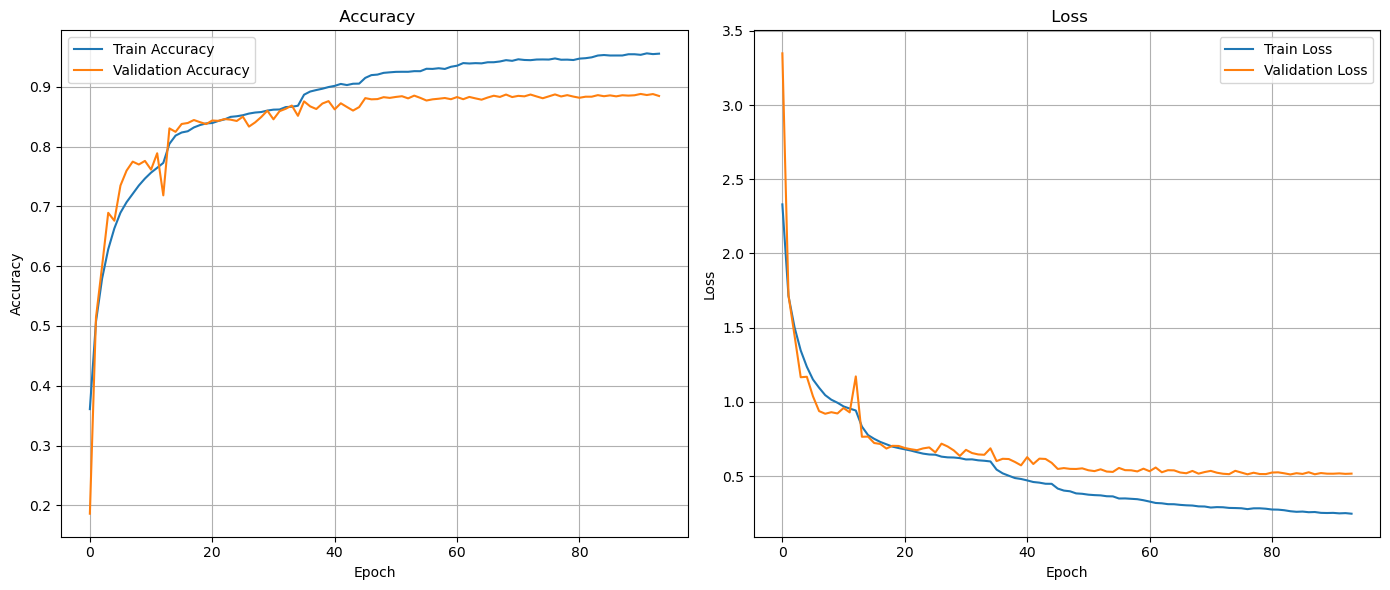

In [31]:
plot_loss_acc(history_df, "3 Blocks of CNN", "task_6_cnn_train_val.png")

### ✅ Conclusion

- **Early Stopping** triggered at **epoch 94**, indicating that validation loss plateaued for several epochs despite continued training improvements. This helped prevent further overfitting.
- Throughout the training:
  - **Training accuracy** steadily improved and reached high levels.
  - **Training loss** continued to decline, showing the model fit the training data well.
  - **Validation accuracy** improved initially but plateaued near the end.
  - **Validation loss** began to diverge from training loss after a point, indicating a potential mismatch in generalization.
- The performance gap between training and validation metrics confirms that the model experiences **mild overfitting**, even after applying **dropout** and **L2 regularization**.
- Overall, the CNN model demonstrates strong learning capability but could benefit from further generalization strategies such as data augmentation or simplified architecture if necessary.

## 📌 Task 7: Construct a ViT model

- Implement a Vision Transformer (ViT) model with attention mechanisms

> **KNOWN ISSUE:**
> If anytime the training give the error saying `TypeError: 'NoneType' object is not callable`, rerun from **start of Task 7** (Caution not to run the wrong training loop) to
> - Refresh **loading the dataset**
> - Refresh the **initial hyperparameters**
> - Refresh the **functions/classes** that were used in the training parts (**Caution:** Don't accidentally run the wrong training loop)
> - **Rerun** from the part where **hyperparameters were updated** for the training loop you were attempting to execute


### 🧠 Vision Transformer Architecture: Concepts, Justifications & Design Choices


#### 🔍 Components of the Vision Transformer (ViT)

The ViT model adapts the Transformer architecture (originally used in NLP) for image classification. Key components include:

- **📦 `Patches` Layer**  
  Splits each image into non-overlapping patches. For CIFAR-10 (32×32), using a patch size of 4 results in 64 patches.

- **🔢 `PatchEncoder` Layer**  
  Projects each flattened patch into a dense vector (`projection_dim`) and adds positional encodings to maintain spatial context.

- **🌀 Data Augmentation**  
  Random flips, rotations, zooms, and normalizations improve robustness and generalization.

- **🧱 Transformer Block (Repeated)**  
  Each block consists of:
  - Layer Normalization  
  - Multi-Head Self-Attention  
  - Residual connection  
  - Feedforward MLP (2 dense layers with GELU + Dropout)  
  - Another residual connection

- **🧠 MLP Head (Classifier)**  
  Flattened sequence output is passed through fully connected layers to predict class probabilities using softmax.


#### ⚡ Why I Implemented `JAXRandomRotate` and `JAXRandomZoom` Instead of Using Built-in Layers

The built-in `RandomRotation` and `RandomZoom` layers in Keras are not compatible with JAX/XLA's just-in-time (JIT) compilation. When these layers are used:

- JIT compilation is **broken**, causing training to **fall back to slower CPU paths**.
- This significantly increases training time — in some cases by **up to 3× per epoch**.
- GPU/TPU utilization drops due to device transfer overhead and non-vectorized operations.

To resolve this and maintain full compatibility with the JAX backend, I implemented custom augmentation layers:
- `JAXRandomRotate` and `JAXRandomZoom` are **JIT-friendly**, vectorized, and executed entirely on GPU.
- They preserve model performance while maintaining fast training speeds.
- With these layers, training remains **1.5–3× faster** compared to using the built-in counterparts.

Difference between my **JAX Version** and **Built-in Version**:

- Jax version fully runs on GPU but Built-in version runs on CPU
- Jax version implements rotation and zoom to all images but at random values but Built-in version implements roation and zoom to only randomly selected images

This design choice ensures my Vision Transformer trains efficiently without sacrificing regularization benefits from geometric augmentation.


#### Other Parameters

**Projection Dimension**

- The **`projection_dim`** determines the size of each patch embedding and acts as the working dimensionality for attention and MLP blocks.
- Example: For a 4×4×3 patch (48 features), projecting to 64-dim gives:  
  → `48×64 + 64 = 3136` parameters (weights + biases)
- The same dimension flows throughout the transformer block.

**Resize Images from 32×32 to 72×72 for ViT**

- **Patch Compatibility**: 72 is divisible by common patch sizes (e.g., 6, 12), allowing clean grid splits like 12×12 patches.  
- **More Attention Tokens**: Larger input → more patches → richer spatial attention for the transformer.  
- **Alignment with Pretrained Models**: Many ViTs are trained on larger images (e.g., 224×224).  
- **Minor Artifacts Are Acceptable**: While resizing may introduce slight interpolation artifacts, the transformer model tolerates them well — and the benefits outweigh the drawbacks.

**GELU vs ReLU**

- GELU (Gaussian Error Linear Unit) is smoother and retains some negative activations.
- Preferred in Transformers (BERT, GPT, ViT) due to better gradient flow and expressive capacity.
- ReLU harshly zeroes negatives; GELU preserves signal with less abrupt cutoffs.

**Batch Size = 128**

- The original notebook uses `batch_size=256`, suitable for powerful GPUs/TPUs.
- On consumer hardware like **RTX 3050 (4GB VRAM)**, starting with `64` or `128` is more stable.
- Larger batch sizes benefit ViTs, but only when hardware allows.
- For this assignment, I chose `batch_size=128` for stability and memory efficiency.

**4 Transformer Blocks**

- Increasing the number of blocks improves model capacity, but also training time and risk of overfitting.
- Empirical studies show **3–6 blocks** work well for small datasets like CIFAR-10.
- I chose **4 transformer blocks** as a balanced compromise:
  - Deep enough to capture hierarchical features  
  - Shallow enough to train efficiently on limited compute  
  - Less prone to overfitting than deeper (8+) configurations


In [270]:
# Prepare Data
# ------------

num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


x_train shape: (50000, 32, 32, 3) - y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000, 1)


In [271]:
# Hyperparameters
# ---------------

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 128 # 256
num_epochs = 10  # For real training, use num_epochs=100. 10 is a test value
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4

transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers

transformer_layers = 4 # 8

mlp_head_units = [
    2048,
    1024,
]  # Size of the dense layers of the final classifier


In [272]:
# Custom callback to track epoch stats
# ------------------------------------

class EpochStats(Callback):
    def on_train_begin(self, logs=None):
        super().on_train_begin(logs)
        
        self.train_start_time = time.time()
        self.epoch_count = 0
        self.total_epoch_time = 0.0

    def on_epoch_begin(self, epoch, logs=None):
        super().on_epoch_begin(epoch, logs)
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        super().on_epoch_end(epoch, logs)
        
        epoch_duration = time.time() - self.epoch_start_time
        self.total_epoch_time += epoch_duration
        self.epoch_count += 1
        total_duration = time.time() - self.train_start_time

        print(f"Epoch {epoch + 1}: {epoch_duration:.2f} s | Total: {total_duration:.2f} s | ", end='')
        print(f"loss: {logs.get('loss', 0.0):.4f} accuracy: {logs.get('accuracy', 0.0):.4f} top_5: {logs.get('top_5_accuracy', 0.0):.4f} | ")
        print(f"val_loss: {logs.get('val_loss', 0.0):.4f} val_accuracy: {logs.get('val_accuracy', 0.0):.4f} val_top_5: {logs.get('val_top_5_accuracy', 0.0):.4f}")

    def on_train_end(self, logs=None):
        super().on_train_end(logs)
        
        total_time = time.time() - self.train_start_time
        avg_epoch_time = self.total_epoch_time / self.epoch_count if self.epoch_count > 0 else 0

        # Training Stats
        print("\n✅ Training Complete")
        print(f"Epochs trained       : {self.epoch_count}")
        print(f"Total training time  : {total_time:.2f} s")
        print(f"Avg epoch time       : {avg_epoch_time:.2f} s")

        # Final metrics (from last epoch logs)
        print(f"Final Train loss     : {logs.get('loss', 0.0):.4f}")
        print(f"Final Train accuracy : {logs.get('accuracy', 0.0):.4f}")
        print(f"Final Train top-5 acc: {logs.get('top_5_accuracy', 0.0):.4f}")
        print(f"Final Val loss       : {logs.get('val_loss', 0.0):.4f}")
        print(f"Final Val accuracy   : {logs.get('val_accuracy', 0.0):.4f}")
        print(f"Final Val top-5 acc  : {logs.get('val_top_5_accuracy', 0.0):.4f}")



In [273]:
# Custom Augmentations
# --------------------

class JAXRandomZoom(layers.Layer):
    def __init__(self, zoom_range=(0.9, 1.1), **kwargs):
        super().__init__(**kwargs)
        self.zoom_range = zoom_range

    def call(self, images, training=False):
        if not training:
            return images

        batch_size = images.shape[0]
        rng = jax.random.PRNGKey(123)
        zooms = jax.random.uniform(
            rng, shape=(batch_size,),
            minval=self.zoom_range[0], maxval=self.zoom_range[1]
        )

        return jax.vmap(self._zoom_image)(images, zooms)

    @staticmethod
    @jax.jit
    def _zoom_image(image, zoom_factor):
        def _zoom_channel(channel):
            h, w = channel.shape
            out_h = int(h)
            out_w = int(w)

            y = jnp.linspace(0, h - 1, out_h)
            x = jnp.linspace(0, w - 1, out_w)
            yy, xx = jnp.meshgrid(y, x, indexing='ij')

            coords = jnp.stack([
                (yy - h / 2) / zoom_factor + h / 2,
                (xx - w / 2) / zoom_factor + w / 2
            ])
            return map_coordinates(channel, coords, order=1, mode='reflect')

        return jnp.stack([_zoom_channel(image[:, :, i]) for i in range(image.shape[-1])], axis=-1)


class JAXRandomRotate(layers.Layer):
    def __init__(self, max_angle=0.1, **kwargs):  # radians
        super().__init__(**kwargs)
        self.max_angle = max_angle

    def call(self, images, training=False):
        if not training:
            return images

        batch_size = images.shape[0]
        rng = jax.random.PRNGKey(42)
        angles = jax.random.uniform(rng, shape=(batch_size,), minval=-self.max_angle, maxval=self.max_angle)

        return jax.vmap(self._rotate_image)(images, angles)

    @staticmethod
    @jax.jit
    def _rotate_image(image, angle):
        def _rotate_channel(channel):
            h, w = channel.shape
            cy, cx = h / 2.0, w / 2.0

            y, x = jnp.meshgrid(jnp.arange(h), jnp.arange(w), indexing='ij')
            y = y - cy
            x = x - cx

            cos_a = jnp.cos(angle)
            sin_a = jnp.sin(angle)
            x_rot = cos_a * x + sin_a * y + cx
            y_rot = -sin_a * x + cos_a * y + cy

            coords = jnp.stack([y_rot, x_rot])
            return map_coordinates(channel, coords, order=1, mode='reflect')

        return jnp.stack([_rotate_channel(image[:, :, i]) for i in range(image.shape[-1])], axis=-1)


In [274]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        #layers.RandomRotation(factor=0.02),
        #layers.RandomZoom(height_factor=0.2, width_factor=0.2),
        JAXRandomRotate(max_angle=0.2),
        JAXRandomZoom(zoom_range=(0.8, 1.2)),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


In [275]:
# MLP
# ---

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


In [276]:
# Custom Patch Class
# ------------------

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config


In [277]:
# Patch Encoder Class
# -------------------

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config


In [211]:
# Transformer Block
# -----------------

def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    
    # Augment data.
    augmented = data_augmentation(inputs)
    
    # Create patches.
    patches = Patches(patch_size)(augmented)
    
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    
    return model


In [212]:
# Model Summary
# -------------
vit_classifier = create_vit_classifier()
vit_classifier.summary()


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_34      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 72, 72, 3) │          7 │ input_layer_34[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches_15          │ (None, 144, 108)  │          0 │ data_augmentatio… │
│ (Patches)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder_15    │ (None, 144, 64)   │     16,192 │ patches_15[0][0]  │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ patch_encoder_15… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_120 (Add)       │ (None, 144, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder_15… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_120[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_183 (Dense)   │ (None, 144, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_231         │ (None, 144, 128)  │          0 │ dense_183[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_184 (Dense)   │ (None, 144, 64)   │      8,256 │ dropout_231[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_232         │ (None, 144, 64)   │          0 │ dense_184[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_121 (Add)       │ (None, 144, 64)   │          0 │ dropout_232[0][0… │
│                     │                   │            │ add_120[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_121[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_122 (Add)       │ (None, 144, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ add_121[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_122[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 21,333,969 (81.38 MB)

 Trainable params: 21,333,962 (81.38 MB)

 Non-trainable params: 7 (28.00 B)

## 📌 Task 8: Train the ViT model using the CIFAR-10 dataset

- Train the ViT model using the training dataset with an appropriate number of training epochs.
> **Note:** This step may require several hours to complete using the default GPUs/hardware resources within Google Colab.

> **KNOWN ISSUE:**
> If anytime the training give the error saying `TypeError: 'NoneType' object is not callable`, rerun from **start of Task 7** (Caution not to run the wrong training loop) to
> - Refresh **loading the dataset**
> - Refresh the **initial hyperparameters**
> - Refresh the **functions/classes** that were used in the training parts (**Caution:** Don't accidentally run the wrong training loop)
> - **Rerun** from the part where **hyperparameters were updated** for the training loop you were attempting to execute


In [191]:
batch_size = 128 # 256
num_epochs = 10  # For real training, use num_epochs=100. 10 is a test value

In [199]:
# Training Loop Definition
# ------------------------
def run_experiment(model):
    optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        #jit_compile=False,   # or False to disable
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top_5_accuracy"),
        ],
    )

    checkpoint_filepath = "best_vit_checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    early_stop = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )

    epoch_stats = EpochStats()

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback, early_stop, reduce_lr, epoch_stats],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


#### Testing with Built-in Augments

In [193]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
        #JAXRandomRotate(max_angle=0.2),
        #JAXRandomZoom(zoom_range=(0.8, 1.2)),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


In [194]:
batch_size = 128 # 256
num_epochs = 5  # For real training, use num_epochs=100. 10 is a test value
vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/5
Epoch 1: 319.96 s | Total: 319.96 s | loss: 1.9841 accuracy: 0.3270 top_5: 0.8232 | acy: 0.2694 - loss: 2.5129 - top_5_accuracy: 0.7588  
val_loss: 1.4674 val_accuracy: 0.4812 val_top_5: 0.9142
352/352 ━━━━━━━━━━━━━━━━━━━━ 320s 908ms/step - accuracy: 0.2695 - loss: 2.5114 - top_5_accuracy: 0.7590 - val_accuracy: 0.4812 - val_loss: 1.4674 - val_top_5_accuracy: 0.9142 - learning_rate: 0.0010
Epoch 2/5
Epoch 2: 293.84 s | Total: 613.81 s | loss: 1.5321 accuracy: 0.4504 top_5: 0.9063 | acy: 0.4376 - loss: 1.5731 - top_5_accuracy: 0.8991  
val_loss: 1.2893 val_accuracy: 0.5240 val_top_5: 0.9430
352/352 ━━━━━━━━━━━━━━━━━━━━ 294s 835ms/step - accuracy: 0.4376 - loss: 1.5730 - top_5_accuracy: 0.8991 - val_accuracy: 0.5240 - val_loss: 1.2893 - val_top_5_accuracy: 0.9430 - learning_rate: 0.0010
Epoch 3/5
Epoch 3: 313.04 s | Total: 926.86 s | loss: 1.3957 accuracy: 0.4979 top_5: 0.9251 | acy: 0.4866 - loss: 1.4225 - top_5_accuracy: 0.9221  
val_loss: 1.1478 val_accuracy: 0.5872 val_top_

#### Testing without the RandomRotation and RandomZoom

In [195]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        #layers.RandomRotation(factor=0.02),
        #layers.RandomZoom(height_factor=0.2, width_factor=0.2),
        #JAXRandomRotate(max_angle=0.2),
        #JAXRandomZoom(zoom_range=(0.8, 1.2)),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


In [196]:
batch_size = 128 # 256
num_epochs = 5  # For real training, use num_epochs=100. 10 is a test value
vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/5
Epoch 1: 111.37 s | Total: 111.37 s | loss: 1.9684 accuracy: 0.3362 top_5: 0.8255 | acy: 0.2727 - loss: 2.5336 - top_5_accuracy: 0.7601  
val_loss: 1.4463 val_accuracy: 0.4730 val_top_5: 0.9210
352/352 ━━━━━━━━━━━━━━━━━━━━ 111s 267ms/step - accuracy: 0.2729 - loss: 2.5320 - top_5_accuracy: 0.7603 - val_accuracy: 0.4730 - val_loss: 1.4463 - val_top_5_accuracy: 0.9210 - learning_rate: 0.0010
Epoch 2/5
Epoch 2: 72.36 s | Total: 183.74 s | loss: 1.5010 accuracy: 0.4631 top_5: 0.9119 | racy: 0.4414 - loss: 1.5518 - top_5_accuracy: 0.9048 
val_loss: 1.2143 val_accuracy: 0.5606 val_top_5: 0.9504
352/352 ━━━━━━━━━━━━━━━━━━━━ 72s 160ms/step - accuracy: 0.4414 - loss: 1.5517 - top_5_accuracy: 0.9048 - val_accuracy: 0.5606 - val_loss: 1.2143 - val_top_5_accuracy: 0.9504 - learning_rate: 0.0010
Epoch 3/5
Epoch 3: 56.31 s | Total: 240.06 s | loss: 1.3383 accuracy: 0.5223 top_5: 0.9332 | racy: 0.5138 - loss: 1.3612 - top_5_accuracy: 0.9309 
val_loss: 1.1538 val_accuracy: 0.5930 val_top_5: 

#### Testing with XLA-Compliant RandomRotation and RandomZoom

In [197]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        #layers.RandomRotation(factor=0.02),
        #layers.RandomZoom(height_factor=0.2, width_factor=0.2),
        JAXRandomRotate(max_angle=0.2),
        JAXRandomZoom(zoom_range=(0.8, 1.2)),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


In [198]:
batch_size = 128 # 256
num_epochs = 5  # For real training, use num_epochs=100. 10 is a test value
vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/5
Epoch 1: 111.96 s | Total: 111.96 s | loss: 2.0268 accuracy: 0.3125 top_5: 0.8048 | acy: 0.2527 - loss: 2.5530 - top_5_accuracy: 0.7398  
val_loss: 1.5042 val_accuracy: 0.4548 val_top_5: 0.9142
352/352 ━━━━━━━━━━━━━━━━━━━━ 112s 266ms/step - accuracy: 0.2529 - loss: 2.5515 - top_5_accuracy: 0.7400 - val_accuracy: 0.4548 - val_loss: 1.5042 - val_top_5_accuracy: 0.9142 - learning_rate: 0.0010
Epoch 2/5
Epoch 2: 72.95 s | Total: 184.93 s | loss: 1.5692 accuracy: 0.4316 top_5: 0.8994 | racy: 0.4126 - loss: 1.6221 - top_5_accuracy: 0.8890 
val_loss: 1.2896 val_accuracy: 0.5326 val_top_5: 0.9478
352/352 ━━━━━━━━━━━━━━━━━━━━ 73s 161ms/step - accuracy: 0.4127 - loss: 1.6220 - top_5_accuracy: 0.8890 - val_accuracy: 0.5326 - val_loss: 1.2896 - val_top_5_accuracy: 0.9478 - learning_rate: 0.0010
Epoch 3/5
Epoch 3: 56.65 s | Total: 241.59 s | loss: 1.4265 accuracy: 0.4891 top_5: 0.9221 | racy: 0.4834 - loss: 1.4435 - top_5_accuracy: 0.9202 
val_loss: 1.1533 val_accuracy: 0.5910 val_top_5: 

### ⚡Performance Comparison 

To evaluate the performance impact of different data augmentation strategies on training time, three configurations were compared over 5 epochs:

**⏱️ Average Epoch Time Comparison**

| Augmentation Strategy                 | Avg Epoch Time |
|--------------------------------------|----------------|
| Only `RandomFlip`                | ~70.28 s       |
| `RandomFlip` + XLA `Rotate`/`Zoom`| ~70.78 s       |
| Built-in `RandomRotation`/`RandomZoom` | ~304.68 s |

**🔍 Key Insights**

- **Only `RandomFlip`** was the **fastest**, as expected.
- Adding **XLA-compliant `RandomRotation` and `RandomZoom`** caused **negligible slowdown**, keeping training time virtually the same as `RandomFlip` alone.
- In contrast, using the **built-in Keras `RandomRotation` and `RandomZoom`** was **4-5× slower**, greatly increasing training duration.
- **5 epoch** is not enough for analysing Loss/Accuracy

**Final Choice:** Use the XLA-compatible `RandomRotation` and `RandomZoom`


In [213]:
# TRAIN PARAMETERS UPDATES
# ------------------------
batch_size = 128 # 256
num_epochs = 200  # using 200 as we have implemented early stop mechanisms

In [214]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        #layers.RandomRotation(factor=0.02),
        #layers.RandomZoom(height_factor=0.2, width_factor=0.2),
        JAXRandomRotate(max_angle=0.2),
        JAXRandomZoom(zoom_range=(0.8, 1.2)),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


In [215]:
# !!! TRAIN THE MODEL !!!
# -----------------------

vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/200
Epoch 1: 117.27 s | Total: 117.27 s | loss: 1.9737 accuracy: 0.3336 top_5: 0.8255 | acy: 0.2751 - loss: 2.5159 - top_5_accuracy: 0.7629  
val_loss: 1.4456 val_accuracy: 0.4824 val_top_5: 0.9240
352/352 ━━━━━━━━━━━━━━━━━━━━ 117s 283ms/step - accuracy: 0.2753 - loss: 2.5144 - top_5_accuracy: 0.7631 - val_accuracy: 0.4824 - val_loss: 1.4456 - val_top_5_accuracy: 0.9240 - learning_rate: 0.0010
Epoch 2/200
Epoch 2: 74.75 s | Total: 192.03 s | loss: 1.5135 accuracy: 0.4569 top_5: 0.9092 | racy: 0.4445 - loss: 1.5495 - top_5_accuracy: 0.9023 
val_loss: 1.2615 val_accuracy: 0.5628 val_top_5: 0.9454
352/352 ━━━━━━━━━━━━━━━━━━━━ 75s 158ms/step - accuracy: 0.4445 - loss: 1.5494 - top_5_accuracy: 0.9023 - val_accuracy: 0.5628 - val_loss: 1.2615 - val_top_5_accuracy: 0.9454 - learning_rate: 0.0010
Epoch 3/200
Epoch 3: 56.38 s | Total: 248.42 s | loss: 1.3868 accuracy: 0.5045 top_5: 0.9269 | racy: 0.5004 - loss: 1.3942 - top_5_accuracy: 0.9250 
val_loss: 1.1508 val_accuracy: 0.5956 val_t

In [216]:
# Save to file
# ------------

history_df = pd.DataFrame(history.history)
history_df.head()

,accuracy,loss,top_5_accuracy,val_accuracy,val_loss,val_top_5_accuracy,learning_rate
0,0.333644,1.973671,0.825511,0.4824,1.445574,0.9240,0.001
1,0.456933,1.513523,0.909178,0.5628,1.261510,0.9454,0.001
2,0.504467,1.386791,0.926867,0.5956,1.150815,0.9580,0.001
3,0.533089,1.314310,0.933867,0.6200,1.084778,0.9632,0.001
4,0.561711,1.245563,0.942422,0.6100,1.085035,0.9648,0.001


In [217]:
history_df.to_csv("vit_history.csv")

# For Loading
#history_df = pd.read_csv("vit_history.csv") 
#print(history_df.columns)
#history_df.rename(columns={"Unnamed: 0": "epoch"}, inplace=True)

In [218]:
history_df = pd.read_csv("vit_history.csv") 
print(history_df.columns)
history_df.rename(columns={"Unnamed: 0": "epoch"}, inplace=True)
print(history_df.columns)

Index(['Unnamed: 0', 'accuracy', 'loss', 'top_5_accuracy', 'val_accuracy',
       'val_loss', 'val_top_5_accuracy', 'learning_rate'],
      dtype='object')
Index(['epoch', 'accuracy', 'loss', 'top_5_accuracy', 'val_accuracy',
       'val_loss', 'val_top_5_accuracy', 'learning_rate'],
      dtype='object')


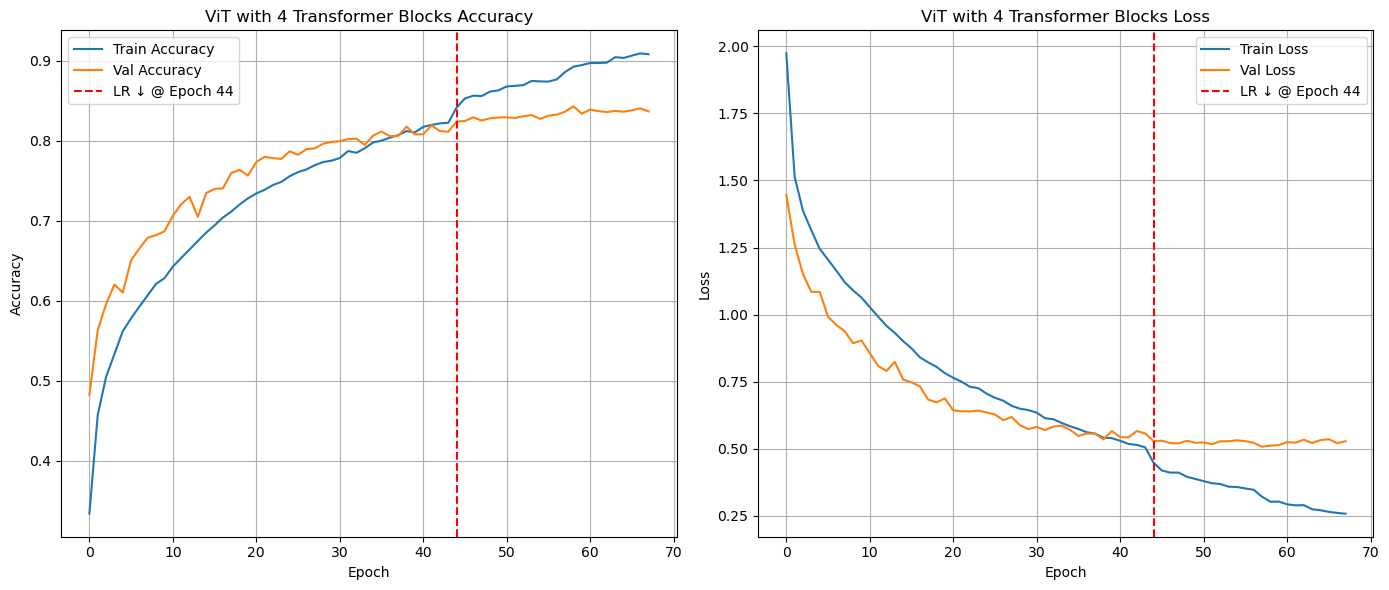

In [220]:
# Plot

def plot_accuracy_and_loss_with_lr_change(history_df, lr_change_epoch, title, filename):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot Accuracy
    axes[0].plot(history_df["epoch"], history_df["accuracy"], label="Train Accuracy")
    axes[0].plot(history_df["epoch"], history_df["val_accuracy"], label="Val Accuracy")
    axes[0].axvline(x=lr_change_epoch, color="red", linestyle="--", label=f"LR ↓ @ Epoch {lr_change_epoch}")
    axes[0].set_title(f'{title} Accuracy')
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Accuracy")
    axes[0].legend()
    axes[0].grid(True)

    # Plot Loss
    axes[1].plot(history_df["epoch"], history_df["loss"], label="Train Loss")
    axes[1].plot(history_df["epoch"], history_df["val_loss"], label="Val Loss")
    axes[1].axvline(x=lr_change_epoch, color="red", linestyle="--", label=f"LR ↓ @ Epoch {lr_change_epoch}")
    axes[1].set_title(f'{title} Loss')
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Loss")
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

plot_accuracy_and_loss_with_lr_change(history_df, 44, "ViT with 4 Transformer Blocks", "task_8a_vit_train_val.png")


#### 📉 Training Analysis

Upon reviewing the training and validation accuracy and loss plots, we observe that while the model steadily improves and generalizes well during the early stages of training, signs of **overfitting** begin to appear in the later epochs:

- The **training accuracy** continues to increase beyond epoch ~50, reaching above 90%, while the **validation accuracy plateaus** around 83–84%.
- Similarly, **training loss** drops sharply and consistently, while **validation loss stops improving**, occasionally fluctuating.
- At **epoch 44**, a **learning rate reduction** is triggered by the `ReduceLROnPlateau` callback due to plateauing validation loss. This results in a noticeable improvement in both training and validation performance in the subsequent epochs.

This pattern indicates that the model has started to memorize training data instead of learning more generalized features.

**Proposed Regularization Adjustments:**
- Increase the **dropout rate inside Transformer blocks** from `0.1` to `0.3` to make the attention and MLP layers more robust
- Increase the **final dropout rate** from `0.5` to `0.6` after the representation layer to encourage better generalization before classification
- Increase the **`EarlyStopping` patience** to `15` epochs (up from 10) to allow more time for the model to respond to learning rate reductions before halting
- **Retain 4 Transformer blocks:** Increasing the number of blocks (e.g., 6 or 8) would likely intensify overfitting, retaining 4 blocks keeps the architecture expressive enough without excessive depth, given the dataset size and complexity



In [221]:
# Transformer Block Enhanced
# --------------------------

def create_vit_classifier_enhanced():
    inputs = keras.Input(shape=input_shape)
    
    # Augment data.
    augmented = data_augmentation(inputs)
    
    # Create patches.
    patches = Patches(patch_size)(augmented)
    
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)

        # Additional dropout after attention.
        attention_output = layers.Dropout(0.3)(attention_output) # <-- New Additional Dropout
        
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.3) # <-- Previously 0.1
        
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    
    return model


In [222]:
# Training Loop Definition 2
# --------------------------
def run_experiment2(model):
    optimizer = keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        #jit_compile=False,   # or False to disable
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top_5_accuracy"),
        ],
    )

    checkpoint_filepath = "best_enhanced_vit_checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    early_stop = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=15, # <-- Previously 10
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )

    epoch_stats = EpochStats()

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback, early_stop, reduce_lr, epoch_stats],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


In [223]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        JAXRandomRotate(max_angle=0.2),
        JAXRandomZoom(zoom_range=(0.8, 1.2)),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)


In [224]:
# 6 Transformer Blocks


vit_classifier_enhanced = create_vit_classifier_enhanced()
vit_classifier_enhanced.summary()

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_38      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 72, 72, 3) │          7 │ input_layer_38[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches_17          │ (None, 144, 108)  │          0 │ data_augmentatio… │
│ (Patches)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder_17    │ (None, 144, 64)   │     16,192 │ patches_17[0][0]  │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ patch_encoder_17… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_261         │ (None, 144, 64)   │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_136 (Add)       │ (None, 144, 64)   │          0 │ dropout_261[0][0… │
│                     │                   │            │ patch_encoder_17… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_136[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_207 (Dense)   │ (None, 144, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_262         │ (None, 144, 128)  │          0 │ dense_207[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_208 (Dense)   │ (None, 144, 64)   │      8,256 │ dropout_262[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_263         │ (None, 144, 64)   │          0 │ dense_208[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_137 (Add)       │ (None, 144, 64)   │          0 │ dropout_263[0][0… │
│                     │                   │            │ add_136[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_137[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_265         │ (None, 144, 64)   │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 21,333,969 (81.38 MB)

 Trainable params: 21,333,962 (81.38 MB)

 Non-trainable params: 7 (28.00 B)

In [226]:
# TRAIN PARAMETERS UPDATES
# ------------------------
batch_size = 128 # 256
num_epochs = 200  # using 200 as we have implemented early stop mechanisms

In [227]:
vit_classifier_enhanced = create_vit_classifier_enhanced()
history = run_experiment2(vit_classifier_enhanced)

Epoch 1/200
Epoch 1: 126.16 s | Total: 126.17 s | loss: 2.0195 accuracy: 0.3116 top_5: 0.8116 | acy: 0.2565 - loss: 2.5518 - top_5_accuracy: 0.7485  
val_loss: 1.4745 val_accuracy: 0.4688 val_top_5: 0.9210
352/352 ━━━━━━━━━━━━━━━━━━━━ 126s 288ms/step - accuracy: 0.2566 - loss: 2.5503 - top_5_accuracy: 0.7487 - val_accuracy: 0.4688 - val_loss: 1.4745 - val_top_5_accuracy: 0.9210 - learning_rate: 0.0010
Epoch 2/200
Epoch 2: 74.96 s | Total: 201.14 s | loss: 1.5911 accuracy: 0.4223 top_5: 0.8965 | racy: 0.4028 - loss: 1.6415 - top_5_accuracy: 0.8865 
val_loss: 1.2982 val_accuracy: 0.5304 val_top_5: 0.9440
352/352 ━━━━━━━━━━━━━━━━━━━━ 75s 158ms/step - accuracy: 0.4029 - loss: 1.6413 - top_5_accuracy: 0.8865 - val_accuracy: 0.5304 - val_loss: 1.2982 - val_top_5_accuracy: 0.9440 - learning_rate: 0.0010
Epoch 3/200
Epoch 3: 57.12 s | Total: 258.27 s | loss: 1.4743 accuracy: 0.4691 top_5: 0.9161 | racy: 0.4622 - loss: 1.4883 - top_5_accuracy: 0.9133  
val_loss: 1.2663 val_accuracy: 0.5538 val_

In [232]:
# Save to file
# ------------

history_df = pd.DataFrame(history.history)
history_df.head()

,accuracy,loss,top_5_accuracy,val_accuracy,val_loss,val_top_5_accuracy,learning_rate
0,0.311556,2.019502,0.811644,0.4688,1.474516,0.9210,0.001
1,0.422289,1.591116,0.896489,0.5304,1.298219,0.9440,0.001
2,0.469133,1.474265,0.916067,0.5538,1.266313,0.9436,0.001
3,0.495911,1.416147,0.922778,0.5814,1.158389,0.9556,0.001
4,0.514511,1.364078,0.929289,0.5964,1.150415,0.9586,0.001


In [233]:
history_df.to_csv("vit_enhanced_history.csv")

# For Loading
#history_df = pd.read_csv("vit_history.csv") 
#print(history_df.columns)
#history_df.rename(columns={"Unnamed: 0": "epoch"}, inplace=True)

In [234]:
history_df = pd.read_csv("vit_enhanced_history.csv") 
print(history_df.columns)
history_df.rename(columns={"Unnamed: 0": "epoch"}, inplace=True)
print(history_df.columns)

Index(['Unnamed: 0', 'accuracy', 'loss', 'top_5_accuracy', 'val_accuracy',
       'val_loss', 'val_top_5_accuracy', 'learning_rate'],
      dtype='object')
Index(['epoch', 'accuracy', 'loss', 'top_5_accuracy', 'val_accuracy',
       'val_loss', 'val_top_5_accuracy', 'learning_rate'],
      dtype='object')


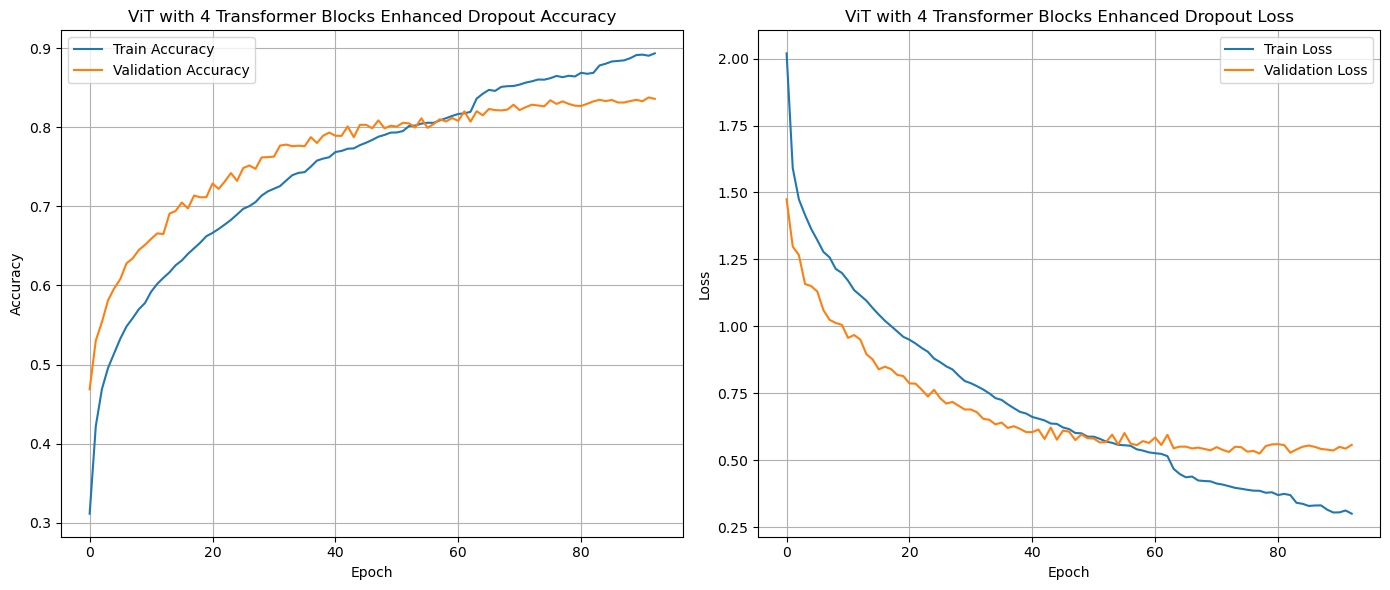

In [235]:
plot_loss_acc(history_df, "ViT with 4 Transformer Blocks Enhanced Dropout", "task_8b_vit_enhanced_train_val.png")

### 🔧 Summary of Parameter & Architecture Changes

In this improved experiment, several key changes were made to the model architecture and training strategy compared to the initial baseline. These adjustments were driven by a combination of observed training dynamics, best practices for Vision Transformers (ViT), and compatibility with the JAX backend.

#### 🌀 1. Replaced Dropout with `DropPath` (Stochastic Depth)

- Instead of relying purely on `Dropout` layers, **`DropPath`** (stochastic depth) was added **after the attention output and the MLP block** within each Transformer block.
- `DropPath` drops *entire residual branches* randomly during training, providing stronger regularization for deep architectures like ViT.
- A **linearly scaled `drop_prob`** from 0.05 to 0.2 was used across the 6 Transformer blocks to regularize deeper layers more aggressively.
- This helps reduce overfitting while maintaining gradient flow in early layers — better suited than plain dropout in Transformer-based models.

#### 📉 2. Replaced `ReduceLROnPlateau` with `WarmUpCosineDecay`

- `ReduceLROnPlateau` relies on validation metrics plateauing — this works well for CNNs but is less suited for ViTs, which tend to require **a smoother and predefined LR schedule**.
- **`WarmUp + Cosine Decay`** provides:
  - Gradual increase in learning rate over the warmup phase (5 epochs), which stabilizes training initially.
  - Smooth cosine-based annealing over 100 epochs, which reduces the learning rate progressively for better convergence.
- This LR schedule complements the **AdamW optimizer**, which benefits from predictable decay to optimize both weights and learning rates independently.

#### ⚙️ 3. Custom JAX-Compliant Implementations

- **Built-in DropPath and WarmUpCosineDecay** layers from TensorFlow are not compatible with the JAX backend (`keras.backend="jax"`).
- Therefore, both components were **custom-implemented in JAX-compatible form**, using:
  - `jax.random.bernoulli` for DropPath.
  - Pure JAX math for WarmUpCosineDecay schedule.
- These implementations ensure compatibility and efficiency during training on JAX backends (e.g., TPU or accelerated hardware).

#### 🔁 4. Increased Transformer Blocks: 6 Instead of 4

- In the previous run with 4 blocks, both training and validation accuracy had already **crossed 80%** before learning rate reduction.
- This suggested a degree of **underfitting**, indicating that the model had capacity to learn more.
- Increasing to **6 blocks**, combined with **stronger regularization** (DropPath and higher dropout), helps the model learn richer representations without overfitting.

#### ✅ Additional Notes

- EarlyStopping was kept (patience = 10) to prevent overtraining if no further gains are made.
- Validation accuracy has been increasing steadily without divergence, indicating improved generalization.
- Total training time increased slightly, but performance gains justify the added depth and regularization.

In [278]:
# Custom Dropout - DropPath
# -------------------------

class DropPath(layers.Layer):
    def __init__(self, drop_prob=0.1, **kwargs):
        super().__init__(**kwargs)
        self.drop_prob = drop_prob

    def call(self, inputs, training=None):
        if not training or self.drop_prob == 0.0:
            return inputs

        keep_prob = 1.0 - self.drop_prob
        batch_size = ops.shape(inputs)[0]

        # Generate random tensor [batch_size, 1, 1, ..., 1] to apply per sample
        shape = (batch_size,) + (1,) * (inputs.ndim - 1)

        rng = jax.random.PRNGKey(10)
        random_tensor = jax.random.bernoulli(rng, p=keep_prob, shape=shape)
        random_tensor = ops.cast(random_tensor, dtype=inputs.dtype)
        output = (inputs / keep_prob) * random_tensor
        return output

    def get_config(self):
        config = super().get_config()
        config.update({"drop_prob": self.drop_prob})
        return config



In [279]:
# Custom LR Scheduler
# -------------------

class WarmUpCosineDecay(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, base_lr, warmup_epochs, total_epochs, steps_per_epoch):
        super().__init__()
        self.base_lr = base_lr
        self.warmup_epochs = warmup_epochs
        self.total_epochs = total_epochs
        self.steps_per_epoch = steps_per_epoch
        self.total_steps = steps_per_epoch * total_epochs
        self.warmup_steps = steps_per_epoch * warmup_epochs

    def __call__(self, step):
        step = jnp.asarray(step, dtype=jnp.float32)

        # Warm-up phase
        warmup_lr = self.base_lr * (step / self.warmup_steps)

        # Cosine decay phase
        progress = (step - self.warmup_steps) / (self.total_steps - self.warmup_steps)
        progress = jnp.clip(progress, 0.0, 1.0)
        cosine_lr = self.base_lr * 0.5 * (1 + jnp.cos(jnp.pi * progress))

        return jnp.where(step < self.warmup_steps, warmup_lr, cosine_lr)



In [280]:
# Transformer Block - New
# -----------------------

def create_vit_classifier_en2():
    inputs = keras.Input(shape=input_shape)
    
    # Augment data.
    augmented = data_augmentation(inputs)
    
    # Create patches.
    patches = Patches(patch_size)(augmented)
    
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for i in range(transformer_layers):
        drop_prob = (i + 1) / transformer_layers * 0.3  # Linear scaling: 0.06 → ... → 0.3
        
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)

        # Additional dropout after attention.
        #attention_output = layers.Dropout(0.3)(attention_output) # <-- New Additional Dropout

        # DropPath after attention
        attention_output = DropPath(drop_prob=drop_prob)(attention_output) # <-- New Additional Dropout
        
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.3)

        # DropPath after MLP
        x3 = DropPath(drop_prob=drop_prob)(x3)
        
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    
    return model


In [281]:
# Model Summary
# -------------
transformer_layers = 6 # Changed from 4 to 6
vit_classifier = create_vit_classifier_en2()
vit_classifier.summary()

Model: "functional_121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_51      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 72, 72, 3) │          7 │ input_layer_51[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches_29          │ (None, 144, 108)  │          0 │ data_augmentatio… │
│ (Patches)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder_29    │ (None, 144, 64)   │     16,192 │ patches_29[0][0]  │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ patch_encoder_29… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ drop_path_92        │ (None, 144, 64)   │          0 │ multi_head_atten… │
│ (DropPath)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_264 (Add)       │ (None, 144, 64)   │          0 │ drop_path_92[0][… │
│                     │                   │            │ patch_encoder_29… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_264[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_383 (Dense)   │ (None, 144, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_497         │ (None, 144, 128)  │          0 │ dense_383[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_384 (Dense)   │ (None, 144, 64)   │      8,256 │ dropout_497[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_498         │ (None, 144, 64)   │          0 │ dense_384[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ drop_path_93        │ (None, 144, 64)   │          0 │ dropout_498[0][0] │
│ (DropPath)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_265 (Add)       │ (None, 144, 64)   │          0 │ drop_path_93[0][… │
│                     │                   │            │ add_264[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_265[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 21,500,369 (82.02 MB)

 Trainable params: 21,500,362 (82.02 MB)

 Non-trainable params: 7 (28.00 B)

In [282]:
# Training Loop Definition - New
# ------------------------------

def run_experiment_en2(model):

    steps_per_epoch = len(x_train) // batch_size

    # Instantiate the warmup + cosine decay learning rate schedule
    lr_schedule = WarmUpCosineDecay(
        base_lr=0.001,
        warmup_epochs=5,
        total_epochs=num_epochs,
        steps_per_epoch=steps_per_epoch
    )
    
    optimizer = keras.optimizers.AdamW(
        learning_rate=lr_schedule, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        #jit_compile=False,   # or False to disable
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top_5_accuracy"),
        ],
    )

    checkpoint_filepath = "best_en2_vit_checkpoint.weights.h5"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    early_stop = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    epoch_stats = EpochStats()

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback, early_stop, epoch_stats],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


In [243]:
batch_size = 128 # 256
num_epochs = 120  # For real training, use num_epochs=100. 10 is a test value
transformer_layers = 6 # Changed from 4 to 6

vit_classifier = create_vit_classifier_en2()
history = run_experiment_en2(vit_classifier)


Epoch 1/120
Epoch 1: 233.16 s | Total: 233.17 s | loss: 2.8792 accuracy: 0.2008 top_5: 0.6796 | acy: 0.1584 - loss: 3.6111 - top_5_accuracy: 0.6063  
val_loss: 1.8437 val_accuracy: 0.3470 val_top_5: 0.8352
352/352 ━━━━━━━━━━━━━━━━━━━━ 233s 497ms/step - accuracy: 0.1586 - loss: 3.6090 - top_5_accuracy: 0.6065 - val_accuracy: 0.3470 - val_loss: 1.8437 - val_top_5_accuracy: 0.8352
Epoch 2/120
Epoch 2: 102.34 s | Total: 335.52 s | loss: 1.9688 accuracy: 0.3026 top_5: 0.8087 | acy: 0.2796 - loss: 2.0388 - top_5_accuracy: 0.7912  
val_loss: 1.6171 val_accuracy: 0.4188 val_top_5: 0.8894
352/352 ━━━━━━━━━━━━━━━━━━━━ 102s 222ms/step - accuracy: 0.2797 - loss: 2.0386 - top_5_accuracy: 0.7913 - val_accuracy: 0.4188 - val_loss: 1.6171 - val_top_5_accuracy: 0.8894
Epoch 3/120
Epoch 3: 77.51 s | Total: 413.04 s | loss: 1.7270 accuracy: 0.3786 top_5: 0.8668 | racy: 0.3637 - loss: 1.7770 - top_5_accuracy: 0.8548  
val_loss: 1.4405 val_accuracy: 0.4676 val_top_5: 0.9240
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s

In [244]:
# Save to file
# ------------

history_df = pd.DataFrame(history.history)
history_df.head()

In [245]:
history_df = pd.read_csv("vit_en2_history.csv") 
print(history_df.columns)
history_df.rename(columns={"Unnamed: 0": "epoch"}, inplace=True)
print(history_df.columns)

Index(['Unnamed: 0', 'accuracy', 'loss', 'top_5_accuracy', 'val_accuracy',
       'val_loss', 'val_top_5_accuracy'],
      dtype='object')
Index(['epoch', 'accuracy', 'loss', 'top_5_accuracy', 'val_accuracy',
       'val_loss', 'val_top_5_accuracy'],
      dtype='object')


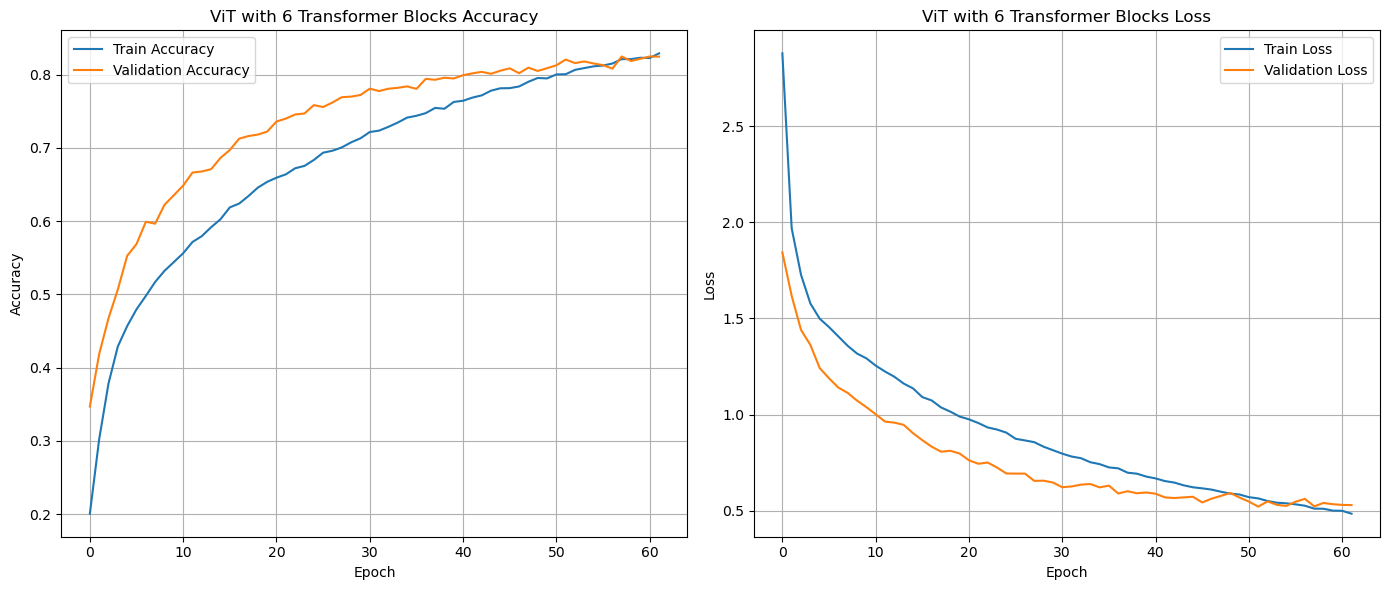

In [246]:
plot_loss_acc(history_df, "ViT with 6 Transformer Blocks", "task_8c_vit_en2_train_val.png")

### ✅ Conclusion

In this assignment, we explored two primary configurations of Vision Transformer (ViT) models on the CIFAR-10 dataset:

|                      | Baseline Run                                                 | Enhanced Run                                                 |
| -------------------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| **Architecture**     | **4** Transformer blocks                                     | **6** Transformer blocks                                     |
| **Regularization**   | **Dropout** 0.1 for Attention, **Dropout** 0.5 for Dense     | Custom **XLA-compatible** implementation of **`DropPath` (Stochastic Depth)** with linearly increasing drop probability up to `0.2` for Attention, **Maintained Dropout** 0.5 for Dense |
| **LR Scehdule**      | `ReduceLROnPlateau`                                          | Custom **XLA-compatible** implementation of **WarmUpCosineDecay**, paired with the **AdamW optimizer**. |
| **Accuracy**         | 82-83%                                                       | Low 80s%                                                     |
| **Avg Epoch Time**   | ~57s                                                         | ~78s                                                         |
| **Training Outcome** | Overfitting occurred after the LR dropped from 0.001 to 0.0005 | No overfitting happened, better generalization               |



**Summary:**

- **Changing Regularization** and using **WarmUpCosineDecay** has helped in **preventing overfitting**
- Despite increasing number of Transformer Blocks, there is **no improvement** in Accuracy or Loss
- **Performance bottleneck** due to the inherent difficulty or size of the **CIFAR-10 dataset** which:
  - Contains only 60,000 images (10 classes).
  - Is relatively small and lacks large-scale variability compared to ImageNet.
  - May not provide enough complexity for deeper transformers to outperform shallow ones significantly.


### 🧪 Future Work and Ideas

To further improve performance, several enhancements can be considered:

- **🧬 Advanced Data Augmentation:**
  - Apply **Mixup** or **CutMix**, which blend labels and images, improving generalization.
  - Use **RandAugment** or **AutoAugment** for richer image transformation pipelines.
- **🧠 Pretrained Backbone:**
  - Load pretrained weights from **DeiT (Data-efficient Image Transformer)** trained on ImageNet, then fine-tune on CIFAR-10.
  - This often leads to a **big performance boost** with faster convergence.
- **🏗️ Alternative Architectures:**
  - Try **Convolutional Vision Transformers (CvT)** which combine convolution with attention.
  - Explore **hybrid CNN-ViT** models or **MobileViT** for a balance of inductive bias and global attention.
- **📏 Patch Size & Positional Encoding:**
  - Experiment with smaller patch sizes (e.g., 8×8) for finer-grained feature extraction.
  - Try **relative positional encodings** instead of absolute.
- **🔍 Hyperparameter Tuning:**
  - Try smaller `projection_dim`, different `drop_path_rate` scaling, and wider `mlp_head_units`.
  - Tune warmup duration and cosine decay total steps.

## 📌 Task 9: Display model architecture and training progress

- Display the model architecture and training progress (take a screenshot of the progress for each epoch


##### Baseline Model

In [247]:
transformer_layers=4
obj = create_vit_classifier()
obj.summary()

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_45      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 72, 72, 3) │          7 │ input_layer_45[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches_23          │ (None, 144, 108)  │          0 │ data_augmentatio… │
│ (Patches)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder_23    │ (None, 144, 64)   │     16,192 │ patches_23[0][0]  │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ patch_encoder_23… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_196 (Add)       │ (None, 144, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder_23… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_196[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_291 (Dense)   │ (None, 144, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_377         │ (None, 144, 128)  │          0 │ dense_291[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_292 (Dense)   │ (None, 144, 64)   │      8,256 │ dropout_377[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_378         │ (None, 144, 64)   │          0 │ dense_292[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_197 (Add)       │ (None, 144, 64)   │          0 │ dropout_378[0][0… │
│                     │                   │            │ add_196[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_197[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_198 (Add)       │ (None, 144, 64)   │          0 │ multi_head_atten… │
│                     │                   │            │ add_197[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_198[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 21,333,969 (81.38 MB)

 Trainable params: 21,333,962 (81.38 MB)

 Non-trainable params: 7 (28.00 B)

```
Epoch 1/200
Epoch 1: 117.27 s | Total: 117.27 s | loss: 1.9737 accuracy: 0.3336 top_5: 0.8255 | acy: 0.2751 - loss: 2.5159 - top_5_accuracy: 0.7629  
val_loss: 1.4456 val_accuracy: 0.4824 val_top_5: 0.9240
352/352 ━━━━━━━━━━━━━━━━━━━━ 117s 283ms/step - accuracy: 0.2753 - loss: 2.5144 - top_5_accuracy: 0.7631 - val_accuracy: 0.4824 - val_loss: 1.4456 - val_top_5_accuracy: 0.9240 - learning_rate: 0.0010
Epoch 2/200
Epoch 2: 74.75 s | Total: 192.03 s | loss: 1.5135 accuracy: 0.4569 top_5: 0.9092 | racy: 0.4445 - loss: 1.5495 - top_5_accuracy: 0.9023 
val_loss: 1.2615 val_accuracy: 0.5628 val_top_5: 0.9454
352/352 ━━━━━━━━━━━━━━━━━━━━ 75s 158ms/step - accuracy: 0.4445 - loss: 1.5494 - top_5_accuracy: 0.9023 - val_accuracy: 0.5628 - val_loss: 1.2615 - val_top_5_accuracy: 0.9454 - learning_rate: 0.0010
Epoch 3/200
Epoch 3: 56.38 s | Total: 248.42 s | loss: 1.3868 accuracy: 0.5045 top_5: 0.9269 | racy: 0.5004 - loss: 1.3942 - top_5_accuracy: 0.9250 
val_loss: 1.1508 val_accuracy: 0.5956 val_top_5: 0.9580
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.5004 - loss: 1.3942 - top_5_accuracy: 0.9250 - val_accuracy: 0.5956 - val_loss: 1.1508 - val_top_5_accuracy: 0.9580 - learning_rate: 0.0010
Epoch 4/200
Epoch 4: 56.60 s | Total: 305.02 s | loss: 1.3143 accuracy: 0.5331 top_5: 0.9339 | racy: 0.5292 - loss: 1.3248 - top_5_accuracy: 0.9310 
val_loss: 1.0848 val_accuracy: 0.6200 val_top_5: 0.9632
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.5292 - loss: 1.3248 - top_5_accuracy: 0.9310 - val_accuracy: 0.6200 - val_loss: 1.0848 - val_top_5_accuracy: 0.9632 - learning_rate: 0.0010
Epoch 5/200
Epoch 5: 54.29 s | Total: 359.32 s | loss: 1.2456 accuracy: 0.5617 top_5: 0.9424 | racy: 0.5600 - loss: 1.2488 - top_5_accuracy: 0.9420 
val_loss: 1.0850 val_accuracy: 0.6100 val_top_5: 0.9648
352/352 ━━━━━━━━━━━━━━━━━━━━ 54s 154ms/step - accuracy: 0.5600 - loss: 1.2488 - top_5_accuracy: 0.9420 - val_accuracy: 0.6100 - val_loss: 1.0850 - val_top_5_accuracy: 0.9648 - learning_rate: 0.0010
Epoch 6/200
Epoch 6: 56.69 s | Total: 416.01 s | loss: 1.2051 accuracy: 0.5778 top_5: 0.9474 | racy: 0.5753 - loss: 1.2063 - top_5_accuracy: 0.9494 
val_loss: 0.9921 val_accuracy: 0.6504 val_top_5: 0.9730
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.5753 - loss: 1.2063 - top_5_accuracy: 0.9494 - val_accuracy: 0.6504 - val_loss: 0.9921 - val_top_5_accuracy: 0.9730 - learning_rate: 0.0010
Epoch 7/200
Epoch 7: 56.79 s | Total: 472.82 s | loss: 1.1639 accuracy: 0.5926 top_5: 0.9516 | racy: 0.5920 - loss: 1.1629 - top_5_accuracy: 0.9523 
val_loss: 0.9617 val_accuracy: 0.6652 val_top_5: 0.9744
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.5920 - loss: 1.1629 - top_5_accuracy: 0.9523 - val_accuracy: 0.6652 - val_loss: 0.9617 - val_top_5_accuracy: 0.9744 - learning_rate: 0.0010
Epoch 8/200
Epoch 8: 55.50 s | Total: 528.33 s | loss: 1.1210 accuracy: 0.6067 top_5: 0.9567 | racy: 0.6061 - loss: 1.1200 - top_5_accuracy: 0.9576 
val_loss: 0.9383 val_accuracy: 0.6786 val_top_5: 0.9706
352/352 ━━━━━━━━━━━━━━━━━━━━ 55s 158ms/step - accuracy: 0.6061 - loss: 1.1200 - top_5_accuracy: 0.9576 - val_accuracy: 0.6786 - val_loss: 0.9383 - val_top_5_accuracy: 0.9706 - learning_rate: 0.0010
Epoch 9/200
Epoch 9: 56.92 s | Total: 585.25 s | loss: 1.0903 accuracy: 0.6210 top_5: 0.9575 | racy: 0.6205 - loss: 1.0877 - top_5_accuracy: 0.9586 
val_loss: 0.8933 val_accuracy: 0.6818 val_top_5: 0.9760
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 162ms/step - accuracy: 0.6205 - loss: 1.0877 - top_5_accuracy: 0.9586 - val_accuracy: 0.6818 - val_loss: 0.8933 - val_top_5_accuracy: 0.9760 - learning_rate: 0.0010
Epoch 10/200
Epoch 10: 56.83 s | Total: 642.09 s | loss: 1.0639 accuracy: 0.6280 top_5: 0.9595 | acy: 0.6264 - loss: 1.0657 - top_5_accuracy: 0.9596 
val_loss: 0.9040 val_accuracy: 0.6866 val_top_5: 0.9776
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 162ms/step - accuracy: 0.6264 - loss: 1.0657 - top_5_accuracy: 0.9596 - val_accuracy: 0.6866 - val_loss: 0.9040 - val_top_5_accuracy: 0.9776 - learning_rate: 0.0010
Epoch 11/200
Epoch 11: 55.51 s | Total: 697.61 s | loss: 1.0282 accuracy: 0.6424 top_5: 0.9633 | acy: 0.6422 - loss: 1.0268 - top_5_accuracy: 0.9638 
val_loss: 0.8568 val_accuracy: 0.7060 val_top_5: 0.9776
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.6422 - loss: 1.0268 - top_5_accuracy: 0.9638 - val_accuracy: 0.7060 - val_loss: 0.8568 - val_top_5_accuracy: 0.9776 - learning_rate: 0.0010
Epoch 12/200
Epoch 12: 56.84 s | Total: 754.46 s | loss: 0.9927 accuracy: 0.6532 top_5: 0.9662 | acy: 0.6543 - loss: 0.9899 - top_5_accuracy: 0.9674 
val_loss: 0.8090 val_accuracy: 0.7204 val_top_5: 0.9802
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 162ms/step - accuracy: 0.6543 - loss: 0.9899 - top_5_accuracy: 0.9674 - val_accuracy: 0.7204 - val_loss: 0.8090 - val_top_5_accuracy: 0.9802 - learning_rate: 0.0010
Epoch 13/200
Epoch 13: 56.83 s | Total: 811.29 s | loss: 0.9583 accuracy: 0.6637 top_5: 0.9675 | acy: 0.6640 - loss: 0.9511 - top_5_accuracy: 0.9672 
val_loss: 0.7905 val_accuracy: 0.7296 val_top_5: 0.9818
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.6640 - loss: 0.9511 - top_5_accuracy: 0.9672 - val_accuracy: 0.7296 - val_loss: 0.7905 - val_top_5_accuracy: 0.9818 - learning_rate: 0.0010
Epoch 14/200
Epoch 14: 53.73 s | Total: 865.03 s | loss: 0.9318 accuracy: 0.6745 top_5: 0.9698 | acy: 0.6761 - loss: 0.9349 - top_5_accuracy: 0.9691 
val_loss: 0.8241 val_accuracy: 0.7046 val_top_5: 0.9814
352/352 ━━━━━━━━━━━━━━━━━━━━ 54s 153ms/step - accuracy: 0.6761 - loss: 0.9349 - top_5_accuracy: 0.9691 - val_accuracy: 0.7046 - val_loss: 0.8241 - val_top_5_accuracy: 0.9814 - learning_rate: 0.0010
Epoch 15/200
Epoch 15: 56.85 s | Total: 921.88 s | loss: 0.9013 accuracy: 0.6849 top_5: 0.9731 | acy: 0.6834 - loss: 0.9084 - top_5_accuracy: 0.9731 
val_loss: 0.7580 val_accuracy: 0.7344 val_top_5: 0.9836
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 162ms/step - accuracy: 0.6834 - loss: 0.9084 - top_5_accuracy: 0.9731 - val_accuracy: 0.7344 - val_loss: 0.7580 - val_top_5_accuracy: 0.9836 - learning_rate: 0.0010
Epoch 16/200
Epoch 16: 56.78 s | Total: 978.67 s | loss: 0.8745 accuracy: 0.6939 top_5: 0.9748 | acy: 0.6997 - loss: 0.8633 - top_5_accuracy: 0.9744 
val_loss: 0.7480 val_accuracy: 0.7396 val_top_5: 0.9786
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.6997 - loss: 0.8633 - top_5_accuracy: 0.9744 - val_accuracy: 0.7396 - val_loss: 0.7480 - val_top_5_accuracy: 0.9786 - learning_rate: 0.0010
Epoch 17/200
Epoch 17: 55.14 s | Total: 1033.82 s | loss: 0.8412 accuracy: 0.7037 top_5: 0.9767 | cy: 0.7029 - loss: 0.8396 - top_5_accuracy: 0.9759 
val_loss: 0.7330 val_accuracy: 0.7402 val_top_5: 0.9816
352/352 ━━━━━━━━━━━━━━━━━━━━ 55s 157ms/step - accuracy: 0.7029 - loss: 0.8396 - top_5_accuracy: 0.9759 - val_accuracy: 0.7402 - val_loss: 0.7330 - val_top_5_accuracy: 0.9816 - learning_rate: 0.0010
Epoch 18/200
Epoch 18: 56.37 s | Total: 1090.20 s | loss: 0.8219 accuracy: 0.7112 top_5: 0.9780 | cy: 0.7122 - loss: 0.8227 - top_5_accuracy: 0.9777 
val_loss: 0.6833 val_accuracy: 0.7594 val_top_5: 0.9866
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.7122 - loss: 0.8227 - top_5_accuracy: 0.9777 - val_accuracy: 0.7594 - val_loss: 0.6833 - val_top_5_accuracy: 0.9866 - learning_rate: 0.0010
Epoch 19/200
Epoch 19: 57.24 s | Total: 1147.45 s | loss: 0.8055 accuracy: 0.7200 top_5: 0.9788 | cy: 0.7212 - loss: 0.7962 - top_5_accuracy: 0.9791 
val_loss: 0.6736 val_accuracy: 0.7634 val_top_5: 0.9838
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step - accuracy: 0.7212 - loss: 0.7962 - top_5_accuracy: 0.9791 - val_accuracy: 0.7634 - val_loss: 0.6736 - val_top_5_accuracy: 0.9838 - learning_rate: 0.0010
Epoch 20/200
Epoch 20: 54.28 s | Total: 1201.74 s | loss: 0.7820 accuracy: 0.7277 top_5: 0.9789 | cy: 0.7224 - loss: 0.7886 - top_5_accuracy: 0.9785 
val_loss: 0.6876 val_accuracy: 0.7562 val_top_5: 0.9854
352/352 ━━━━━━━━━━━━━━━━━━━━ 54s 154ms/step - accuracy: 0.7224 - loss: 0.7886 - top_5_accuracy: 0.9785 - val_accuracy: 0.7562 - val_loss: 0.6876 - val_top_5_accuracy: 0.9854 - learning_rate: 0.0010
Epoch 21/200
Epoch 21: 56.33 s | Total: 1258.07 s | loss: 0.7648 accuracy: 0.7338 top_5: 0.9805 | cy: 0.7338 - loss: 0.7631 - top_5_accuracy: 0.9821 
val_loss: 0.6435 val_accuracy: 0.7732 val_top_5: 0.9880
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.7338 - loss: 0.7631 - top_5_accuracy: 0.9821 - val_accuracy: 0.7732 - val_loss: 0.6435 - val_top_5_accuracy: 0.9880 - learning_rate: 0.0010
Epoch 22/200
Epoch 22: 56.83 s | Total: 1314.91 s | loss: 0.7502 accuracy: 0.7385 top_5: 0.9821 | cy: 0.7434 - loss: 0.7431 - top_5_accuracy: 0.9814 
val_loss: 0.6398 val_accuracy: 0.7796 val_top_5: 0.9894
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.7434 - loss: 0.7431 - top_5_accuracy: 0.9814 - val_accuracy: 0.7796 - val_loss: 0.6398 - val_top_5_accuracy: 0.9894 - learning_rate: 0.0010
Epoch 23/200
Epoch 23: 54.33 s | Total: 1369.25 s | loss: 0.7312 accuracy: 0.7444 top_5: 0.9833 | cy: 0.7450 - loss: 0.7324 - top_5_accuracy: 0.9824 
val_loss: 0.6396 val_accuracy: 0.7780 val_top_5: 0.9896
352/352 ━━━━━━━━━━━━━━━━━━━━ 54s 154ms/step - accuracy: 0.7450 - loss: 0.7324 - top_5_accuracy: 0.9824 - val_accuracy: 0.7780 - val_loss: 0.6396 - val_top_5_accuracy: 0.9896 - learning_rate: 0.0010
Epoch 24/200
Epoch 24: 55.26 s | Total: 1424.52 s | loss: 0.7262 accuracy: 0.7483 top_5: 0.9831 | cy: 0.7501 - loss: 0.7160 - top_5_accuracy: 0.9852 
val_loss: 0.6424 val_accuracy: 0.7770 val_top_5: 0.9888
352/352 ━━━━━━━━━━━━━━━━━━━━ 55s 157ms/step - accuracy: 0.7501 - loss: 0.7161 - top_5_accuracy: 0.9852 - val_accuracy: 0.7770 - val_loss: 0.6424 - val_top_5_accuracy: 0.9888 - learning_rate: 0.0010
Epoch 25/200
Epoch 25: 56.75 s | Total: 1481.27 s | loss: 0.7056 accuracy: 0.7554 top_5: 0.9842 | cy: 0.7581 - loss: 0.6971 - top_5_accuracy: 0.9842 
val_loss: 0.6356 val_accuracy: 0.7866 val_top_5: 0.9880
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.7581 - loss: 0.6971 - top_5_accuracy: 0.9842 - val_accuracy: 0.7866 - val_loss: 0.6356 - val_top_5_accuracy: 0.9880 - learning_rate: 0.0010
Epoch 26/200
Epoch 26: 54.17 s | Total: 1535.45 s | loss: 0.6901 accuracy: 0.7605 top_5: 0.9855 | cy: 0.7599 - loss: 0.6916 - top_5_accuracy: 0.9858 
val_loss: 0.6281 val_accuracy: 0.7822 val_top_5: 0.9892
352/352 ━━━━━━━━━━━━━━━━━━━━ 54s 154ms/step - accuracy: 0.7599 - loss: 0.6916 - top_5_accuracy: 0.9858 - val_accuracy: 0.7822 - val_loss: 0.6281 - val_top_5_accuracy: 0.9892 - learning_rate: 0.0010
Epoch 27/200
Epoch 27: 56.40 s | Total: 1591.87 s | loss: 0.6793 accuracy: 0.7639 top_5: 0.9851 | cy: 0.7663 - loss: 0.6712 - top_5_accuracy: 0.9847 
val_loss: 0.6069 val_accuracy: 0.7892 val_top_5: 0.9910
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.7662 - loss: 0.6712 - top_5_accuracy: 0.9847 - val_accuracy: 0.7892 - val_loss: 0.6069 - val_top_5_accuracy: 0.9910 - learning_rate: 0.0010
Epoch 28/200
Epoch 28: 56.69 s | Total: 1648.57 s | loss: 0.6602 accuracy: 0.7692 top_5: 0.9856 | cy: 0.7693 - loss: 0.6588 - top_5_accuracy: 0.9857 
val_loss: 0.6185 val_accuracy: 0.7902 val_top_5: 0.9894
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.7693 - loss: 0.6588 - top_5_accuracy: 0.9857 - val_accuracy: 0.7902 - val_loss: 0.6185 - val_top_5_accuracy: 0.9894 - learning_rate: 0.0010
Epoch 29/200
Epoch 29: 54.80 s | Total: 1703.38 s | loss: 0.6496 accuracy: 0.7731 top_5: 0.9873 | cy: 0.7743 - loss: 0.6462 - top_5_accuracy: 0.9874 
val_loss: 0.5876 val_accuracy: 0.7960 val_top_5: 0.9918
352/352 ━━━━━━━━━━━━━━━━━━━━ 55s 156ms/step - accuracy: 0.7743 - loss: 0.6462 - top_5_accuracy: 0.9874 - val_accuracy: 0.7960 - val_loss: 0.5876 - val_top_5_accuracy: 0.9918 - learning_rate: 0.0010
Epoch 30/200
Epoch 30: 56.87 s | Total: 1760.26 s | loss: 0.6445 accuracy: 0.7748 top_5: 0.9876 | cy: 0.7777 - loss: 0.6365 - top_5_accuracy: 0.9888  
val_loss: 0.5736 val_accuracy: 0.7982 val_top_5: 0.9922
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 162ms/step - accuracy: 0.7777 - loss: 0.6365 - top_5_accuracy: 0.9888 - val_accuracy: 0.7982 - val_loss: 0.5736 - val_top_5_accuracy: 0.9922 - learning_rate: 0.0010
Epoch 31/200
Epoch 31: 56.59 s | Total: 1816.85 s | loss: 0.6350 accuracy: 0.7781 top_5: 0.9877 | cy: 0.7804 - loss: 0.6240 - top_5_accuracy: 0.9884 
val_loss: 0.5817 val_accuracy: 0.7992 val_top_5: 0.9912
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.7804 - loss: 0.6241 - top_5_accuracy: 0.9884 - val_accuracy: 0.7992 - val_loss: 0.5817 - val_top_5_accuracy: 0.9912 - learning_rate: 0.0010
Epoch 32/200
Epoch 32: 55.47 s | Total: 1872.33 s | loss: 0.6141 accuracy: 0.7869 top_5: 0.9883 | cy: 0.7895 - loss: 0.6066 - top_5_accuracy: 0.9890 
val_loss: 0.5700 val_accuracy: 0.8018 val_top_5: 0.9890
352/352 ━━━━━━━━━━━━━━━━━━━━ 55s 158ms/step - accuracy: 0.7895 - loss: 0.6066 - top_5_accuracy: 0.9890 - val_accuracy: 0.8018 - val_loss: 0.5700 - val_top_5_accuracy: 0.9890 - learning_rate: 0.0010
Epoch 33/200
Epoch 33: 56.62 s | Total: 1928.97 s | loss: 0.6103 accuracy: 0.7847 top_5: 0.9883 | cy: 0.7878 - loss: 0.5987 - top_5_accuracy: 0.9889  
val_loss: 0.5830 val_accuracy: 0.8022 val_top_5: 0.9902
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.7878 - loss: 0.5987 - top_5_accuracy: 0.9889 - val_accuracy: 0.8022 - val_loss: 0.5830 - val_top_5_accuracy: 0.9902 - learning_rate: 0.0010
Epoch 34/200
Epoch 34: 55.38 s | Total: 1984.36 s | loss: 0.5964 accuracy: 0.7904 top_5: 0.9894 | cy: 0.7882 - loss: 0.5962 - top_5_accuracy: 0.9888 
val_loss: 0.5862 val_accuracy: 0.7946 val_top_5: 0.9910
352/352 ━━━━━━━━━━━━━━━━━━━━ 55s 157ms/step - accuracy: 0.7882 - loss: 0.5962 - top_5_accuracy: 0.9888 - val_accuracy: 0.7946 - val_loss: 0.5862 - val_top_5_accuracy: 0.9910 - learning_rate: 0.0010
Epoch 35/200
Epoch 35: 55.51 s | Total: 2039.88 s | loss: 0.5841 accuracy: 0.7976 top_5: 0.9892 | cy: 0.7936 - loss: 0.5877 - top_5_accuracy: 0.9894 
val_loss: 0.5708 val_accuracy: 0.8062 val_top_5: 0.9910
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.7936 - loss: 0.5876 - top_5_accuracy: 0.9894 - val_accuracy: 0.8062 - val_loss: 0.5708 - val_top_5_accuracy: 0.9910 - learning_rate: 0.0010
Epoch 36/200
Epoch 36: 56.67 s | Total: 2096.56 s | loss: 0.5738 accuracy: 0.7998 top_5: 0.9902 | cy: 0.8016 - loss: 0.5666 - top_5_accuracy: 0.9904  
val_loss: 0.5479 val_accuracy: 0.8112 val_top_5: 0.9914
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.8016 - loss: 0.5666 - top_5_accuracy: 0.9904 - val_accuracy: 0.8112 - val_loss: 0.5479 - val_top_5_accuracy: 0.9914 - learning_rate: 0.0010
Epoch 37/200
Epoch 37: 55.39 s | Total: 2151.95 s | loss: 0.5618 accuracy: 0.8036 top_5: 0.9910 | cy: 0.8054 - loss: 0.5536 - top_5_accuracy: 0.9921 
val_loss: 0.5573 val_accuracy: 0.8056 val_top_5: 0.9922
352/352 ━━━━━━━━━━━━━━━━━━━━ 55s 157ms/step - accuracy: 0.8054 - loss: 0.5536 - top_5_accuracy: 0.9921 - val_accuracy: 0.8056 - val_loss: 0.5573 - val_top_5_accuracy: 0.9922 - learning_rate: 0.0010
Epoch 38/200
Epoch 38: 54.04 s | Total: 2206.00 s | loss: 0.5568 accuracy: 0.8067 top_5: 0.9906 | cy: 0.8079 - loss: 0.5580 - top_5_accuracy: 0.9900 
val_loss: 0.5563 val_accuracy: 0.8056 val_top_5: 0.9908
352/352 ━━━━━━━━━━━━━━━━━━━━ 54s 154ms/step - accuracy: 0.8079 - loss: 0.5580 - top_5_accuracy: 0.9900 - val_accuracy: 0.8056 - val_loss: 0.5563 - val_top_5_accuracy: 0.9908 - learning_rate: 0.0010
Epoch 39/200
Epoch 39: 56.55 s | Total: 2262.55 s | loss: 0.5416 accuracy: 0.8118 top_5: 0.9910 | cy: 0.8115 - loss: 0.5449 - top_5_accuracy: 0.9909  
val_loss: 0.5351 val_accuracy: 0.8174 val_top_5: 0.9920
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.8115 - loss: 0.5449 - top_5_accuracy: 0.9909 - val_accuracy: 0.8174 - val_loss: 0.5351 - val_top_5_accuracy: 0.9920 - learning_rate: 0.0010
Epoch 40/200
Epoch 40: 55.59 s | Total: 2318.15 s | loss: 0.5399 accuracy: 0.8101 top_5: 0.9916 | cy: 0.8150 - loss: 0.5228 - top_5_accuracy: 0.9924 
val_loss: 0.5663 val_accuracy: 0.8076 val_top_5: 0.9904
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.8150 - loss: 0.5228 - top_5_accuracy: 0.9924 - val_accuracy: 0.8076 - val_loss: 0.5663 - val_top_5_accuracy: 0.9904 - learning_rate: 0.0010
Epoch 41/200
Epoch 41: 54.09 s | Total: 2372.25 s | loss: 0.5301 accuracy: 0.8171 top_5: 0.9922 | cy: 0.8199 - loss: 0.5255 - top_5_accuracy: 0.9922 
val_loss: 0.5436 val_accuracy: 0.8078 val_top_5: 0.9924
352/352 ━━━━━━━━━━━━━━━━━━━━ 54s 154ms/step - accuracy: 0.8199 - loss: 0.5255 - top_5_accuracy: 0.9922 - val_accuracy: 0.8078 - val_loss: 0.5436 - val_top_5_accuracy: 0.9924 - learning_rate: 0.0010
Epoch 42/200
Epoch 42: 56.59 s | Total: 2428.84 s | loss: 0.5183 accuracy: 0.8195 top_5: 0.9924 | cy: 0.8240 - loss: 0.5044 - top_5_accuracy: 0.9928 
val_loss: 0.5427 val_accuracy: 0.8188 val_top_5: 0.9902
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.8240 - loss: 0.5044 - top_5_accuracy: 0.9928 - val_accuracy: 0.8188 - val_loss: 0.5427 - val_top_5_accuracy: 0.9902 - learning_rate: 0.0010
Epoch 43/200
Epoch 43: 55.54 s | Total: 2484.38 s | loss: 0.5147 accuracy: 0.8214 top_5: 0.9926 | cy: 0.8231 - loss: 0.5053 - top_5_accuracy: 0.9933 
val_loss: 0.5664 val_accuracy: 0.8118 val_top_5: 0.9920
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.8231 - loss: 0.5053 - top_5_accuracy: 0.9933 - val_accuracy: 0.8118 - val_loss: 0.5664 - val_top_5_accuracy: 0.9920 - learning_rate: 0.0010
Epoch 44/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.8240 - loss: 0.5013 - top_5_accuracy: 0.9941 
Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 44: 53.79 s | Total: 2538.19 s | loss: 0.5058 accuracy: 0.8222 top_5: 0.9938 | 
val_loss: 0.5575 val_accuracy: 0.8110 val_top_5: 0.9924
352/352 ━━━━━━━━━━━━━━━━━━━━ 54s 153ms/step - accuracy: 0.8240 - loss: 0.5013 - top_5_accuracy: 0.9941 - val_accuracy: 0.8110 - val_loss: 0.5575 - val_top_5_accuracy: 0.9924 - learning_rate: 0.0010
Epoch 45/200
Epoch 45: 72.80 s | Total: 2611.00 s | loss: 0.4481 accuracy: 0.8412 top_5: 0.9944 | cy: 0.8361 - loss: 0.4643 - top_5_accuracy: 0.9932 
val_loss: 0.5288 val_accuracy: 0.8238 val_top_5: 0.9930
352/352 ━━━━━━━━━━━━━━━━━━━━ 73s 156ms/step - accuracy: 0.8361 - loss: 0.4642 - top_5_accuracy: 0.9932 - val_accuracy: 0.8238 - val_loss: 0.5288 - val_top_5_accuracy: 0.9930 - learning_rate: 5.0000e-04
Epoch 46/200
Epoch 46: 56.87 s | Total: 2667.87 s | loss: 0.4193 accuracy: 0.8526 top_5: 0.9958 | cy: 0.8542 - loss: 0.4184 - top_5_accuracy: 0.9958  
val_loss: 0.5305 val_accuracy: 0.8244 val_top_5: 0.9926
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 162ms/step - accuracy: 0.8542 - loss: 0.4184 - top_5_accuracy: 0.9958 - val_accuracy: 0.8244 - val_loss: 0.5305 - val_top_5_accuracy: 0.9926 - learning_rate: 5.0000e-04
Epoch 47/200
Epoch 47: 56.62 s | Total: 2724.50 s | loss: 0.4115 accuracy: 0.8560 top_5: 0.9956 | cy: 0.8581 - loss: 0.4055 - top_5_accuracy: 0.9957 
val_loss: 0.5214 val_accuracy: 0.8290 val_top_5: 0.9930
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.8581 - loss: 0.4055 - top_5_accuracy: 0.9957 - val_accuracy: 0.8290 - val_loss: 0.5214 - val_top_5_accuracy: 0.9930 - learning_rate: 5.0000e-04
Epoch 48/200
Epoch 48: 56.06 s | Total: 2780.57 s | loss: 0.4116 accuracy: 0.8555 top_5: 0.9955 | cy: 0.8566 - loss: 0.4108 - top_5_accuracy: 0.9952 
val_loss: 0.5204 val_accuracy: 0.8250 val_top_5: 0.9938
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 159ms/step - accuracy: 0.8566 - loss: 0.4108 - top_5_accuracy: 0.9952 - val_accuracy: 0.8250 - val_loss: 0.5204 - val_top_5_accuracy: 0.9938 - learning_rate: 5.0000e-04
Epoch 49/200
Epoch 49: 54.65 s | Total: 2835.22 s | loss: 0.3957 accuracy: 0.8612 top_5: 0.9961 | cy: 0.8626 - loss: 0.3904 - top_5_accuracy: 0.9960 
val_loss: 0.5300 val_accuracy: 0.8278 val_top_5: 0.9900
352/352 ━━━━━━━━━━━━━━━━━━━━ 55s 155ms/step - accuracy: 0.8626 - loss: 0.3904 - top_5_accuracy: 0.9960 - val_accuracy: 0.8278 - val_loss: 0.5300 - val_top_5_accuracy: 0.9900 - learning_rate: 5.0000e-04
Epoch 50/200
Epoch 50: 53.90 s | Total: 2889.12 s | loss: 0.3879 accuracy: 0.8627 top_5: 0.9958 | cy: 0.8630 - loss: 0.3897 - top_5_accuracy: 0.9957 
val_loss: 0.5228 val_accuracy: 0.8288 val_top_5: 0.9926
352/352 ━━━━━━━━━━━━━━━━━━━━ 54s 153ms/step - accuracy: 0.8630 - loss: 0.3897 - top_5_accuracy: 0.9957 - val_accuracy: 0.8288 - val_loss: 0.5228 - val_top_5_accuracy: 0.9926 - learning_rate: 5.0000e-04
Epoch 51/200
Epoch 51: 55.61 s | Total: 2944.74 s | loss: 0.3796 accuracy: 0.8676 top_5: 0.9962 | cy: 0.8701 - loss: 0.3674 - top_5_accuracy: 0.9965 
val_loss: 0.5238 val_accuracy: 0.8290 val_top_5: 0.9912
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.8701 - loss: 0.3674 - top_5_accuracy: 0.9965 - val_accuracy: 0.8290 - val_loss: 0.5238 - val_top_5_accuracy: 0.9912 - learning_rate: 5.0000e-04
Epoch 52/200
Epoch 52: 55.51 s | Total: 3000.26 s | loss: 0.3719 accuracy: 0.8683 top_5: 0.9963 | cy: 0.8709 - loss: 0.3635 - top_5_accuracy: 0.9965 
val_loss: 0.5173 val_accuracy: 0.8282 val_top_5: 0.9928
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.8709 - loss: 0.3635 - top_5_accuracy: 0.9965 - val_accuracy: 0.8282 - val_loss: 0.5173 - val_top_5_accuracy: 0.9928 - learning_rate: 5.0000e-04
Epoch 53/200
Epoch 53: 55.54 s | Total: 3055.81 s | loss: 0.3688 accuracy: 0.8693 top_5: 0.9963 | cy: 0.8703 - loss: 0.3645 - top_5_accuracy: 0.9967 
val_loss: 0.5282 val_accuracy: 0.8304 val_top_5: 0.9924
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.8703 - loss: 0.3645 - top_5_accuracy: 0.9967 - val_accuracy: 0.8304 - val_loss: 0.5282 - val_top_5_accuracy: 0.9924 - learning_rate: 5.0000e-04
Epoch 54/200
Epoch 54: 56.55 s | Total: 3112.36 s | loss: 0.3589 accuracy: 0.8745 top_5: 0.9968 | cy: 0.8741 - loss: 0.3625 - top_5_accuracy: 0.9966 
val_loss: 0.5284 val_accuracy: 0.8318 val_top_5: 0.9914
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.8741 - loss: 0.3625 - top_5_accuracy: 0.9966 - val_accuracy: 0.8318 - val_loss: 0.5284 - val_top_5_accuracy: 0.9914 - learning_rate: 5.0000e-04
Epoch 55/200
Epoch 55: 55.46 s | Total: 3167.83 s | loss: 0.3578 accuracy: 0.8739 top_5: 0.9966 | cy: 0.8752 - loss: 0.3546 - top_5_accuracy: 0.9967 
val_loss: 0.5317 val_accuracy: 0.8270 val_top_5: 0.9904
352/352 ━━━━━━━━━━━━━━━━━━━━ 55s 158ms/step - accuracy: 0.8752 - loss: 0.3546 - top_5_accuracy: 0.9967 - val_accuracy: 0.8270 - val_loss: 0.5317 - val_top_5_accuracy: 0.9904 - learning_rate: 5.0000e-04
Epoch 56/200
Epoch 56: 54.34 s | Total: 3222.18 s | loss: 0.3523 accuracy: 0.8736 top_5: 0.9971 | cy: 0.8754 - loss: 0.3447 - top_5_accuracy: 0.9973 
val_loss: 0.5286 val_accuracy: 0.8310 val_top_5: 0.9916
352/352 ━━━━━━━━━━━━━━━━━━━━ 54s 154ms/step - accuracy: 0.8754 - loss: 0.3447 - top_5_accuracy: 0.9973 - val_accuracy: 0.8310 - val_loss: 0.5286 - val_top_5_accuracy: 0.9916 - learning_rate: 5.0000e-04
Epoch 57/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.8770 - loss: 0.3463 - top_5_accuracy: 0.9972 
Epoch 57: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 57: 56.41 s | Total: 3278.60 s | loss: 0.3474 accuracy: 0.8764 top_5: 0.9971 | 
val_loss: 0.5223 val_accuracy: 0.8324 val_top_5: 0.9934
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.8770 - loss: 0.3463 - top_5_accuracy: 0.9972 - val_accuracy: 0.8324 - val_loss: 0.5223 - val_top_5_accuracy: 0.9934 - learning_rate: 5.0000e-04
Epoch 58/200
Epoch 58: 56.74 s | Total: 3335.34 s | loss: 0.3215 accuracy: 0.8857 top_5: 0.9976 | cy: 0.8817 - loss: 0.3300 - top_5_accuracy: 0.9972 
val_loss: 0.5079 val_accuracy: 0.8360 val_top_5: 0.9914
352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.8817 - loss: 0.3300 - top_5_accuracy: 0.9972 - val_accuracy: 0.8360 - val_loss: 0.5079 - val_top_5_accuracy: 0.9914 - learning_rate: 2.5000e-04
Epoch 59/200
Epoch 59: 55.50 s | Total: 3390.84 s | loss: 0.3029 accuracy: 0.8923 top_5: 0.9978 | cy: 0.8918 - loss: 0.3062 - top_5_accuracy: 0.9978 
val_loss: 0.5121 val_accuracy: 0.8428 val_top_5: 0.9928
352/352 ━━━━━━━━━━━━━━━━━━━━ 55s 158ms/step - accuracy: 0.8918 - loss: 0.3062 - top_5_accuracy: 0.9978 - val_accuracy: 0.8428 - val_loss: 0.5121 - val_top_5_accuracy: 0.9928 - learning_rate: 2.5000e-04
Epoch 60/200
Epoch 60: 55.33 s | Total: 3446.18 s | loss: 0.3035 accuracy: 0.8943 top_5: 0.9976 | cy: 0.8930 - loss: 0.3047 - top_5_accuracy: 0.9974  
val_loss: 0.5139 val_accuracy: 0.8336 val_top_5: 0.9936
352/352 ━━━━━━━━━━━━━━━━━━━━ 55s 157ms/step - accuracy: 0.8931 - loss: 0.3047 - top_5_accuracy: 0.9974 - val_accuracy: 0.8336 - val_loss: 0.5139 - val_top_5_accuracy: 0.9936 - learning_rate: 2.5000e-04
Epoch 61/200
Epoch 61: 55.69 s | Total: 3501.88 s | loss: 0.2933 accuracy: 0.8969 top_5: 0.9981 | cy: 0.8975 - loss: 0.2920 - top_5_accuracy: 0.9980 
val_loss: 0.5247 val_accuracy: 0.8386 val_top_5: 0.9930
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.8975 - loss: 0.2920 - top_5_accuracy: 0.9980 - val_accuracy: 0.8386 - val_loss: 0.5247 - val_top_5_accuracy: 0.9930 - learning_rate: 2.5000e-04
Epoch 62/200
Epoch 62: 53.91 s | Total: 3555.80 s | loss: 0.2894 accuracy: 0.8968 top_5: 0.9985 | cy: 0.9013 - loss: 0.2791 - top_5_accuracy: 0.9984 
val_loss: 0.5232 val_accuracy: 0.8368 val_top_5: 0.9930
352/352 ━━━━━━━━━━━━━━━━━━━━ 54s 153ms/step - accuracy: 0.9013 - loss: 0.2791 - top_5_accuracy: 0.9984 - val_accuracy: 0.8368 - val_loss: 0.5232 - val_top_5_accuracy: 0.9930 - learning_rate: 2.5000e-04
Epoch 63/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.8946 - loss: 0.2993 - top_5_accuracy: 0.9979 
Epoch 63: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 63: 55.57 s | Total: 3611.38 s | loss: 0.2903 accuracy: 0.8973 top_5: 0.9979 | 
val_loss: 0.5339 val_accuracy: 0.8356 val_top_5: 0.9924
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.8946 - loss: 0.2993 - top_5_accuracy: 0.9979 - val_accuracy: 0.8356 - val_loss: 0.5339 - val_top_5_accuracy: 0.9924 - learning_rate: 2.5000e-04
Epoch 64/200
Epoch 64: 55.68 s | Total: 3667.06 s | loss: 0.2748 accuracy: 0.9042 top_5: 0.9983 | cy: 0.9016 - loss: 0.2835 - top_5_accuracy: 0.9981 
val_loss: 0.5218 val_accuracy: 0.8370 val_top_5: 0.9924
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.9016 - loss: 0.2834 - top_5_accuracy: 0.9981 - val_accuracy: 0.8370 - val_loss: 0.5218 - val_top_5_accuracy: 0.9924 - learning_rate: 1.2500e-04
Epoch 65/200
Epoch 65: 54.18 s | Total: 3721.25 s | loss: 0.2711 accuracy: 0.9033 top_5: 0.9982 | cy: 0.9032 - loss: 0.2703 - top_5_accuracy: 0.9983 
val_loss: 0.5326 val_accuracy: 0.8360 val_top_5: 0.9926
352/352 ━━━━━━━━━━━━━━━━━━━━ 54s 154ms/step - accuracy: 0.9032 - loss: 0.2703 - top_5_accuracy: 0.9983 - val_accuracy: 0.8360 - val_loss: 0.5326 - val_top_5_accuracy: 0.9926 - learning_rate: 1.2500e-04
Epoch 66/200
Epoch 66: 55.44 s | Total: 3776.70 s | loss: 0.2652 accuracy: 0.9061 top_5: 0.9982 | cy: 0.9061 - loss: 0.2663 - top_5_accuracy: 0.9982 
val_loss: 0.5360 val_accuracy: 0.8378 val_top_5: 0.9930
352/352 ━━━━━━━━━━━━━━━━━━━━ 55s 158ms/step - accuracy: 0.9061 - loss: 0.2663 - top_5_accuracy: 0.9982 - val_accuracy: 0.8378 - val_loss: 0.5360 - val_top_5_accuracy: 0.9930 - learning_rate: 1.2500e-04
Epoch 67/200
Epoch 67: 54.17 s | Total: 3830.88 s | loss: 0.2612 accuracy: 0.9090 top_5: 0.9983 | cy: 0.9085 - loss: 0.2618 - top_5_accuracy: 0.9981 
val_loss: 0.5213 val_accuracy: 0.8402 val_top_5: 0.9936
352/352 ━━━━━━━━━━━━━━━━━━━━ 54s 154ms/step - accuracy: 0.9085 - loss: 0.2618 - top_5_accuracy: 0.9981 - val_accuracy: 0.8402 - val_loss: 0.5213 - val_top_5_accuracy: 0.9936 - learning_rate: 1.2500e-04
Epoch 68/200
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.9115 - loss: 0.2478 - top_5_accuracy: 0.9989  
Epoch 68: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 68: 55.55 s | Total: 3886.44 s | loss: 0.2583 accuracy: 0.9078 top_5: 0.9988 | 
val_loss: 0.5285 val_accuracy: 0.8364 val_top_5: 0.9932
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.9115 - loss: 0.2479 - top_5_accuracy: 0.9989 - val_accuracy: 0.8364 - val_loss: 0.5285 - val_top_5_accuracy: 0.9932 - learning_rate: 1.2500e-04
Epoch 68: early stopping
Restoring model weights from the end of the best epoch: 58.

✅ Training Complete
Epochs trained       : 68
Total training time  : 3886.46 s
Avg epoch time       : 57.15 s
Final Train loss     : 0.2583
Final Train accuracy : 0.9078
Final Train top-5 acc: 0.9988
Final Val loss       : 0.5285
Final Val accuracy   : 0.8364
Final Val top-5 acc  : 0.9932
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8298 - loss: 0.5590 - top_5_accuracy: 0.9904
Test accuracy: 82.83%
Test top 5 accuracy: 99.1%
```

##### Enhanced Model

In [248]:
transformer_layers=6
obj = create_vit_classifier_en2()
obj.summary()

Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_46      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ data_augmentation   │ (None, 72, 72, 3) │          7 │ input_layer_46[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches_24          │ (None, 144, 108)  │          0 │ data_augmentatio… │
│ (Patches)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder_24    │ (None, 144, 64)   │     16,192 │ patches_24[0][0]  │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ patch_encoder_24… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ drop_path_32        │ (None, 144, 64)   │          0 │ multi_head_atten… │
│ (DropPath)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_204 (Add)       │ (None, 144, 64)   │          0 │ drop_path_32[0][… │
│                     │                   │            │ patch_encoder_24… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_204[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_303 (Dense)   │ (None, 144, 128)  │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_392         │ (None, 144, 128)  │          0 │ dense_303[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_304 (Dense)   │ (None, 144, 64)   │      8,256 │ dropout_392[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_393         │ (None, 144, 64)   │          0 │ dense_304[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ drop_path_33        │ (None, 144, 64)   │          0 │ dropout_393[0][0] │
│ (DropPath)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_205 (Add)       │ (None, 144, 64)   │          0 │ drop_path_33[0][… │
│                     │                   │            │ add_204[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 144, 64)   │        128 │ add_205[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 144, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 21,500,369 (82.02 MB)

 Trainable params: 21,500,362 (82.02 MB)

 Non-trainable params: 7 (28.00 B)

```
Epoch 1/120
Epoch 1: 233.16 s | Total: 233.17 s | loss: 2.8792 accuracy: 0.2008 top_5: 0.6796 | acy: 0.1584 - loss: 3.6111 - top_5_accuracy: 0.6063  
val_loss: 1.8437 val_accuracy: 0.3470 val_top_5: 0.8352
352/352 ━━━━━━━━━━━━━━━━━━━━ 233s 497ms/step - accuracy: 0.1586 - loss: 3.6090 - top_5_accuracy: 0.6065 - val_accuracy: 0.3470 - val_loss: 1.8437 - val_top_5_accuracy: 0.8352
Epoch 2/120
Epoch 2: 102.34 s | Total: 335.52 s | loss: 1.9688 accuracy: 0.3026 top_5: 0.8087 | acy: 0.2796 - loss: 2.0388 - top_5_accuracy: 0.7912  
val_loss: 1.6171 val_accuracy: 0.4188 val_top_5: 0.8894
352/352 ━━━━━━━━━━━━━━━━━━━━ 102s 222ms/step - accuracy: 0.2797 - loss: 2.0386 - top_5_accuracy: 0.7913 - val_accuracy: 0.4188 - val_loss: 1.6171 - val_top_5_accuracy: 0.8894
Epoch 3/120
Epoch 3: 77.51 s | Total: 413.04 s | loss: 1.7270 accuracy: 0.3786 top_5: 0.8668 | racy: 0.3637 - loss: 1.7770 - top_5_accuracy: 0.8548  
val_loss: 1.4405 val_accuracy: 0.4676 val_top_5: 0.9240
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 220ms/step - accuracy: 0.3637 - loss: 1.7769 - top_5_accuracy: 0.8549 - val_accuracy: 0.4676 - val_loss: 1.4405 - val_top_5_accuracy: 0.9240
Epoch 4/120
Epoch 4: 80.05 s | Total: 493.09 s | loss: 1.5783 accuracy: 0.4291 top_5: 0.8984 | racy: 0.4166 - loss: 1.6034 - top_5_accuracy: 0.8948  
val_loss: 1.3625 val_accuracy: 0.5068 val_top_5: 0.9312
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 227ms/step - accuracy: 0.4166 - loss: 1.6033 - top_5_accuracy: 0.8948 - val_accuracy: 0.5068 - val_loss: 1.3625 - val_top_5_accuracy: 0.9312
Epoch 5/120
Epoch 5: 77.73 s | Total: 570.83 s | loss: 1.4989 accuracy: 0.4568 top_5: 0.9130 | racy: 0.4505 - loss: 1.5121 - top_5_accuracy: 0.9117  
val_loss: 1.2422 val_accuracy: 0.5528 val_top_5: 0.9530
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.4505 - loss: 1.5121 - top_5_accuracy: 0.9117 - val_accuracy: 0.5528 - val_loss: 1.2422 - val_top_5_accuracy: 0.9530
Epoch 6/120
Epoch 6: 77.79 s | Total: 648.63 s | loss: 1.4552 accuracy: 0.4798 top_5: 0.9180 | racy: 0.4758 - loss: 1.4616 - top_5_accuracy: 0.9188  
val_loss: 1.1887 val_accuracy: 0.5688 val_top_5: 0.9568
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.4758 - loss: 1.4616 - top_5_accuracy: 0.9188 - val_accuracy: 0.5688 - val_loss: 1.1887 - val_top_5_accuracy: 0.9568
Epoch 7/120
Epoch 7: 77.84 s | Total: 726.48 s | loss: 1.4065 accuracy: 0.4980 top_5: 0.9240 | racy: 0.4962 - loss: 1.4105 - top_5_accuracy: 0.9236  
val_loss: 1.1405 val_accuracy: 0.5992 val_top_5: 0.9582
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.4962 - loss: 1.4105 - top_5_accuracy: 0.9236 - val_accuracy: 0.5992 - val_loss: 1.1405 - val_top_5_accuracy: 0.9582
Epoch 8/120
Epoch 8: 78.98 s | Total: 805.48 s | loss: 1.3578 accuracy: 0.5171 top_5: 0.9314 | racy: 0.5180 - loss: 1.3539 - top_5_accuracy: 0.9316  
val_loss: 1.1129 val_accuracy: 0.5966 val_top_5: 0.9560
352/352 ━━━━━━━━━━━━━━━━━━━━ 79s 224ms/step - accuracy: 0.5180 - loss: 1.3539 - top_5_accuracy: 0.9316 - val_accuracy: 0.5966 - val_loss: 1.1129 - val_top_5_accuracy: 0.9560
Epoch 9/120
Epoch 9: 77.47 s | Total: 882.95 s | loss: 1.3175 accuracy: 0.5322 top_5: 0.9335 | racy: 0.5250 - loss: 1.3319 - top_5_accuracy: 0.9317  
val_loss: 1.0728 val_accuracy: 0.6224 val_top_5: 0.9614
352/352 ━━━━━━━━━━━━━━━━━━━━ 77s 220ms/step - accuracy: 0.5250 - loss: 1.3319 - top_5_accuracy: 0.9317 - val_accuracy: 0.6224 - val_loss: 1.0728 - val_top_5_accuracy: 0.9614
Epoch 10/120
Epoch 10: 77.59 s | Total: 960.55 s | loss: 1.2927 accuracy: 0.5442 top_5: 0.9346 | acy: 0.5471 - loss: 1.2854 - top_5_accuracy: 0.9366  
val_loss: 1.0389 val_accuracy: 0.6354 val_top_5: 0.9672
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.5471 - loss: 1.2854 - top_5_accuracy: 0.9366 - val_accuracy: 0.6354 - val_loss: 1.0389 - val_top_5_accuracy: 0.9672
Epoch 11/120
Epoch 11: 78.27 s | Total: 1038.83 s | loss: 1.2548 accuracy: 0.5562 top_5: 0.9414 | cy: 0.5577 - loss: 1.2466 - top_5_accuracy: 0.9409  
val_loss: 1.0018 val_accuracy: 0.6486 val_top_5: 0.9716
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.5577 - loss: 1.2467 - top_5_accuracy: 0.9409 - val_accuracy: 0.6486 - val_loss: 1.0018 - val_top_5_accuracy: 0.9716
Epoch 12/120
Epoch 12: 80.16 s | Total: 1119.00 s | loss: 1.2241 accuracy: 0.5716 top_5: 0.9432 | cy: 0.5677 - loss: 1.2324 - top_5_accuracy: 0.9431  
val_loss: 0.9636 val_accuracy: 0.6664 val_top_5: 0.9724
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 228ms/step - accuracy: 0.5677 - loss: 1.2324 - top_5_accuracy: 0.9432 - val_accuracy: 0.6664 - val_loss: 0.9636 - val_top_5_accuracy: 0.9724
Epoch 13/120
Epoch 13: 77.90 s | Total: 1196.90 s | loss: 1.1969 accuracy: 0.5796 top_5: 0.9470 | cy: 0.5793 - loss: 1.2033 - top_5_accuracy: 0.9466  
val_loss: 0.9580 val_accuracy: 0.6678 val_top_5: 0.9764
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.5793 - loss: 1.2033 - top_5_accuracy: 0.9466 - val_accuracy: 0.6678 - val_loss: 0.9580 - val_top_5_accuracy: 0.9764
Epoch 14/120
Epoch 14: 77.77 s | Total: 1274.68 s | loss: 1.1615 accuracy: 0.5918 top_5: 0.9485 | cy: 0.5921 - loss: 1.1600 - top_5_accuracy: 0.9498  
val_loss: 0.9467 val_accuracy: 0.6710 val_top_5: 0.9718
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.5921 - loss: 1.1600 - top_5_accuracy: 0.9498 - val_accuracy: 0.6710 - val_loss: 0.9467 - val_top_5_accuracy: 0.9718
Epoch 15/120
Epoch 15: 79.96 s | Total: 1354.64 s | loss: 1.1363 accuracy: 0.6026 top_5: 0.9492 | cy: 0.5983 - loss: 1.1440 - top_5_accuracy: 0.9487  
val_loss: 0.9033 val_accuracy: 0.6864 val_top_5: 0.9786
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 227ms/step - accuracy: 0.5983 - loss: 1.1439 - top_5_accuracy: 0.9487 - val_accuracy: 0.6864 - val_loss: 0.9033 - val_top_5_accuracy: 0.9786
Epoch 16/120
Epoch 16: 77.33 s | Total: 1431.98 s | loss: 1.0909 accuracy: 0.6188 top_5: 0.9546 | cy: 0.6199 - loss: 1.0882 - top_5_accuracy: 0.9570  
val_loss: 0.8669 val_accuracy: 0.6972 val_top_5: 0.9746
352/352 ━━━━━━━━━━━━━━━━━━━━ 77s 220ms/step - accuracy: 0.6199 - loss: 1.0882 - top_5_accuracy: 0.9570 - val_accuracy: 0.6972 - val_loss: 0.8669 - val_top_5_accuracy: 0.9746
Epoch 17/120
Epoch 17: 77.22 s | Total: 1509.21 s | loss: 1.0736 accuracy: 0.6240 top_5: 0.9569 | cy: 0.6274 - loss: 1.0637 - top_5_accuracy: 0.9564  
val_loss: 0.8331 val_accuracy: 0.7126 val_top_5: 0.9824
352/352 ━━━━━━━━━━━━━━━━━━━━ 77s 219ms/step - accuracy: 0.6274 - loss: 1.0637 - top_5_accuracy: 0.9564 - val_accuracy: 0.7126 - val_loss: 0.8331 - val_top_5_accuracy: 0.9824
Epoch 18/120
Epoch 18: 77.91 s | Total: 1587.13 s | loss: 1.0373 accuracy: 0.6343 top_5: 0.9602 | cy: 0.6326 - loss: 1.0403 - top_5_accuracy: 0.9597  
val_loss: 0.8069 val_accuracy: 0.7162 val_top_5: 0.9832
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.6326 - loss: 1.0403 - top_5_accuracy: 0.9597 - val_accuracy: 0.7162 - val_loss: 0.8069 - val_top_5_accuracy: 0.9832
Epoch 19/120
Epoch 19: 79.94 s | Total: 1667.08 s | loss: 1.0154 accuracy: 0.6458 top_5: 0.9615 | cy: 0.6449 - loss: 1.0139 - top_5_accuracy: 0.9605  
val_loss: 0.8117 val_accuracy: 0.7182 val_top_5: 0.9806
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 227ms/step - accuracy: 0.6449 - loss: 1.0139 - top_5_accuracy: 0.9605 - val_accuracy: 0.7182 - val_loss: 0.8117 - val_top_5_accuracy: 0.9806
Epoch 20/120
Epoch 20: 77.59 s | Total: 1744.68 s | loss: 0.9897 accuracy: 0.6536 top_5: 0.9631 | cy: 0.6505 - loss: 0.9976 - top_5_accuracy: 0.9634  
val_loss: 0.7975 val_accuracy: 0.7222 val_top_5: 0.9822
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 220ms/step - accuracy: 0.6505 - loss: 0.9976 - top_5_accuracy: 0.9634 - val_accuracy: 0.7222 - val_loss: 0.7975 - val_top_5_accuracy: 0.9822
Epoch 21/120
Epoch 21: 78.06 s | Total: 1822.75 s | loss: 0.9753 accuracy: 0.6594 top_5: 0.9652 | cy: 0.6634 - loss: 0.9588 - top_5_accuracy: 0.9665  
val_loss: 0.7621 val_accuracy: 0.7360 val_top_5: 0.9834
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.6634 - loss: 0.9589 - top_5_accuracy: 0.9665 - val_accuracy: 0.7360 - val_loss: 0.7621 - val_top_5_accuracy: 0.9834
Epoch 22/120
Epoch 22: 78.13 s | Total: 1900.89 s | loss: 0.9560 accuracy: 0.6639 top_5: 0.9665 | cy: 0.6653 - loss: 0.9475 - top_5_accuracy: 0.9663  
val_loss: 0.7442 val_accuracy: 0.7400 val_top_5: 0.9836
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.6653 - loss: 0.9476 - top_5_accuracy: 0.9663 - val_accuracy: 0.7400 - val_loss: 0.7442 - val_top_5_accuracy: 0.9836
Epoch 23/120
Epoch 23: 80.05 s | Total: 1980.94 s | loss: 0.9331 accuracy: 0.6722 top_5: 0.9671 | cy: 0.6721 - loss: 0.9378 - top_5_accuracy: 0.9657  
val_loss: 0.7506 val_accuracy: 0.7456 val_top_5: 0.9828
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 227ms/step - accuracy: 0.6721 - loss: 0.9377 - top_5_accuracy: 0.9657 - val_accuracy: 0.7456 - val_loss: 0.7506 - val_top_5_accuracy: 0.9828
Epoch 24/120
Epoch 24: 77.99 s | Total: 2058.93 s | loss: 0.9222 accuracy: 0.6755 top_5: 0.9690 | cy: 0.6782 - loss: 0.9110 - top_5_accuracy: 0.9703  
val_loss: 0.7247 val_accuracy: 0.7470 val_top_5: 0.9840
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.6782 - loss: 0.9110 - top_5_accuracy: 0.9703 - val_accuracy: 0.7470 - val_loss: 0.7247 - val_top_5_accuracy: 0.9840
Epoch 25/120
Epoch 25: 78.00 s | Total: 2136.94 s | loss: 0.9062 accuracy: 0.6835 top_5: 0.9708 | cy: 0.6855 - loss: 0.9021 - top_5_accuracy: 0.9702  
val_loss: 0.6936 val_accuracy: 0.7584 val_top_5: 0.9860
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.6855 - loss: 0.9021 - top_5_accuracy: 0.9702 - val_accuracy: 0.7584 - val_loss: 0.6936 - val_top_5_accuracy: 0.9860
Epoch 26/120
Epoch 26: 76.59 s | Total: 2213.54 s | loss: 0.8740 accuracy: 0.6935 top_5: 0.9735 | cy: 0.6967 - loss: 0.8576 - top_5_accuracy: 0.9751  
val_loss: 0.6929 val_accuracy: 0.7558 val_top_5: 0.9874
352/352 ━━━━━━━━━━━━━━━━━━━━ 77s 218ms/step - accuracy: 0.6967 - loss: 0.8577 - top_5_accuracy: 0.9751 - val_accuracy: 0.7558 - val_loss: 0.6929 - val_top_5_accuracy: 0.9874
Epoch 27/120
Epoch 27: 80.18 s | Total: 2293.73 s | loss: 0.8655 accuracy: 0.6962 top_5: 0.9727 | cy: 0.7029 - loss: 0.8498 - top_5_accuracy: 0.9738  
val_loss: 0.6929 val_accuracy: 0.7620 val_top_5: 0.9854
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 228ms/step - accuracy: 0.7029 - loss: 0.8499 - top_5_accuracy: 0.9738 - val_accuracy: 0.7620 - val_loss: 0.6929 - val_top_5_accuracy: 0.9854
Epoch 28/120
Epoch 28: 77.60 s | Total: 2371.34 s | loss: 0.8564 accuracy: 0.7007 top_5: 0.9732 | cy: 0.7002 - loss: 0.8552 - top_5_accuracy: 0.9735  
val_loss: 0.6551 val_accuracy: 0.7692 val_top_5: 0.9874
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.7002 - loss: 0.8552 - top_5_accuracy: 0.9735 - val_accuracy: 0.7692 - val_loss: 0.6551 - val_top_5_accuracy: 0.9874
Epoch 29/120
Epoch 29: 77.85 s | Total: 2449.20 s | loss: 0.8328 accuracy: 0.7076 top_5: 0.9748 | cy: 0.7072 - loss: 0.8375 - top_5_accuracy: 0.9740  
val_loss: 0.6561 val_accuracy: 0.7700 val_top_5: 0.9880
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.7072 - loss: 0.8375 - top_5_accuracy: 0.9740 - val_accuracy: 0.7700 - val_loss: 0.6561 - val_top_5_accuracy: 0.9880
Epoch 30/120
Epoch 30: 80.27 s | Total: 2529.48 s | loss: 0.8148 accuracy: 0.7131 top_5: 0.9755 | cy: 0.7160 - loss: 0.8058 - top_5_accuracy: 0.9761  
val_loss: 0.6465 val_accuracy: 0.7722 val_top_5: 0.9904
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 228ms/step - accuracy: 0.7160 - loss: 0.8059 - top_5_accuracy: 0.9761 - val_accuracy: 0.7722 - val_loss: 0.6465 - val_top_5_accuracy: 0.9904
Epoch 31/120
Epoch 31: 77.81 s | Total: 2607.30 s | loss: 0.7968 accuracy: 0.7217 top_5: 0.9766 | cy: 0.7203 - loss: 0.7952 - top_5_accuracy: 0.9765  
val_loss: 0.6219 val_accuracy: 0.7808 val_top_5: 0.9886
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.7203 - loss: 0.7952 - top_5_accuracy: 0.9765 - val_accuracy: 0.7808 - val_loss: 0.6219 - val_top_5_accuracy: 0.9886
Epoch 32/120
Epoch 32: 76.30 s | Total: 2683.61 s | loss: 0.7818 accuracy: 0.7236 top_5: 0.9781 | cy: 0.7248 - loss: 0.7747 - top_5_accuracy: 0.9792  
val_loss: 0.6262 val_accuracy: 0.7776 val_top_5: 0.9866
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 217ms/step - accuracy: 0.7248 - loss: 0.7747 - top_5_accuracy: 0.9792 - val_accuracy: 0.7776 - val_loss: 0.6262 - val_top_5_accuracy: 0.9866
Epoch 33/120
Epoch 33: 76.42 s | Total: 2760.04 s | loss: 0.7731 accuracy: 0.7288 top_5: 0.9786 | cy: 0.7310 - loss: 0.7605 - top_5_accuracy: 0.9790  
val_loss: 0.6355 val_accuracy: 0.7808 val_top_5: 0.9886
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 217ms/step - accuracy: 0.7310 - loss: 0.7606 - top_5_accuracy: 0.9790 - val_accuracy: 0.7808 - val_loss: 0.6355 - val_top_5_accuracy: 0.9886
Epoch 34/120
Epoch 34: 80.37 s | Total: 2840.41 s | loss: 0.7523 accuracy: 0.7346 top_5: 0.9792 | cy: 0.7320 - loss: 0.7616 - top_5_accuracy: 0.9786  
val_loss: 0.6389 val_accuracy: 0.7820 val_top_5: 0.9892
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 228ms/step - accuracy: 0.7320 - loss: 0.7616 - top_5_accuracy: 0.9786 - val_accuracy: 0.7820 - val_loss: 0.6389 - val_top_5_accuracy: 0.9892
Epoch 35/120
Epoch 35: 78.16 s | Total: 2918.58 s | loss: 0.7424 accuracy: 0.7414 top_5: 0.9796 | cy: 0.7413 - loss: 0.7388 - top_5_accuracy: 0.9798  
val_loss: 0.6213 val_accuracy: 0.7840 val_top_5: 0.9906
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.7413 - loss: 0.7388 - top_5_accuracy: 0.9798 - val_accuracy: 0.7840 - val_loss: 0.6213 - val_top_5_accuracy: 0.9906
Epoch 36/120
Epoch 36: 76.36 s | Total: 2994.94 s | loss: 0.7252 accuracy: 0.7438 top_5: 0.9805 | cy: 0.7497 - loss: 0.7141 - top_5_accuracy: 0.9807  
val_loss: 0.6304 val_accuracy: 0.7806 val_top_5: 0.9898
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 217ms/step - accuracy: 0.7497 - loss: 0.7141 - top_5_accuracy: 0.9807 - val_accuracy: 0.7806 - val_loss: 0.6304 - val_top_5_accuracy: 0.9898
Epoch 37/120
Epoch 37: 77.72 s | Total: 3072.66 s | loss: 0.7203 accuracy: 0.7475 top_5: 0.9820 | cy: 0.7499 - loss: 0.7149 - top_5_accuracy: 0.9819  
val_loss: 0.5895 val_accuracy: 0.7942 val_top_5: 0.9908
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.7499 - loss: 0.7149 - top_5_accuracy: 0.9819 - val_accuracy: 0.7942 - val_loss: 0.5895 - val_top_5_accuracy: 0.9908
Epoch 38/120
Epoch 38: 78.48 s | Total: 3151.15 s | loss: 0.6978 accuracy: 0.7546 top_5: 0.9830 | cy: 0.7573 - loss: 0.6864 - top_5_accuracy: 0.9837  
val_loss: 0.6012 val_accuracy: 0.7930 val_top_5: 0.9906
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 223ms/step - accuracy: 0.7573 - loss: 0.6864 - top_5_accuracy: 0.9837 - val_accuracy: 0.7930 - val_loss: 0.6012 - val_top_5_accuracy: 0.9906
Epoch 39/120
Epoch 39: 77.84 s | Total: 3229.00 s | loss: 0.6925 accuracy: 0.7535 top_5: 0.9825 | cy: 0.7558 - loss: 0.6782 - top_5_accuracy: 0.9835  
val_loss: 0.5907 val_accuracy: 0.7958 val_top_5: 0.9904
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.7558 - loss: 0.6783 - top_5_accuracy: 0.9835 - val_accuracy: 0.7958 - val_loss: 0.5907 - val_top_5_accuracy: 0.9904
Epoch 40/120
Epoch 40: 76.48 s | Total: 3305.48 s | loss: 0.6774 accuracy: 0.7628 top_5: 0.9834 | cy: 0.7661 - loss: 0.6646 - top_5_accuracy: 0.9840  
val_loss: 0.5949 val_accuracy: 0.7948 val_top_5: 0.9914
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 217ms/step - accuracy: 0.7661 - loss: 0.6646 - top_5_accuracy: 0.9840 - val_accuracy: 0.7948 - val_loss: 0.5949 - val_top_5_accuracy: 0.9914
Epoch 41/120
Epoch 41: 78.06 s | Total: 3383.55 s | loss: 0.6679 accuracy: 0.7644 top_5: 0.9841 | cy: 0.7641 - loss: 0.6685 - top_5_accuracy: 0.9836  
val_loss: 0.5883 val_accuracy: 0.7992 val_top_5: 0.9914
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.7641 - loss: 0.6685 - top_5_accuracy: 0.9836 - val_accuracy: 0.7992 - val_loss: 0.5883 - val_top_5_accuracy: 0.9914
Epoch 42/120
Epoch 42: 80.33 s | Total: 3463.89 s | loss: 0.6541 accuracy: 0.7687 top_5: 0.9856 | cy: 0.7692 - loss: 0.6486 - top_5_accuracy: 0.9853  
val_loss: 0.5692 val_accuracy: 0.8018 val_top_5: 0.9902
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 228ms/step - accuracy: 0.7692 - loss: 0.6486 - top_5_accuracy: 0.9853 - val_accuracy: 0.8018 - val_loss: 0.5692 - val_top_5_accuracy: 0.9902
Epoch 43/120
Epoch 43: 77.82 s | Total: 3541.72 s | loss: 0.6464 accuracy: 0.7717 top_5: 0.9853 | cy: 0.7708 - loss: 0.6464 - top_5_accuracy: 0.9849  
val_loss: 0.5659 val_accuracy: 0.8038 val_top_5: 0.9908
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.7708 - loss: 0.6464 - top_5_accuracy: 0.9849 - val_accuracy: 0.8038 - val_loss: 0.5659 - val_top_5_accuracy: 0.9908
Epoch 44/120
Epoch 44: 76.20 s | Total: 3617.93 s | loss: 0.6320 accuracy: 0.7782 top_5: 0.9856 | cy: 0.7807 - loss: 0.6236 - top_5_accuracy: 0.9865  
val_loss: 0.5692 val_accuracy: 0.8012 val_top_5: 0.9922
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 217ms/step - accuracy: 0.7807 - loss: 0.6236 - top_5_accuracy: 0.9865 - val_accuracy: 0.8012 - val_loss: 0.5692 - val_top_5_accuracy: 0.9922
Epoch 45/120
Epoch 45: 78.25 s | Total: 3696.19 s | loss: 0.6218 accuracy: 0.7814 top_5: 0.9857 | cy: 0.7819 - loss: 0.6161 - top_5_accuracy: 0.9856  
val_loss: 0.5725 val_accuracy: 0.8054 val_top_5: 0.9916
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.7819 - loss: 0.6161 - top_5_accuracy: 0.9856 - val_accuracy: 0.8054 - val_loss: 0.5725 - val_top_5_accuracy: 0.9916
Epoch 46/120
Epoch 46: 80.03 s | Total: 3776.23 s | loss: 0.6163 accuracy: 0.7816 top_5: 0.9866 | cy: 0.7842 - loss: 0.6082 - top_5_accuracy: 0.9868  
val_loss: 0.5429 val_accuracy: 0.8086 val_top_5: 0.9916
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 221ms/step - accuracy: 0.7842 - loss: 0.6082 - top_5_accuracy: 0.9868 - val_accuracy: 0.8086 - val_loss: 0.5429 - val_top_5_accuracy: 0.9916
Epoch 47/120
Epoch 47: 76.51 s | Total: 3852.75 s | loss: 0.6098 accuracy: 0.7839 top_5: 0.9867 | cy: 0.7829 - loss: 0.6086 - top_5_accuracy: 0.9871  
val_loss: 0.5626 val_accuracy: 0.8020 val_top_5: 0.9914
352/352 ━━━━━━━━━━━━━━━━━━━━ 77s 217ms/step - accuracy: 0.7829 - loss: 0.6086 - top_5_accuracy: 0.9871 - val_accuracy: 0.8020 - val_loss: 0.5626 - val_top_5_accuracy: 0.9914
Epoch 48/120
Epoch 48: 77.88 s | Total: 3930.63 s | loss: 0.5987 accuracy: 0.7903 top_5: 0.9858 | cy: 0.7900 - loss: 0.5953 - top_5_accuracy: 0.9858  
val_loss: 0.5769 val_accuracy: 0.8096 val_top_5: 0.9912
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.7900 - loss: 0.5953 - top_5_accuracy: 0.9858 - val_accuracy: 0.8096 - val_loss: 0.5769 - val_top_5_accuracy: 0.9912
Epoch 49/120
Epoch 49: 76.34 s | Total: 4006.98 s | loss: 0.5889 accuracy: 0.7954 top_5: 0.9873 | cy: 0.7943 - loss: 0.5896 - top_5_accuracy: 0.9867  
val_loss: 0.5921 val_accuracy: 0.8050 val_top_5: 0.9898
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 217ms/step - accuracy: 0.7943 - loss: 0.5896 - top_5_accuracy: 0.9867 - val_accuracy: 0.8050 - val_loss: 0.5921 - val_top_5_accuracy: 0.9898
Epoch 50/120
Epoch 50: 78.54 s | Total: 4085.52 s | loss: 0.5840 accuracy: 0.7949 top_5: 0.9871 | cy: 0.7978 - loss: 0.5740 - top_5_accuracy: 0.9885  
val_loss: 0.5683 val_accuracy: 0.8088 val_top_5: 0.9916
352/352 ━━━━━━━━━━━━━━━━━━━━ 79s 223ms/step - accuracy: 0.7978 - loss: 0.5740 - top_5_accuracy: 0.9885 - val_accuracy: 0.8088 - val_loss: 0.5683 - val_top_5_accuracy: 0.9916
Epoch 51/120
Epoch 51: 77.75 s | Total: 4163.28 s | loss: 0.5704 accuracy: 0.8003 top_5: 0.9878 | cy: 0.8030 - loss: 0.5611 - top_5_accuracy: 0.9891  
val_loss: 0.5473 val_accuracy: 0.8128 val_top_5: 0.9920
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.8030 - loss: 0.5611 - top_5_accuracy: 0.9891 - val_accuracy: 0.8128 - val_loss: 0.5473 - val_top_5_accuracy: 0.9920
Epoch 52/120
Epoch 52: 77.94 s | Total: 4241.23 s | loss: 0.5639 accuracy: 0.8006 top_5: 0.9881 | cy: 0.8011 - loss: 0.5625 - top_5_accuracy: 0.9887  
val_loss: 0.5213 val_accuracy: 0.8206 val_top_5: 0.9910
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 221ms/step - accuracy: 0.8011 - loss: 0.5625 - top_5_accuracy: 0.9887 - val_accuracy: 0.8206 - val_loss: 0.5213 - val_top_5_accuracy: 0.9910
Epoch 53/120
Epoch 53: 76.39 s | Total: 4317.63 s | loss: 0.5505 accuracy: 0.8066 top_5: 0.9897 | cy: 0.8071 - loss: 0.5451 - top_5_accuracy: 0.9901  
val_loss: 0.5481 val_accuracy: 0.8158 val_top_5: 0.9924
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 217ms/step - accuracy: 0.8071 - loss: 0.5451 - top_5_accuracy: 0.9901 - val_accuracy: 0.8158 - val_loss: 0.5481 - val_top_5_accuracy: 0.9924
Epoch 54/120
Epoch 54: 78.88 s | Total: 4396.52 s | loss: 0.5416 accuracy: 0.8090 top_5: 0.9890 | cy: 0.8099 - loss: 0.5354 - top_5_accuracy: 0.9891  
val_loss: 0.5304 val_accuracy: 0.8180 val_top_5: 0.9910
352/352 ━━━━━━━━━━━━━━━━━━━━ 79s 224ms/step - accuracy: 0.8098 - loss: 0.5354 - top_5_accuracy: 0.9891 - val_accuracy: 0.8180 - val_loss: 0.5304 - val_top_5_accuracy: 0.9910
Epoch 55/120
Epoch 55: 75.92 s | Total: 4472.45 s | loss: 0.5385 accuracy: 0.8114 top_5: 0.9888 | cy: 0.8117 - loss: 0.5388 - top_5_accuracy: 0.9886  
val_loss: 0.5247 val_accuracy: 0.8152 val_top_5: 0.9924
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 216ms/step - accuracy: 0.8117 - loss: 0.5388 - top_5_accuracy: 0.9886 - val_accuracy: 0.8152 - val_loss: 0.5247 - val_top_5_accuracy: 0.9924
Epoch 56/120
Epoch 56: 76.54 s | Total: 4548.99 s | loss: 0.5330 accuracy: 0.8124 top_5: 0.9898 | cy: 0.8134 - loss: 0.5321 - top_5_accuracy: 0.9898  
val_loss: 0.5467 val_accuracy: 0.8130 val_top_5: 0.9908
352/352 ━━━━━━━━━━━━━━━━━━━━ 77s 218ms/step - accuracy: 0.8134 - loss: 0.5321 - top_5_accuracy: 0.9898 - val_accuracy: 0.8130 - val_loss: 0.5467 - val_top_5_accuracy: 0.9908
Epoch 57/120
Epoch 57: 76.21 s | Total: 4625.21 s | loss: 0.5259 accuracy: 0.8152 top_5: 0.9898 | cy: 0.8189 - loss: 0.5186 - top_5_accuracy: 0.9907  
val_loss: 0.5615 val_accuracy: 0.8082 val_top_5: 0.9916
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 217ms/step - accuracy: 0.8189 - loss: 0.5186 - top_5_accuracy: 0.9907 - val_accuracy: 0.8082 - val_loss: 0.5615 - val_top_5_accuracy: 0.9916
Epoch 58/120
Epoch 58: 79.83 s | Total: 4705.05 s | loss: 0.5108 accuracy: 0.8212 top_5: 0.9898 | cy: 0.8234 - loss: 0.5044 - top_5_accuracy: 0.9896  
val_loss: 0.5227 val_accuracy: 0.8248 val_top_5: 0.9920
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 227ms/step - accuracy: 0.8234 - loss: 0.5044 - top_5_accuracy: 0.9896 - val_accuracy: 0.8248 - val_loss: 0.5227 - val_top_5_accuracy: 0.9920
Epoch 59/120
Epoch 59: 76.05 s | Total: 4781.10 s | loss: 0.5100 accuracy: 0.8212 top_5: 0.9899 | cy: 0.8233 - loss: 0.5035 - top_5_accuracy: 0.9898  
val_loss: 0.5403 val_accuracy: 0.8186 val_top_5: 0.9922
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 216ms/step - accuracy: 0.8233 - loss: 0.5035 - top_5_accuracy: 0.9898 - val_accuracy: 0.8186 - val_loss: 0.5403 - val_top_5_accuracy: 0.9922
Epoch 60/120
Epoch 60: 75.97 s | Total: 4857.08 s | loss: 0.5003 accuracy: 0.8231 top_5: 0.9909 | cy: 0.8235 - loss: 0.4974 - top_5_accuracy: 0.9909  
val_loss: 0.5337 val_accuracy: 0.8216 val_top_5: 0.9924
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 216ms/step - accuracy: 0.8235 - loss: 0.4974 - top_5_accuracy: 0.9909 - val_accuracy: 0.8216 - val_loss: 0.5337 - val_top_5_accuracy: 0.9924
Epoch 61/120
Epoch 61: 76.10 s | Total: 4933.19 s | loss: 0.4994 accuracy: 0.8227 top_5: 0.9909 | cy: 0.8244 - loss: 0.4959 - top_5_accuracy: 0.9909  
val_loss: 0.5301 val_accuracy: 0.8248 val_top_5: 0.9920
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 216ms/step - accuracy: 0.8244 - loss: 0.4959 - top_5_accuracy: 0.9909 - val_accuracy: 0.8248 - val_loss: 0.5301 - val_top_5_accuracy: 0.9920
Epoch 62/120
Epoch 62: 76.05 s | Total: 5009.25 s | loss: 0.4843 accuracy: 0.8291 top_5: 0.9908 | cy: 0.8292 - loss: 0.4799 - top_5_accuracy: 0.9913  
val_loss: 0.5292 val_accuracy: 0.8246 val_top_5: 0.9918
352/352 ━━━━━━━━━━━━━━━━━━━━ 76s 216ms/step - accuracy: 0.8292 - loss: 0.4799 - top_5_accuracy: 0.9913 - val_accuracy: 0.8246 - val_loss: 0.5292 - val_top_5_accuracy: 0.9918
Epoch 62: early stopping
Restoring model weights from the end of the best epoch: 52.

✅ Training Complete
Epochs trained       : 62
Total training time  : 5009.33 s
Avg epoch time       : 80.79 s
Final Train loss     : 0.4843
Final Train accuracy : 0.8291
Final Train top-5 acc: 0.9908
Final Val loss       : 0.5292
Final Val accuracy   : 0.8246
Final Val top-5 acc  : 0.9918
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.8162 - loss: 0.5724 - top_5_accuracy: 0.9879
Test accuracy: 81.44%
Test top 5 accuracy: 98.94%
```

### Plots

Index(['Unnamed: 0', 'accuracy', 'loss', 'top_5_accuracy', 'val_accuracy',
       'val_loss', 'val_top_5_accuracy', 'learning_rate'],
      dtype='object')
Index(['epoch', 'accuracy', 'loss', 'top_5_accuracy', 'val_accuracy',
       'val_loss', 'val_top_5_accuracy', 'learning_rate'],
      dtype='object')


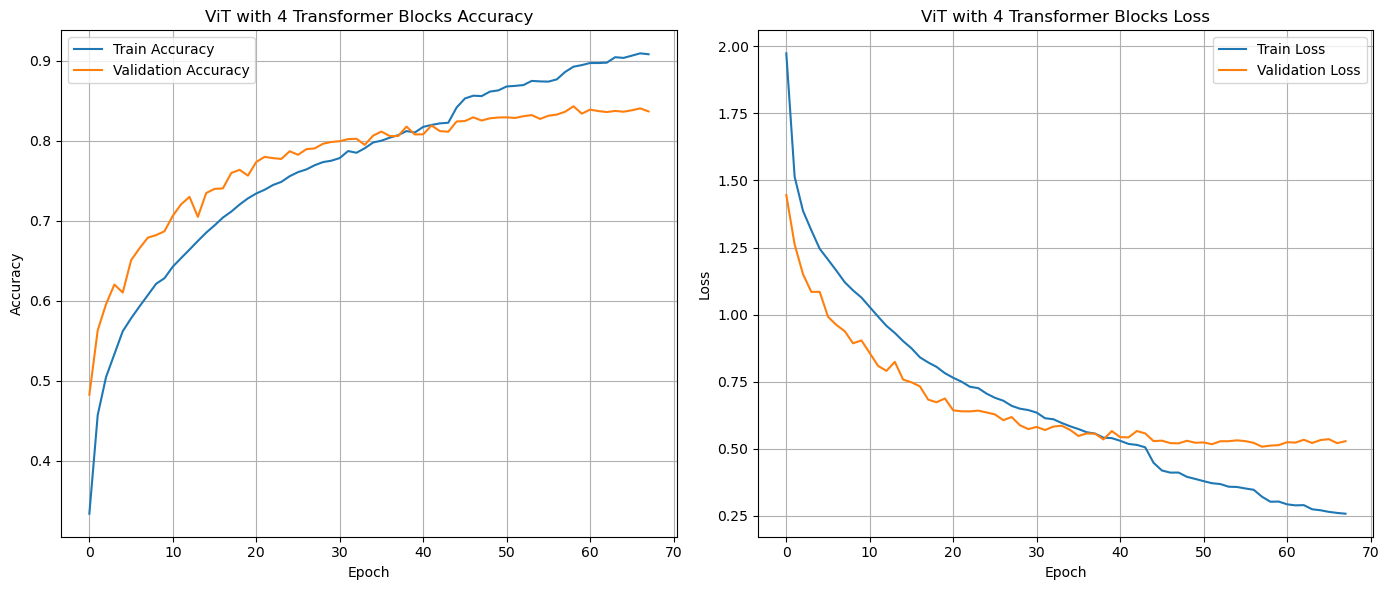

In [249]:
history_df = pd.read_csv("vit_history.csv") 
print(history_df.columns)
history_df.rename(columns={"Unnamed: 0": "epoch"}, inplace=True)
print(history_df.columns)
plot_loss_acc(history_df, "ViT with 4 Transformer Blocks", "task_9a_vit_train_val.png")

Index(['Unnamed: 0', 'accuracy', 'loss', 'top_5_accuracy', 'val_accuracy',
       'val_loss', 'val_top_5_accuracy'],
      dtype='object')
Index(['epoch', 'accuracy', 'loss', 'top_5_accuracy', 'val_accuracy',
       'val_loss', 'val_top_5_accuracy'],
      dtype='object')


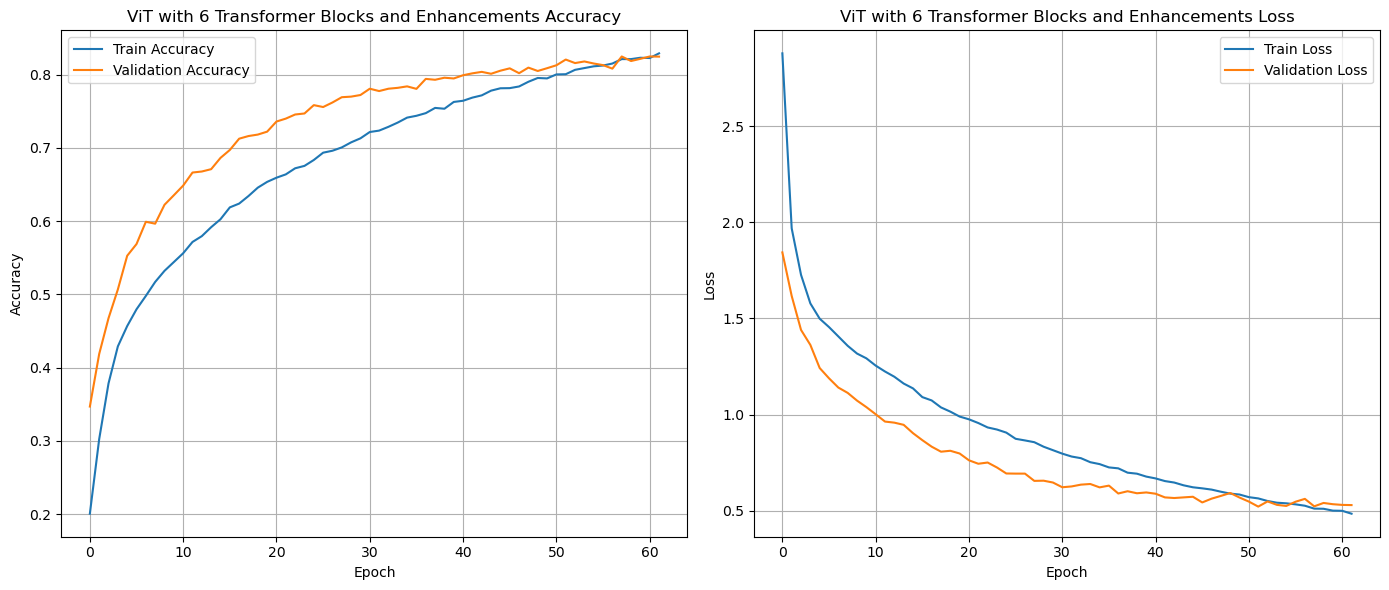

In [250]:
history_df = pd.read_csv("vit_en2_history.csv") 
print(history_df.columns)
history_df.rename(columns={"Unnamed: 0": "epoch"}, inplace=True)
print(history_df.columns)
plot_loss_acc(history_df, "ViT with 6 Transformer Blocks and Enhancements", "task_9b_vit_en2_train_val.png")

## 📌 Task 10: Compare training and validation results for each model

- Discuss the difference in performance, training efficiency and learning dynamics or learning patterns of each model


In [256]:
# Load Data
# ---------

cnn_df = pd.read_csv("cnn_history.csv")
vit_df = pd.read_csv("vit_en2_history.csv")

In [257]:
cnn_df.rename(columns={"Unnamed: 0": "epoch"}, inplace=True)
cnn_df.head()

,epoch,accuracy,loss,top_5_accuracy,val_accuracy,val_loss,val_top_5_accuracy,learning_rate
0,0,0.360889,2.330678,0.860733,0.1860,3.348426,0.5916,0.001
1,1,0.507267,1.713713,0.934089,0.5140,1.717783,0.9380,0.001
2,2,0.579244,1.500725,0.952911,0.6002,1.444156,0.9630,0.001
3,3,0.628244,1.346139,0.966111,0.6892,1.165681,0.9802,0.001
4,4,0.663111,1.236295,0.970244,0.6760,1.168904,0.9810,0.001


In [258]:
vit_df.rename(columns={"Unnamed: 0": "epoch"}, inplace=True)
vit_df.head()

,epoch,accuracy,loss,top_5_accuracy,val_accuracy,val_loss,val_top_5_accuracy
0,0,0.200756,2.879208,0.679556,0.3470,1.843690,0.8352
1,1,0.302600,1.968750,0.808733,0.4188,1.617089,0.8894
2,2,0.378644,1.727023,0.866844,0.4676,1.440491,0.9240
3,3,0.429111,1.578311,0.898444,0.5068,1.362488,0.9312
4,4,0.456844,1.498880,0.913000,0.5528,1.242217,0.9530


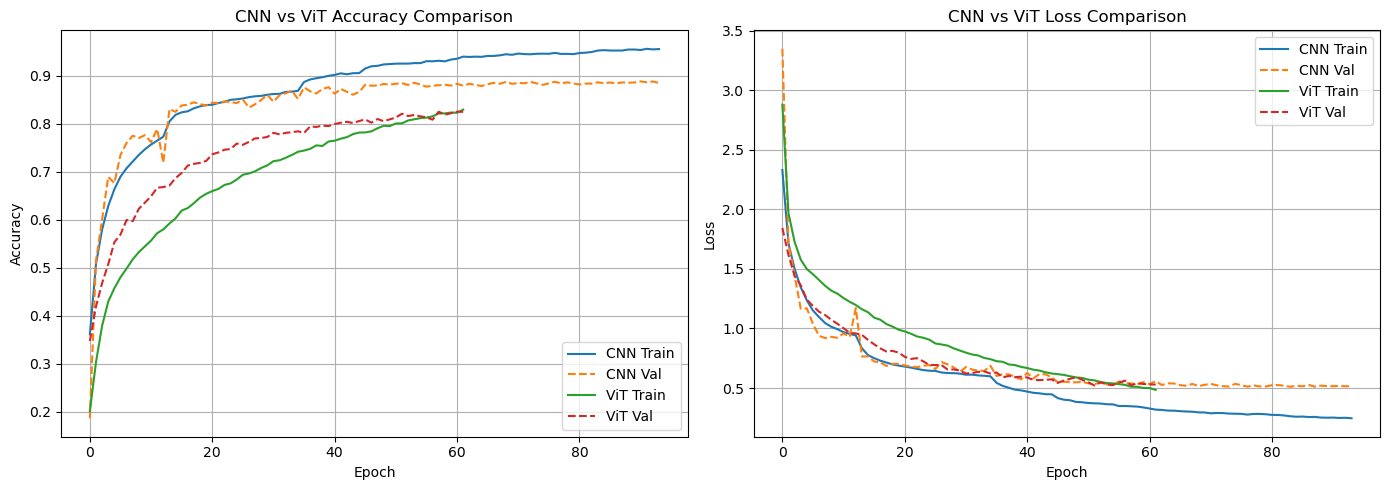

In [260]:
# Plots
# -----

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
ax1.plot(cnn_df['epoch'], cnn_df['accuracy'], label='CNN Train', linestyle='-')
ax1.plot(cnn_df['epoch'], cnn_df['val_accuracy'], label='CNN Val', linestyle='--')
ax1.plot(vit_df['epoch'], vit_df['accuracy'], label='ViT Train', linestyle='-')
ax1.plot(vit_df['epoch'], vit_df['val_accuracy'], label='ViT Val', linestyle='--')
ax1.set_title("CNN vs ViT Accuracy Comparison")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend()
ax1.grid(True)

# Loss comparison
ax2.plot(cnn_df['epoch'], cnn_df['loss'], label='CNN Train', linestyle='-')
ax2.plot(cnn_df['epoch'], cnn_df['val_loss'], label='CNN Val', linestyle='--')
ax2.plot(vit_df['epoch'], vit_df['loss'], label='ViT Train', linestyle='-')
ax2.plot(vit_df['epoch'], vit_df['val_loss'], label='ViT Val', linestyle='--')
ax2.set_title("CNN vs ViT Loss Comparison")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig("task_10a_cnn_vit_acc_loss_graphs.png")
plt.show()

In [301]:
# Load Models
# -----------

cnn_model = keras.models.load_model("best_cnn_checkpoint.keras")
vit_model = create_vit_classifier_en2()
vit_model.load_weights("best_en2_vit_checkpoint.weights.h5")
#print(vit_model.summary())

In [302]:
# Make Predictions
# ----------------

vit_preds = np.argmax(vit_model.predict(x_test), axis=1)
print("ViT Complete")
cnn_preds = np.argmax(cnn_model.predict(x_test), axis=1)
print("CNN Complete")



313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step
ViT Complete
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step    
CNN Complete


In [306]:
# Calculate Accuracy, Precision, Recall, F1 Score
# -----------------------------------------------

def compute_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1_score': f1_score(y_true, y_pred, average='macro')
    }

cnn_metrics = compute_metrics(y_test, cnn_preds)
vit_metrics = compute_metrics(y_test, vit_preds)

# Show metrics
print("CNN Metrics:", cnn_metrics)
print("ViT Metrics:", vit_metrics)


CNN Metrics: {'accuracy': 0.3674, 'precision': 0.5028644030258198, 'recall': 0.3674, 'f1_score': 0.29949115445947005}
ViT Metrics: {'accuracy': 0.8144, 'precision': 0.816070288671157, 'recall': 0.8143999999999998, 'f1_score': 0.8133497424639218}


/home/alkaff/anaconda3/envs/jax/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


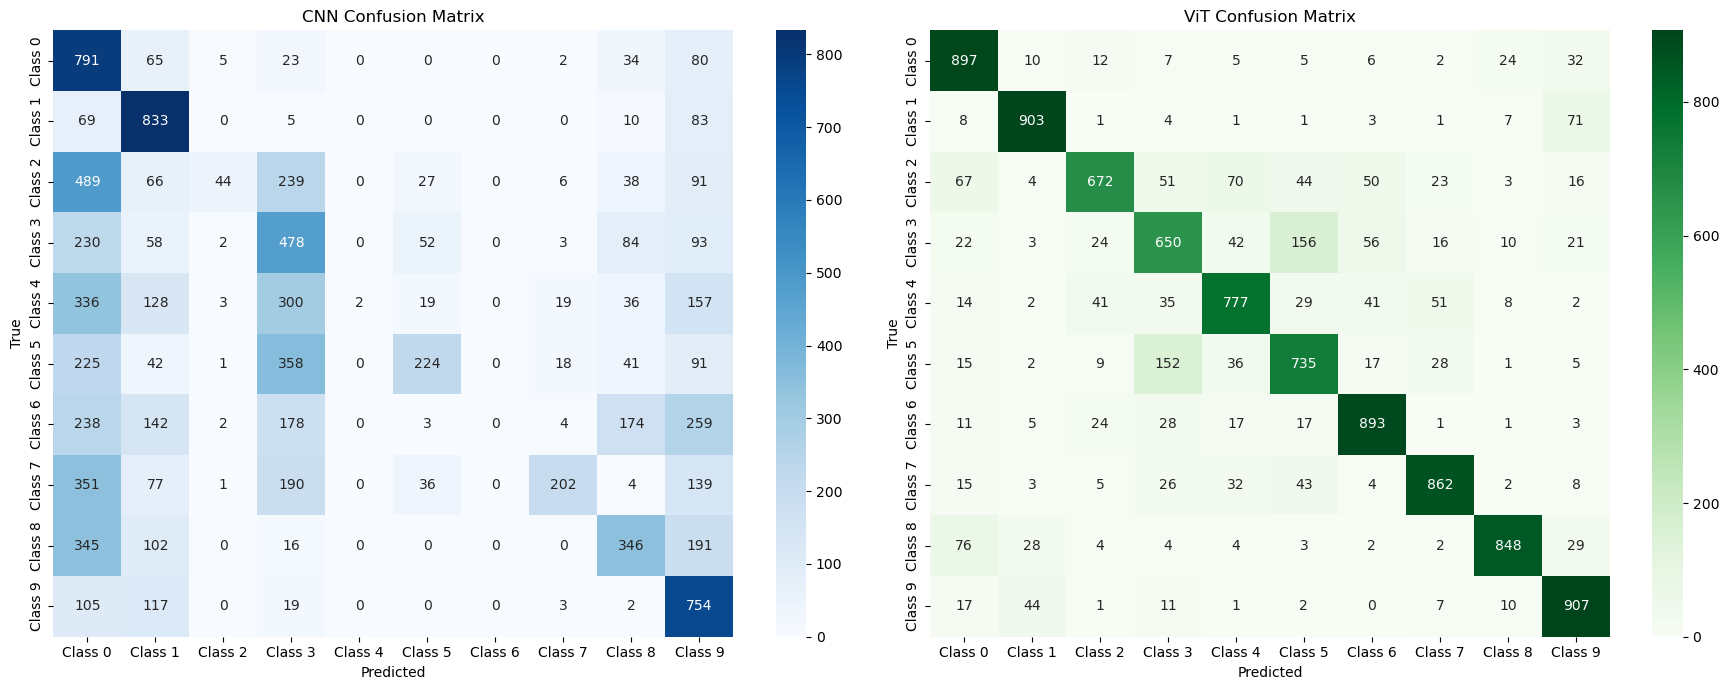

In [307]:
# Plot Confusion Matrix
# ---------------------

# Compute confusion matrices
cnn_cm = confusion_matrix(y_test, cnn_preds)
vit_cm = confusion_matrix(y_test, vit_preds)

# Class labels (assuming 10 classes)
class_names = [f"Class {i}" for i in range(10)]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# CNN Confusion Matrix
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("CNN Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

# ViT Confusion Matrix
sns.heatmap(vit_cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title("ViT Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.savefig("task_10b_cnn_vit_confusion_matrix.png")
plt.show()

### 🏁 Final Conclusion: Comparison of CNN vs ViT Model Performance

#### 🔁 Training and Validation Dynamics

The CNN and ViT models demonstrate significantly different learning behaviors throughout training:

- **CNN** shows early convergence in both training and validation accuracy with validation accuracy of **almost 90%**
- **CNN's** training accuracy continued to rise while validation plateaued — indicating **some overfitting**
- **ViT** consistently improved across epochs with both training and validation accuracy of **low 80s%** indicating better generalization and capacity to learn complex patterns
- **ViT's** training was **smooth and stable**, and **no signs of overfitting** were observed
- From the training/validation **loss curves**, ViT achieved a smoother and more gradual loss reduction, while CNN plateaued quickly, suggesting limited learning dynamics.

#### 📊 Evaluation Metrics on Unseen Test Set

| Metric     | CNN         | ViT         |
|------------|-------------|-------------|
| Accuracy   | **36.74%**  | **81.44%**  |
| Precision  | 50.29%      | **81.61%**  |
| Recall     | 36.74%      | **81.44%**  |
| F1 Score   | 29.95%      | **81.33%**  |

- The **CNN model** performed poorly on the test set despite good validation accuracy. This indicates poor generalization to unseen data possibly due to overfitting on the small validation split
- The **ViT model** maintained strong test performance matching its validation accuracy. This implies its superior generalization capability

#### 🧩 Confusion Matrix Insights

- The **CNN confusion matrix** reveals significant misclassification across multiple classes. Diagonal dominance is weak, and classes like `3`, `4`, `5`, `6`, and `7` are frequently confused — likely due to limited global context and representational power
  
- In contrast, the **ViT model** exhibits strong diagonal dominance with lower off-diagonal errors. It correctly classifies challenging classes with high consistency, benefiting from:
  - Global self-attention capturing long-range dependencies
  - Regularization through DropPath
  - Adaptive learning via WarmUp + CosineDecay

### 🧠 Final Thoughts:

The ViT model significantly outperforms the CNN baseline in every aspect:

- **Better training dynamics** with smoother convergence and no overfitting
- **Higher test accuracy and robust metrics** across all evaluation criteria
- **Superior class-wise performance** as shown in the confusion matrix

These results highlight the strength of ViT in modeling complex patterns and show that attention-based architectures are highly effective even on small-scale datasets like CIFAR-10 when paired with proper regularization and optimization strategies.
